# Here we are predict the price of cars 

## Business Case:-

* You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Domain Analysis

In [1]:
# Imports the all libraries for this project in python code
import pandas as pd # use for data cleaning and data analysis 
import numpy as np # use for numerical calculation
import seaborn as sns # use for data visulation
import matplotlib.pyplot as plt # use for data visulation
import warnings # use for warning 
warnings.filterwarnings("ignore") # use for ignore warning

In [5]:
data=pd.read_csv("auto_imports.csv") #Load the dataset

In [6]:
data.head() # use for top five rows of datasets

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [7]:
# used for data column rename
data.rename(columns={"3":"risk_factor"},inplace=True)
data.rename(columns={"alfa-romero":"car_name"},inplace=True)
data.rename(columns={"gas":"fuel_type"},inplace=True)
data.rename(columns={"std":"induction_type"},inplace=True)
data.rename(columns={"two":"car_door"},inplace=True)
data.rename(columns={"convertible":"car_body_type"},inplace=True)
data.rename(columns={"rwd":"wheel_drive"},inplace=True)
data.rename(columns={"front":"engine_location"},inplace=True)
data.rename(columns={"2548":"curb_weigth"},inplace=True)
data.rename(columns={"dohc":"engine_type"},inplace=True)
data.rename(columns={"four":"number_of_cylinder"},inplace=True)
data.rename(columns={"130":"engine_size"},inplace=True)
data.rename(columns={"mpfi":"fuel_system"},inplace=True)
data.rename(columns={"3.47":"bore_diameter"},inplace=True)
data.rename(columns={"2.68":"Stroke"},inplace=True)
data.rename(columns={"9.00":"compression_ratio"},inplace=True)
data.rename(columns={"111":"horse_power"},inplace=True)
data.rename(columns={"5000":"Perk_rpm"},inplace=True)
data.rename(columns={"21":"City_mpg"},inplace=True)
data.rename(columns={"27":"Highway_mpg"},inplace=True)
data.rename(columns={"13495":"Price"},inplace=True)
data.rename(columns={"88.60":"wheel_base"},inplace=True)
data.rename(columns={"168.80":"length"},inplace=True)
data.rename(columns={"64.10":"width"},inplace=True)
data.rename(columns={"48.80":"Heigth"},inplace=True) # All codes in the cell rename the column name respective to their name

In [8]:
data.head() # showning the first 5 data

,risk_factor,?,car_name,fuel_type,induction_type,car_door,car_body_type,wheel_drive,engine_location,wheel_base,...,engine_size,fuel_system,bore_diameter,Stroke,compression_ratio,horse_power,Perk_rpm,City_mpg,Highway_mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### Attribute Information:-

**risk_factor:-** Risk factor associated with the car or driver (possibly insurance-related). \
**car_name:** Name of the car model or brand. \
fuel_type:** Type of fuel the car uses (e.g., gasoline, diesel, electric).\
**induction_type:** Type of engine induction system (e.g., naturally aspirated, turbocharged). \
**car_door:** Number of doors in the car (e.g., 2-door, 4-door).\
**car_body_type:** Type of car body (e.g., sedan, SUV, hatchback). \
**wheel_drive:** Wheel drive system of the car (e.g., front-wheel drive, all-wheel drive). \
**engine_location:** Location of the engine in the car (e.g., front, rear). \
**wheel_base:** Distance between the front and rear wheels, affecting stability and ride comfort. \
**length:** Length of the car (typically in millimeters or inches). \
**width:** Width of the car. \
**height:** Height of the car. \
**curb_weight:** Weight of the car without passengers or cargo. \
**engine_type:** Type of engine (e.g., V6, V8, inline-4). \
**number_of_cylinder:** Number of cylinders in the car’s engine. \
**engine_size:** Size of the engine, typically measured in liters or cubic centimeters (cc). \
**fuel_system:** Fuel injection or delivery system (e.g., MPFI, carburetor, direct injection). \
**bore_diameter:** Diameter of the engine’s cylinders. \
**Stroke:** Distance the piston travels within the cylinder. \
**compression_ratio:** Ratio of the engine’s cylinder volume before and after compression. \
**horse_power:** Power produced by the engine, measured in horsepower (hp). \
**Perk_rpm:** Engine speed at which peak horsepower is generated, measured in revolutions per minute (rpm). \
**City_mpg:** Fuel efficiency in city driving conditions, measured in miles per gallon (mpg). \
**Highway_mpg:** Fuel efficiency in highway driving conditions, measured in miles per gallon (mpg). \
**Price:** The price of the car (target variable).

## Basic check

In [9]:
data.head() # showmimg the first 5 rows

,risk_factor,?,car_name,fuel_type,induction_type,car_door,car_body_type,wheel_drive,engine_location,wheel_base,...,engine_size,fuel_system,bore_diameter,Stroke,compression_ratio,horse_power,Perk_rpm,City_mpg,Highway_mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [10]:
data.tail() # showmimg the last 5 rows

,risk_factor,?,car_name,fuel_type,induction_type,car_door,car_body_type,wheel_drive,engine_location,wheel_base,...,engine_size,fuel_system,bore_diameter,Stroke,compression_ratio,horse_power,Perk_rpm,City_mpg,Highway_mpg,Price
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
199,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [11]:
data.describe() # used for continous column information

,risk_factor,wheel_base,length,width,Heigth,curb_weigth,engine_size,compression_ratio,City_mpg,Highway_mpg,Price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,174.228000,65.898000,53.791500,2555.705000,126.860000,10.170100,25.200000,30.705000,13205.690000
std,1.248557,6.038261,12.347132,2.102904,2.428449,518.594552,41.650501,4.014163,6.432487,6.827227,7966.982558
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.675000,64.175000,52.000000,2163.000000,97.750000,8.575000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000
75%,2.000000,102.400000,183.500000,66.675000,55.525000,2928.250000,142.000000,9.400000,30.000000,34.000000,16500.750000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


#### Insights:-
* Here we see not null value in all columns
* Here we see the minmum price of car is 5118.00 and maximum is 45400.00

In [12]:
data.describe(include="O") # used for categorical column information

,?,car_name,fuel_type,induction_type,car_door,car_body_type,wheel_drive,engine_location,engine_type,number_of_cylinder,fuel_system,bore_diameter,Stroke,horse_power,Perk_rpm
count,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
unique,52,22,2,2,3,5,3,2,6,7,8,39,37,59,23
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500
freq,36,32,180,164,113,94,118,197,145,156,91,23,19,19,36


#### insights:-
* Standared deviation of price column is very high.
* The toyoto car company is most freuent in dataset.

In [13]:
data.info() # used for data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   risk_factor         200 non-null    int64  
 1   ?                   200 non-null    object 
 2   car_name            200 non-null    object 
 3   fuel_type           200 non-null    object 
 4   induction_type      200 non-null    object 
 5   car_door            200 non-null    object 
 6   car_body_type       200 non-null    object 
 7   wheel_drive         200 non-null    object 
 8   engine_location     200 non-null    object 
 9   wheel_base          200 non-null    float64
 10  length              200 non-null    float64
 11  width               200 non-null    float64
 12  Heigth              200 non-null    float64
 13  curb_weigth         200 non-null    int64  
 14  engine_type         200 non-null    object 
 15  number_of_cylinder  200 non-null    object 
 16  engine_s

#### Insights:-
* The total numbers of rows in data is 200.
* The all column of dataset not having any null value in it.
* There are (5) column is in float64, (6) column in int64, (15) column in object data type.
* Total number of columns are 26.

## Data Preprocesing Normal check
#### checking unique values and length of every column to understand dataset.

In [14]:
data.columns # use for showing the name of columns 

Index(['risk_factor', '?', 'car_name', 'fuel_type', 'induction_type',
       'car_door', 'car_body_type', 'wheel_drive', 'engine_location',
       'wheel_base', 'length', 'width', 'Heigth', 'curb_weigth', 'engine_type',
       'number_of_cylinder', 'engine_size', 'fuel_system', 'bore_diameter',
       'Stroke', 'compression_ratio', 'horse_power', 'Perk_rpm', 'City_mpg',
       'Highway_mpg', 'Price'],
      dtype='object')

In [15]:
len(data.columns) # use for length of the column in dataset

26

In [18]:
len(data["risk_factor"].unique()) # use for length of unique values in the column

6

In [19]:
data['3'].unique() # use for unique values of column

KeyError: '3'

In [ ]:
data["?"].unique() # use for unique values of column

In [ ]:
len(data["?"].unique()) # use for length of unique values in the column

In [ ]:
data["alfa-romero"].unique() # use for unique values of column

In [ ]:
data.gas.unique() # use for unique values of column

In [ ]:
data["std"].unique() # use for unique values of column

In [ ]:
data['two'].unique() # use for unique values of column

In [ ]:
len(data['two'].unique())  # use for length of unique values in the column

In [ ]:
data["convertible"].unique() # use for unique values of column

In [ ]:
data.rwd.unique() # use for unique values of column

In [ ]:
data.front.unique() # use for unique values of column

In [ ]:
len(data.front.unique()) # use for length of unique values in the column

In [ ]:
data["88.60"].unique()# use for unique values of column

In [ ]:
len(data["88.60"].unique())  # use for length of unique values in the column

In [ ]:
data["168.80"].unique() # use for unique values of column

In [ ]:
len(data["168.80"].unique()) # use for length of unique values in the column

In [ ]:
data["64.10"].unique()# use for unique values of column

In [ ]:
len(data["64.10"].unique())# use for length of unique values in the column

In [ ]:
data["48.80"].unique()# use for unique values of column

In [ ]:
len(data["48.80"].unique())# use for length of unique values in the column

In [ ]:
data["2548"].unique()# use for unique values of column

In [ ]:
len(data["2548"].unique())# use for length of unique values in the column

In [ ]:
data.dohc.unique()# use for unique values of column

In [ ]:
data.four.unique()# use for unique values of column

In [ ]:
data["130"].unique()# use for unique values of column

In [ ]:
data["mpfi"].unique()# use for unique values of column

In [ ]:
data["3.47"].unique()# use for unique values of column

In [ ]:
data["2.68"].unique()# use for unique values of column

In [ ]:
data["9.00"].unique()# use for unique values of column

In [ ]:
data["111"].unique()# use for unique values of column

In [ ]:
data["5000"].unique()# use for unique values of column

In [17]:
data["21"].unique()# use for unique values of column

KeyError: '21'

In [44]:
data["27"].unique()# use for unique values of column

array([27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 38, 24, 54, 42, 34, 33,
       31, 19, 17, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46], dtype=int64)

In [45]:
data["13495"].unique()# use for unique values of column

array([16500, 13950, 17450, 15250, 17710, 18920, 23875, 16430, 16925,
       20970, 21105, 24565, 30760, 41315, 36880,  5151,  6295,  6575,
        5572,  6377,  7957,  6229,  6692,  7609,  8558,  8921, 12964,
        6479,  6855,  5399,  6529,  7129,  7295,  7895,  9095,  8845,
       10295, 12945, 10345,  6785, 11048, 32250, 35550, 36000,  5195,
        6095,  6795,  6695,  7395, 10945, 11845, 13645, 15645,  8495,
       10595, 10245, 10795, 11245, 18280, 18344, 25552, 28248, 28176,
       31600, 34184, 35056, 40960, 45400, 16503,  5389,  6189,  6669,
        7689,  9959,  8499, 12629, 14869, 14489,  6989,  8189,  9279,
        5499,  7099,  6649,  6849,  7349,  7299,  7799,  7499,  7999,
        8249,  8949,  9549, 13499, 14399, 17199, 19699, 18399, 11900,
       13200, 12440, 13860, 15580, 16900, 16695, 17075, 16630, 17950,
       18150, 12764, 22018, 32528, 34028, 37028,  9295,  9895, 11850,
       12170, 15040, 15510, 18620,  5118,  7053,  7603,  7126,  7775,
        9960,  9233,

In [46]:
len(data["13495","27"].unique())# use for length of unique values in the column

185

In [48]:
data.head() # here we check the top five columns of dataset after changing their respective column name

,risk_factor,?,car_name,fuel_type,induction_type,car_door,car_body_type,wheel_drive,engine_location,wheel_base,length,width,Heigth,curb_weigth,engine_type,number_of_cylinder,engine_size,fuel_system,bore_diameter,Stroke,compression_ratio,horse_power,Perk_rpm,City_mpg,Highway_mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


# EDA:- Exploratory Data Analysis

#### Exploratory Data Analysis (EDA):- 
* EDA in machine learning is the process of analyzing and visualizing datasets to summarize their main characteristics, often using statistical graphics and visualization techniques.

##### There is a Three types of EDA :-

* Univariant Analysis
* Biavariant Analysis
* Multivariant Analysis

## Univariate Analysis

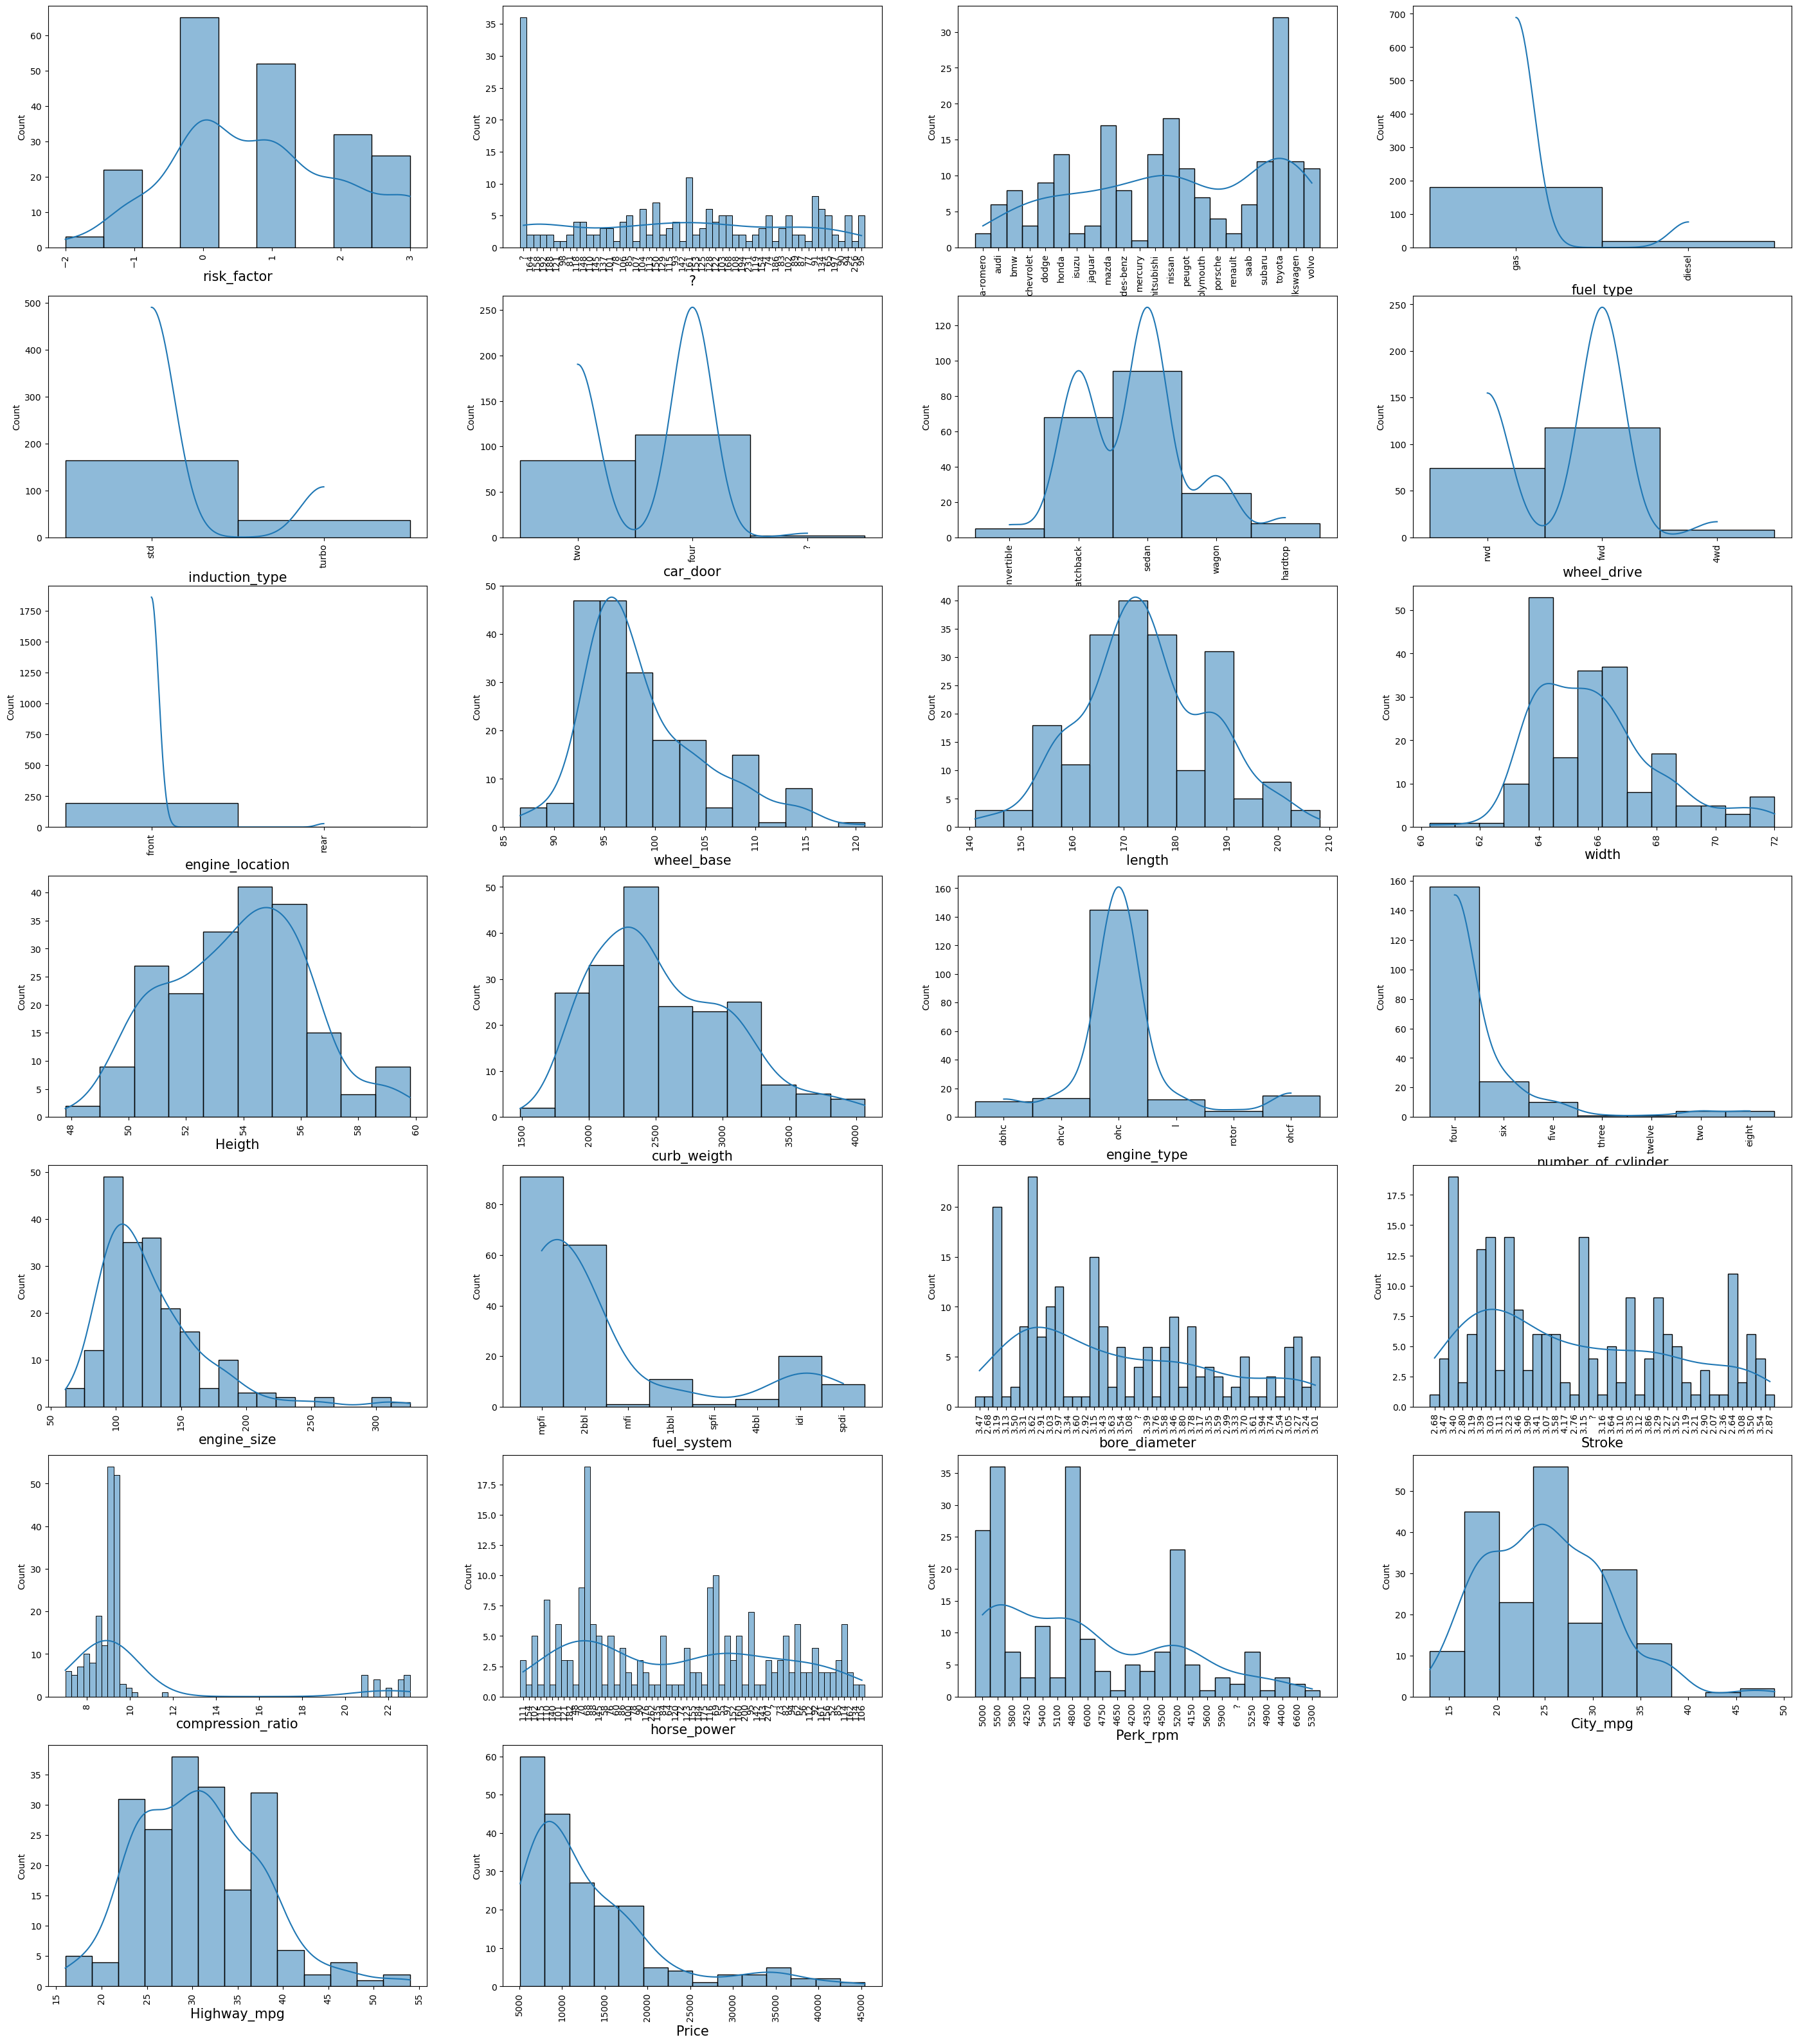

In [49]:
plt.figure(figsize=(35,40)) # its define the figure size 
plt_num = 1 # this defines the number of figure we requaried
for column in data:  
    if plt_num <= 26: # Assign the numbers of column in dataset
       plt.subplot(7,4,plt_num) # Assign the sub plot of figure with their rows and columns numbers in it 
       sns.histplot(data[column],kde=True) # here we create the histogram plot
       plt.xlabel(column,fontsize=15) # here we label the x-axis and their fontsize
       plt.xticks(rotation=90) # assign the x-label column and rotate their name to 90 degree
    plt_num+=1   

#### Insights:-
* Here we see histogram plot in continoues column.
* Here we do not have any single column in normal disturution.
* So we have to apply median to handle the outliers of particular coulumn.

# Bivariante Analysis

<Axes: xlabel='risk_factor', ylabel='Price'>

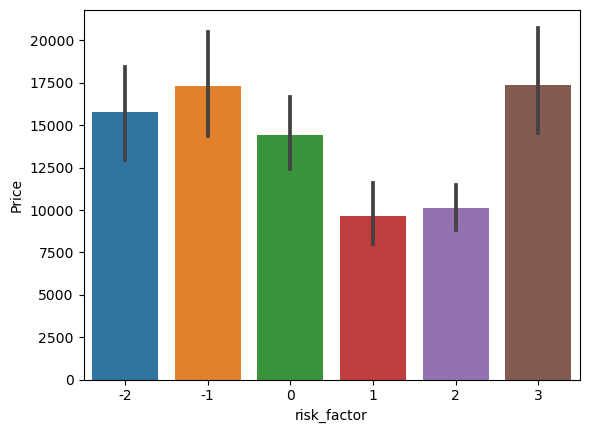

In [50]:
sns.barplot(x=data.risk_factor,y=data.Price) # here we create barplot between two columns risk factor and price

* The maximum number of cars having highest risk at factor and lowest risk at factor are more expensive.

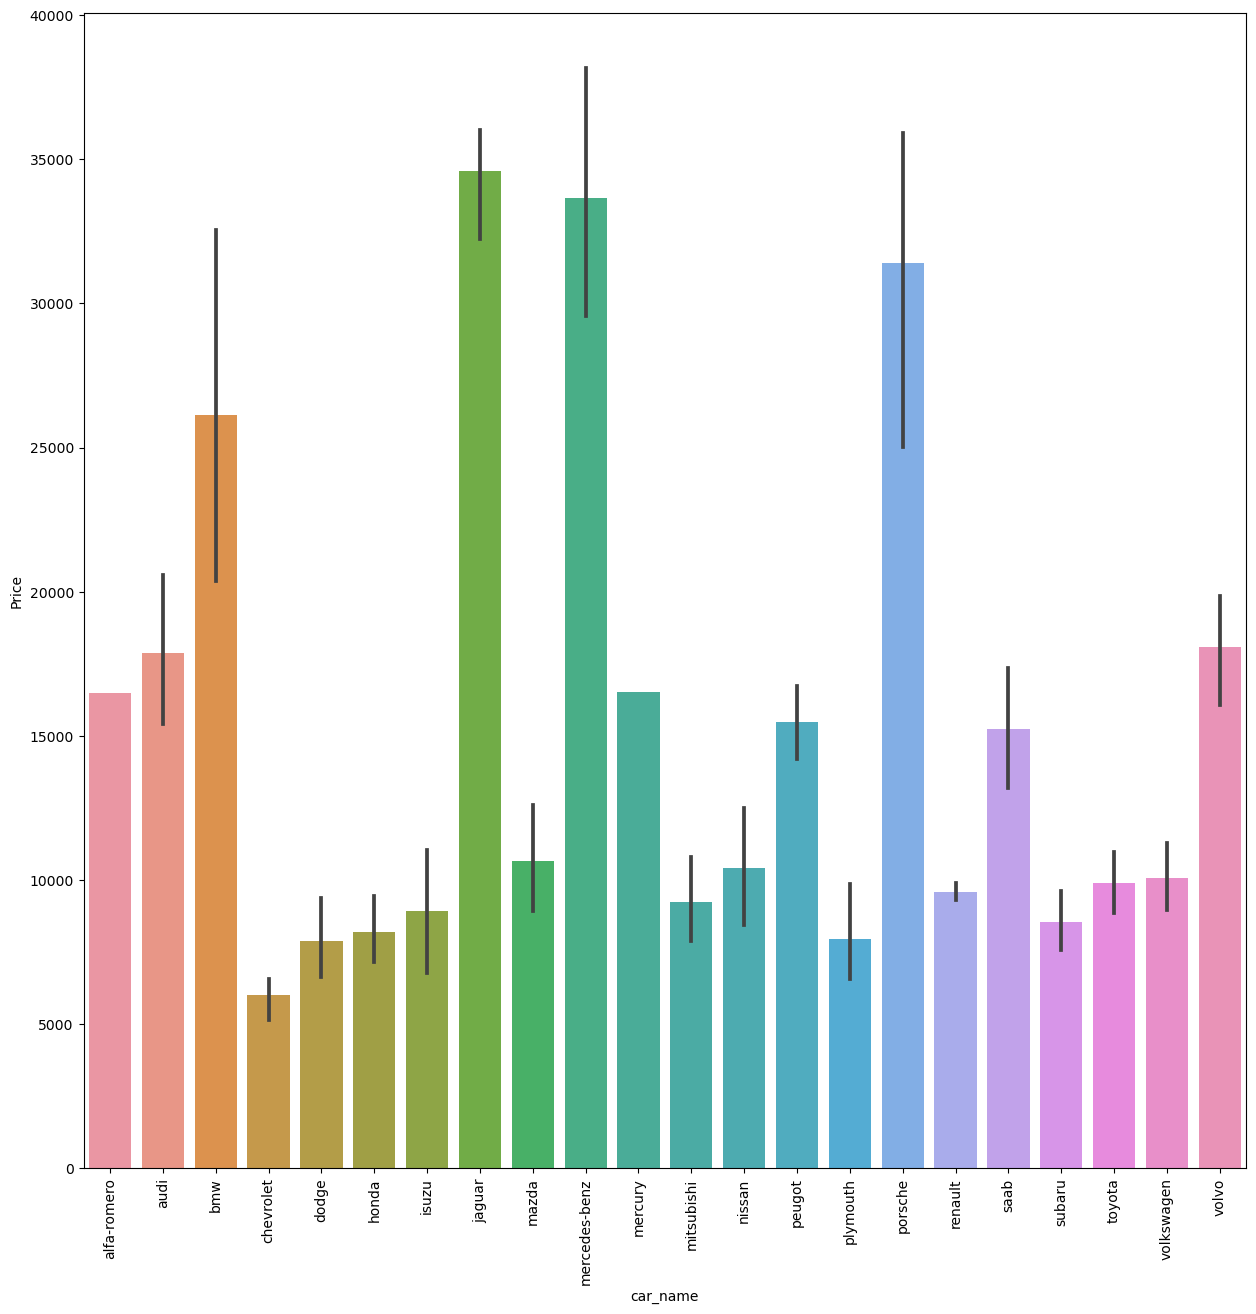

In [51]:
plt.figure(figsize=(15,15)) # Here we define figure size
sns.barplot(x=data.car_name,y=data.Price) # we create barplot between car_name and price columns 
plt.xticks(rotation=90) # assign the x-label column and rotate their name to 90 degree
plt.show() # To show the figure

* The More expensive car are few in compariosn to less expensive car and avrage expensive car.

<Axes: xlabel='fuel_type', ylabel='Price'>

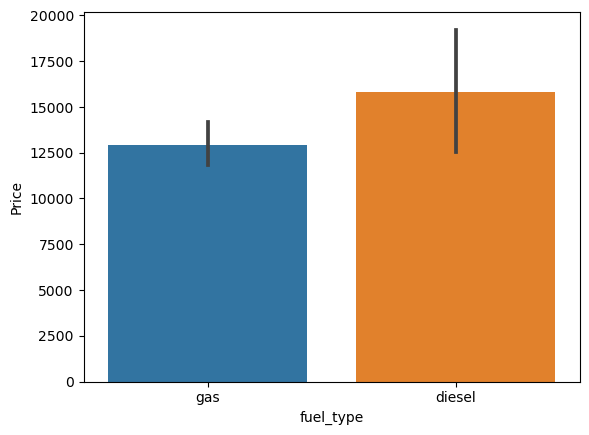

In [52]:
sns.barplot(x=data.fuel_type,y=data.Price) # we create barplot between fuel_type and Price

* The diesel cars are more expensive in compare to gas car.

<Axes: xlabel='induction_type', ylabel='Price'>

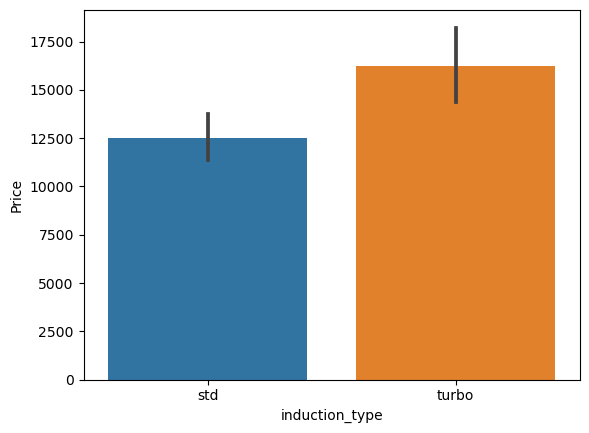

In [53]:
sns.barplot(x=data.induction_type,y=data.Price) # we create barplot between induction_type and price

+ The Turbo engine having higher price then Std one.

<Axes: xlabel='car_door', ylabel='Price'>

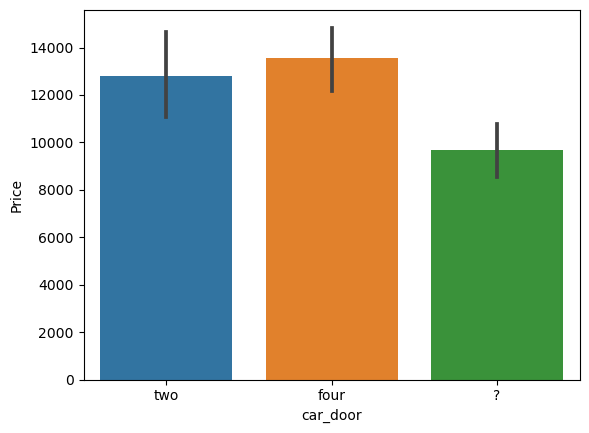

In [54]:
sns.barplot(x=data.car_door,y=data.Price) # we create barplot  between car_door and Price

- The Four door cars are slightly expensive then two door cars.

<Axes: xlabel='car_body_type', ylabel='Price'>

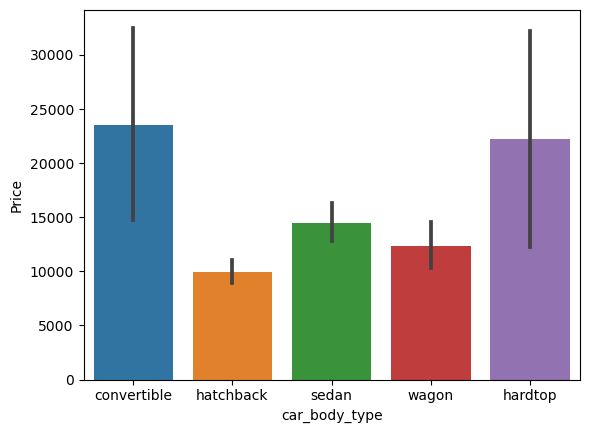

In [55]:
sns.barplot(x=data.car_body_type,y=data.Price) # draw graph between car_body_type and price

* Convertible and Hardtop are appox of same price range. 

<Axes: xlabel='wheel_drive', ylabel='Price'>

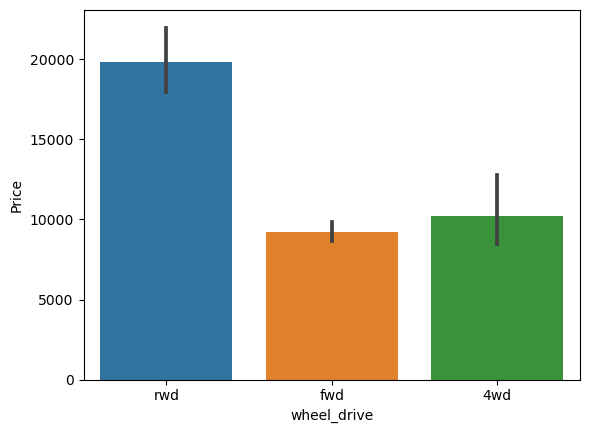

In [56]:
sns.barplot(x=data.wheel_drive,y=data.Price) # draw plot between wheel_drive and price

* The rare wheel drive cars are more expensive then other two.

<Axes: xlabel='engine_location', ylabel='Price'>

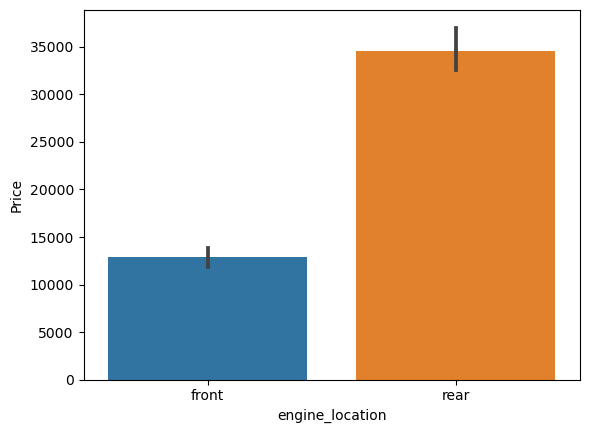

In [57]:
sns.barplot(x=data.engine_location,y=data.Price) # draw plot between engine_location and price

* The cars having rear engine loction are more in price compare to front one.

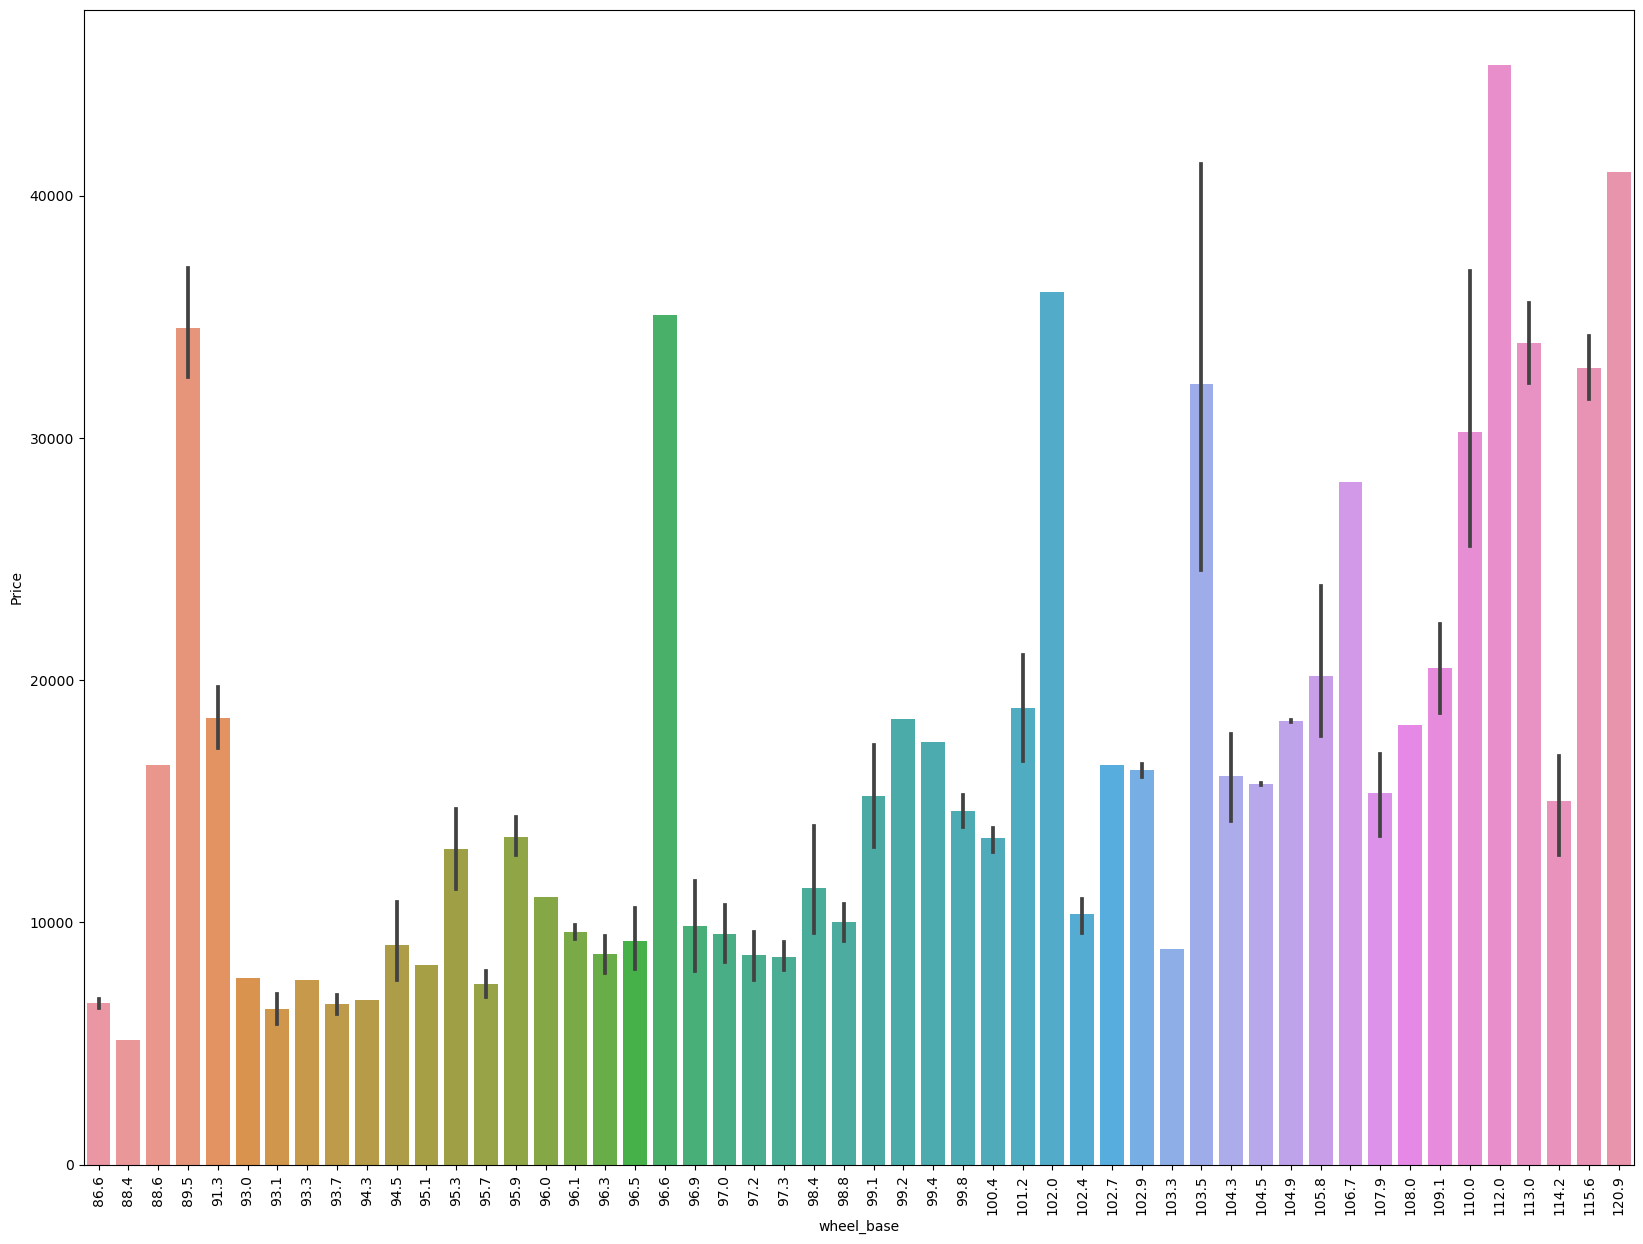

In [58]:
plt.figure(figsize=(20,15))# Here we define figure size
sns.barplot(x=data.wheel_base,y=data.Price)# we create barplot between wheel_base and price columns
plt.xticks(rotation=90)# assign the x-label column and rotate their name to 90 degree
plt.show() # To show the figure

* The Wheel base of cars not define the price that much because its having not that relation between it.

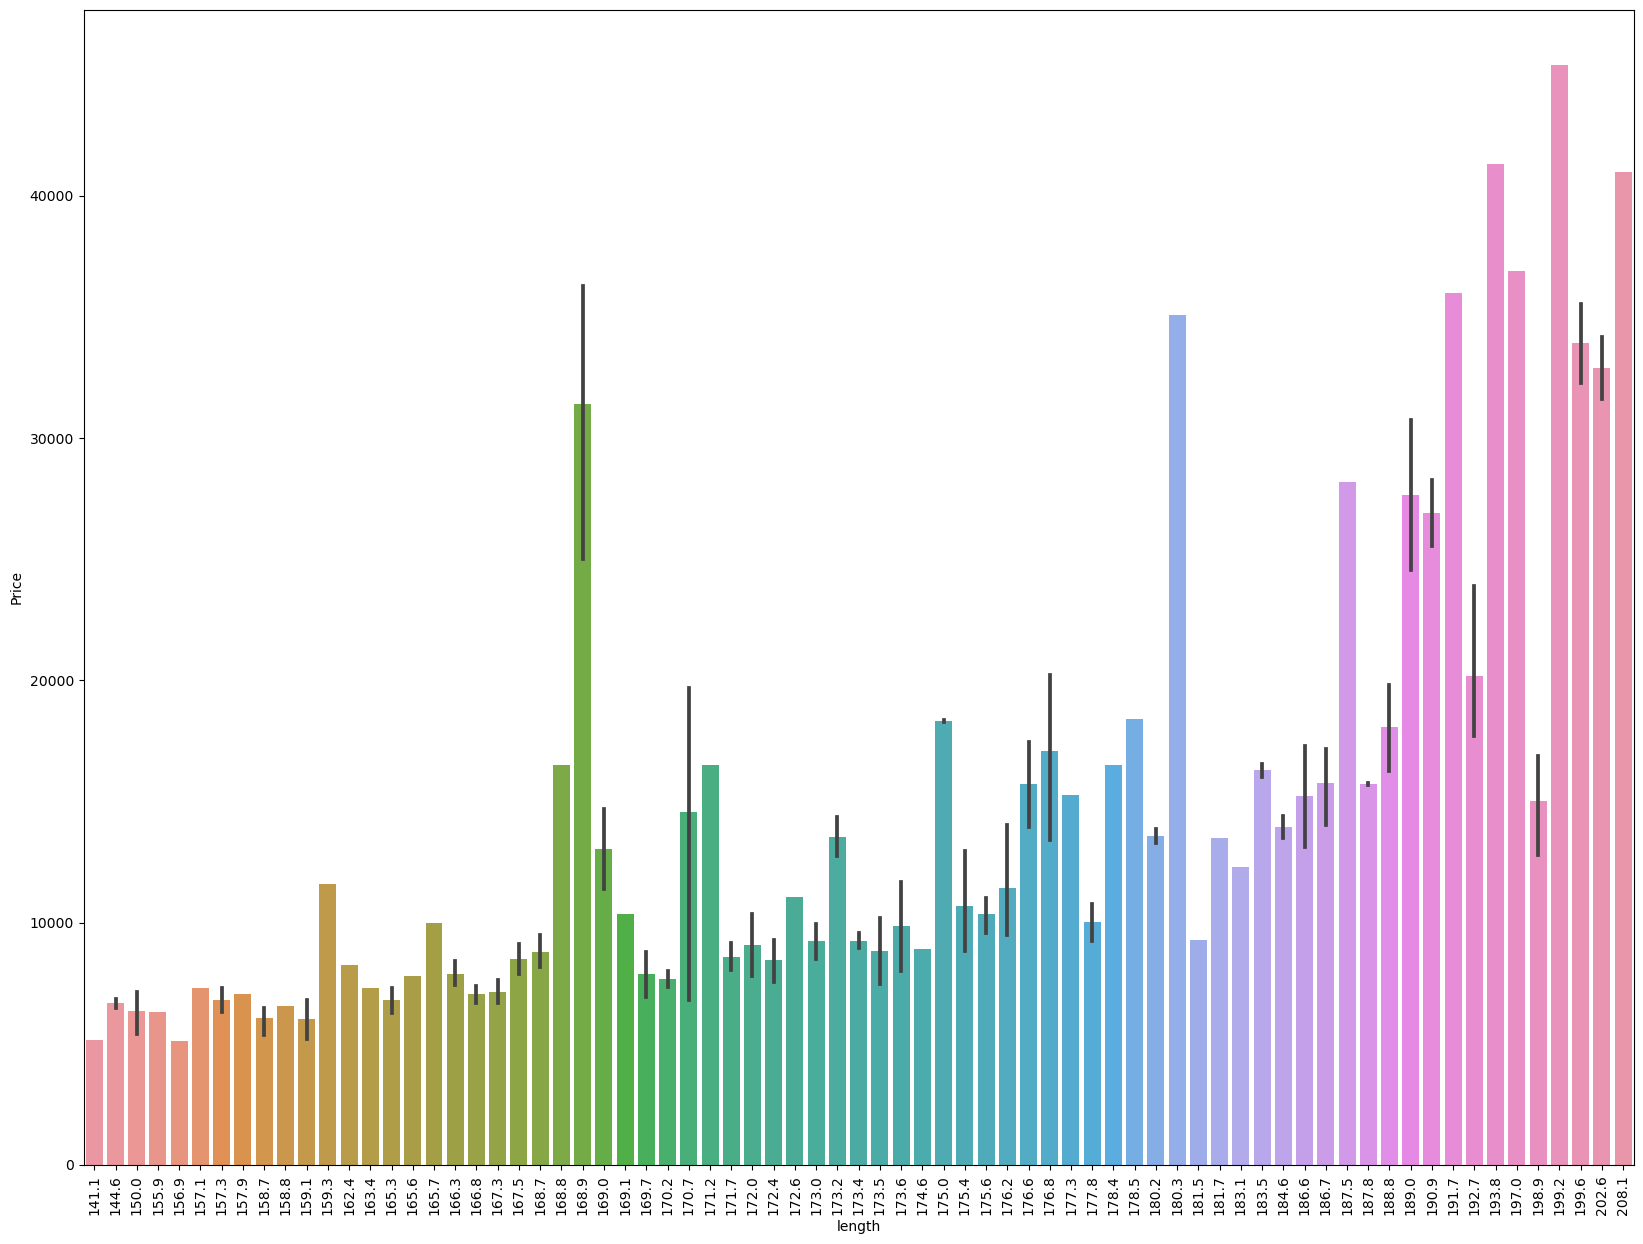

In [59]:
plt.figure(figsize=(20,15))# Here we define figure size
sns.barplot(x=data.length,y=data.Price)# we create barplot between length and price columns
plt.xticks(rotation=90)# assign the x-label column and rotate their name to 90 degree
plt.show() # To show the figure

* The higher the length of car more in price but at some mid point of it some of them are quiet expansive too.

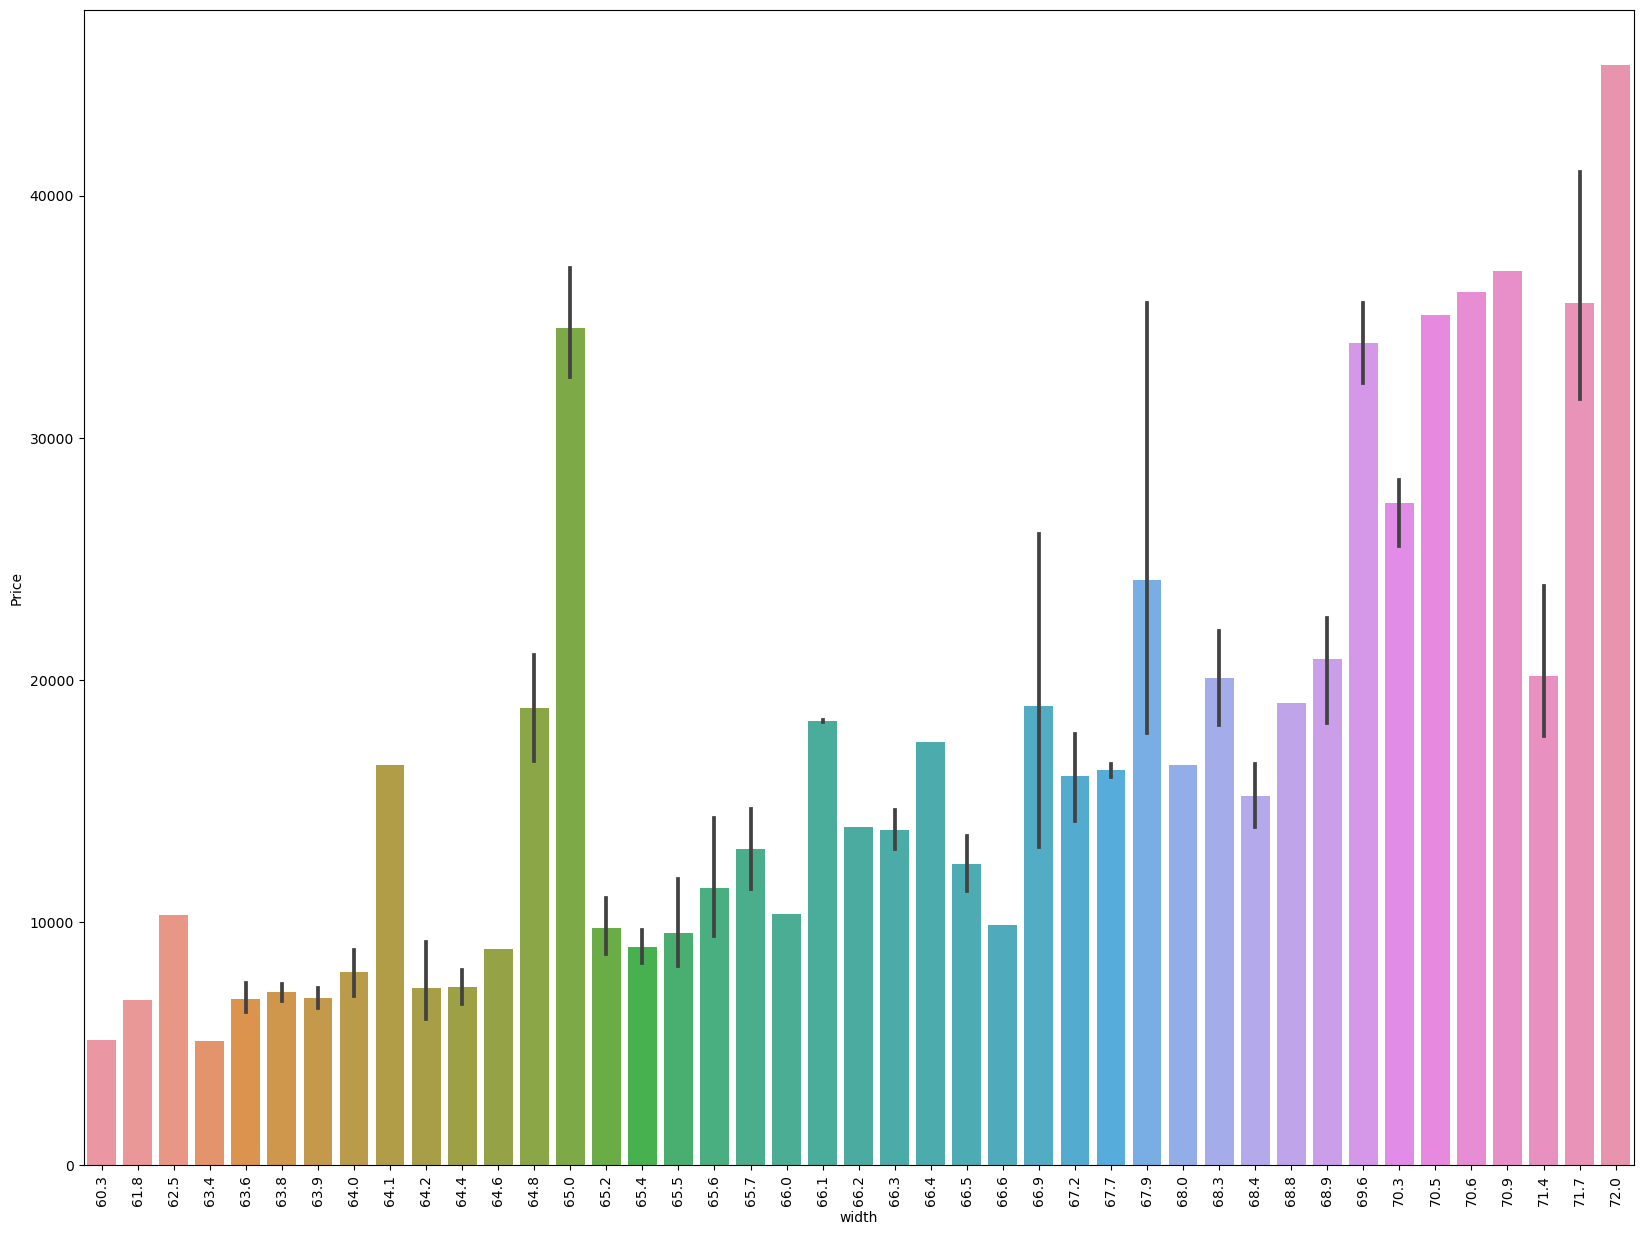

In [60]:
plt.figure(figsize=(20,15))# Here we define figure size
sns.barplot(x=data.width,y=data.Price)# we create barplot between width and price columns
plt.xticks(rotation=90)# assign the x-label column and rotate their name to 90 degree
plt.show() # To show the figure

* The higher the width of car more in price but at some mid point of it some of them are quiet expansive too.

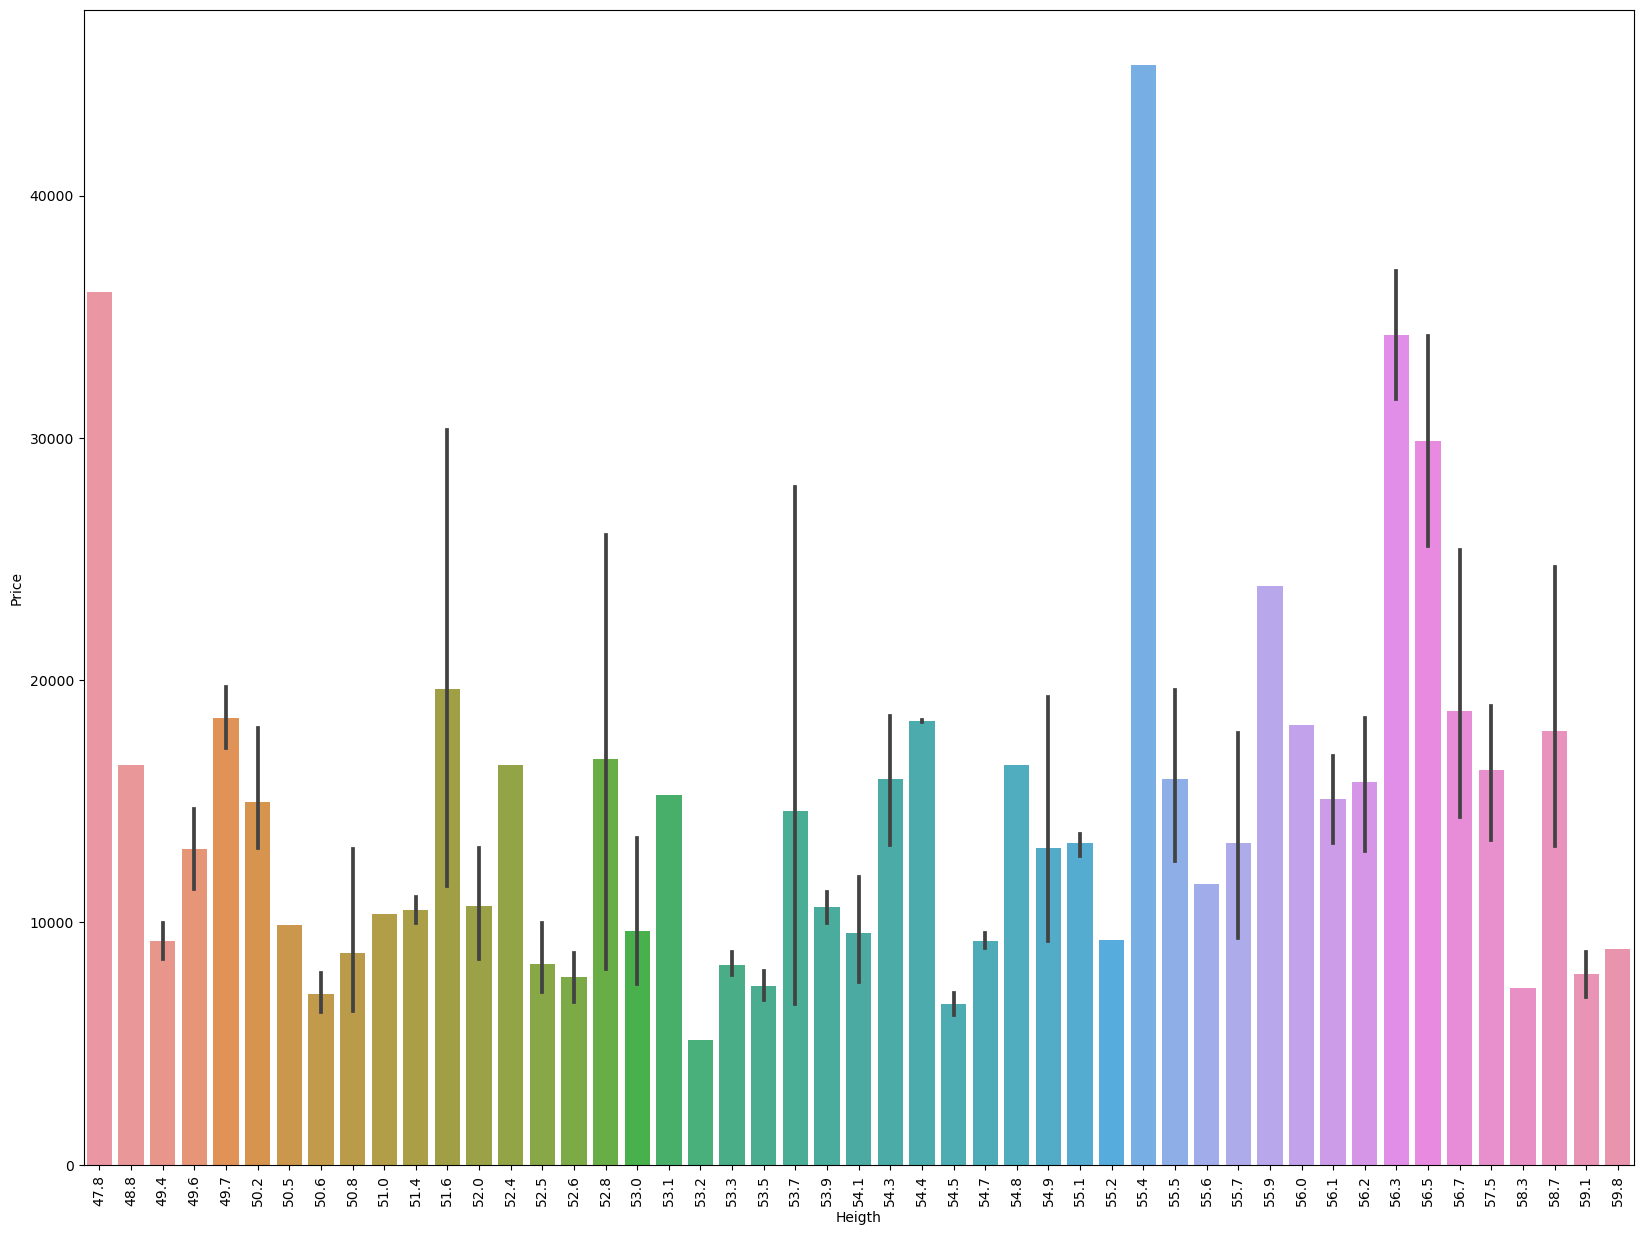

In [61]:
plt.figure(figsize=(20,15))# Here we define figure size
sns.barplot(x=data.Heigth,y=data.Price)# we create barplot between Heigth and price columns
plt.xticks(rotation=90)# assign the x-label column and rotate their name to 90 degree
plt.show()# To show the figure

* The heigth of car is not that much relate with its price point.

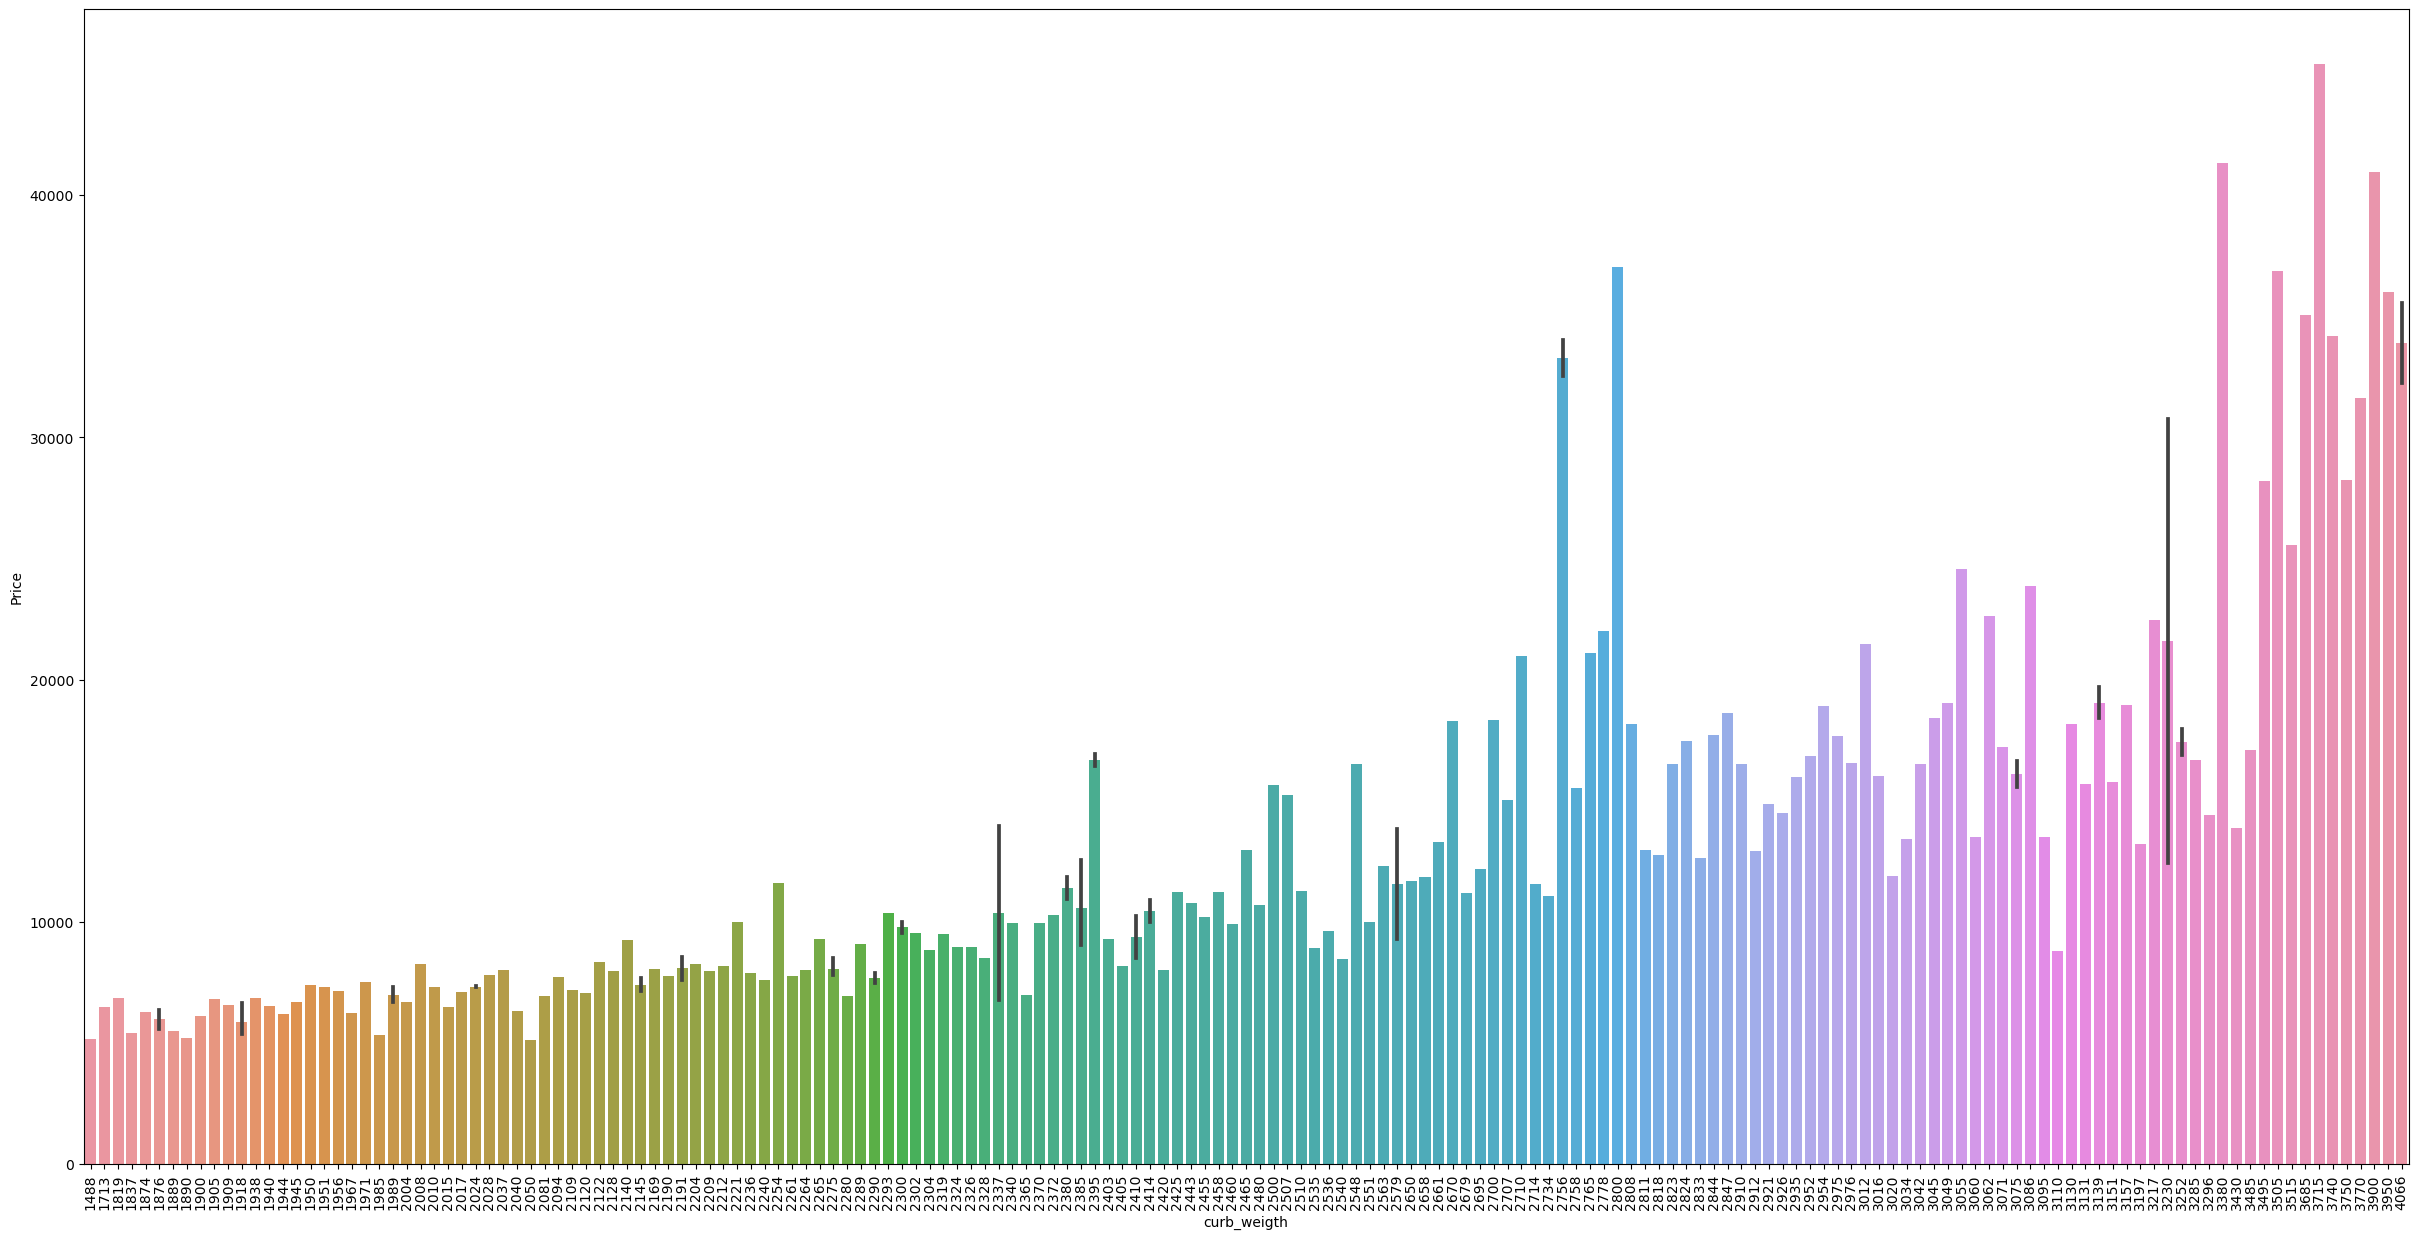

In [62]:
plt.figure(figsize=(30,15))# Here we define figure size
sns.barplot(x=data.curb_weigth,y=data.Price)# we create barplot between curb_weigth and price columns
plt.xticks(rotation=90)# assign the x-label column and rotate their name to 90 degree
plt.show()# To show the figure

* The most of cars with higher the curb weigth are more expansive.

<Axes: xlabel='engine_type', ylabel='Price'>

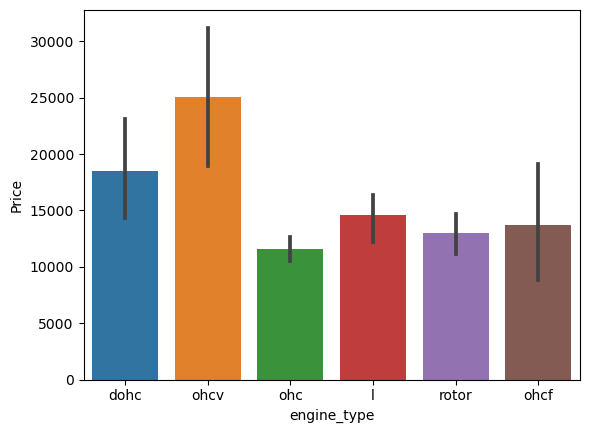

In [63]:
sns.barplot(x=data.engine_type,y=data.Price) # we draw barplot between engine_type and price

* The Cars having OHCV engine type are More expansive compare to other And all other engine types are of quite same price range.

<Axes: xlabel='number_of_cylinder', ylabel='Price'>

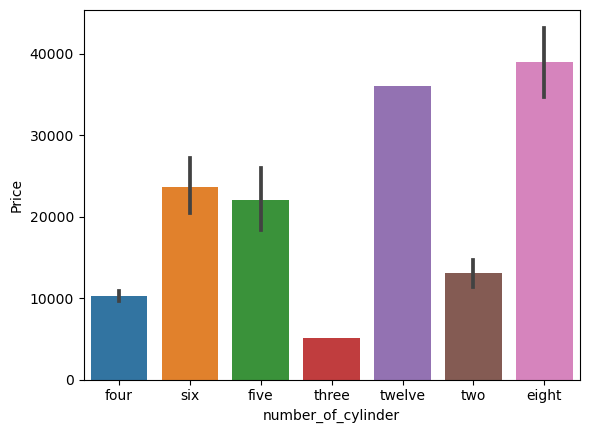

In [64]:
sns.barplot(x=data.number_of_cylinder,y=data.Price) # we draw barplot between number_of_cylinder and price

* The higher the Number of cylinder in car its is more expansive.

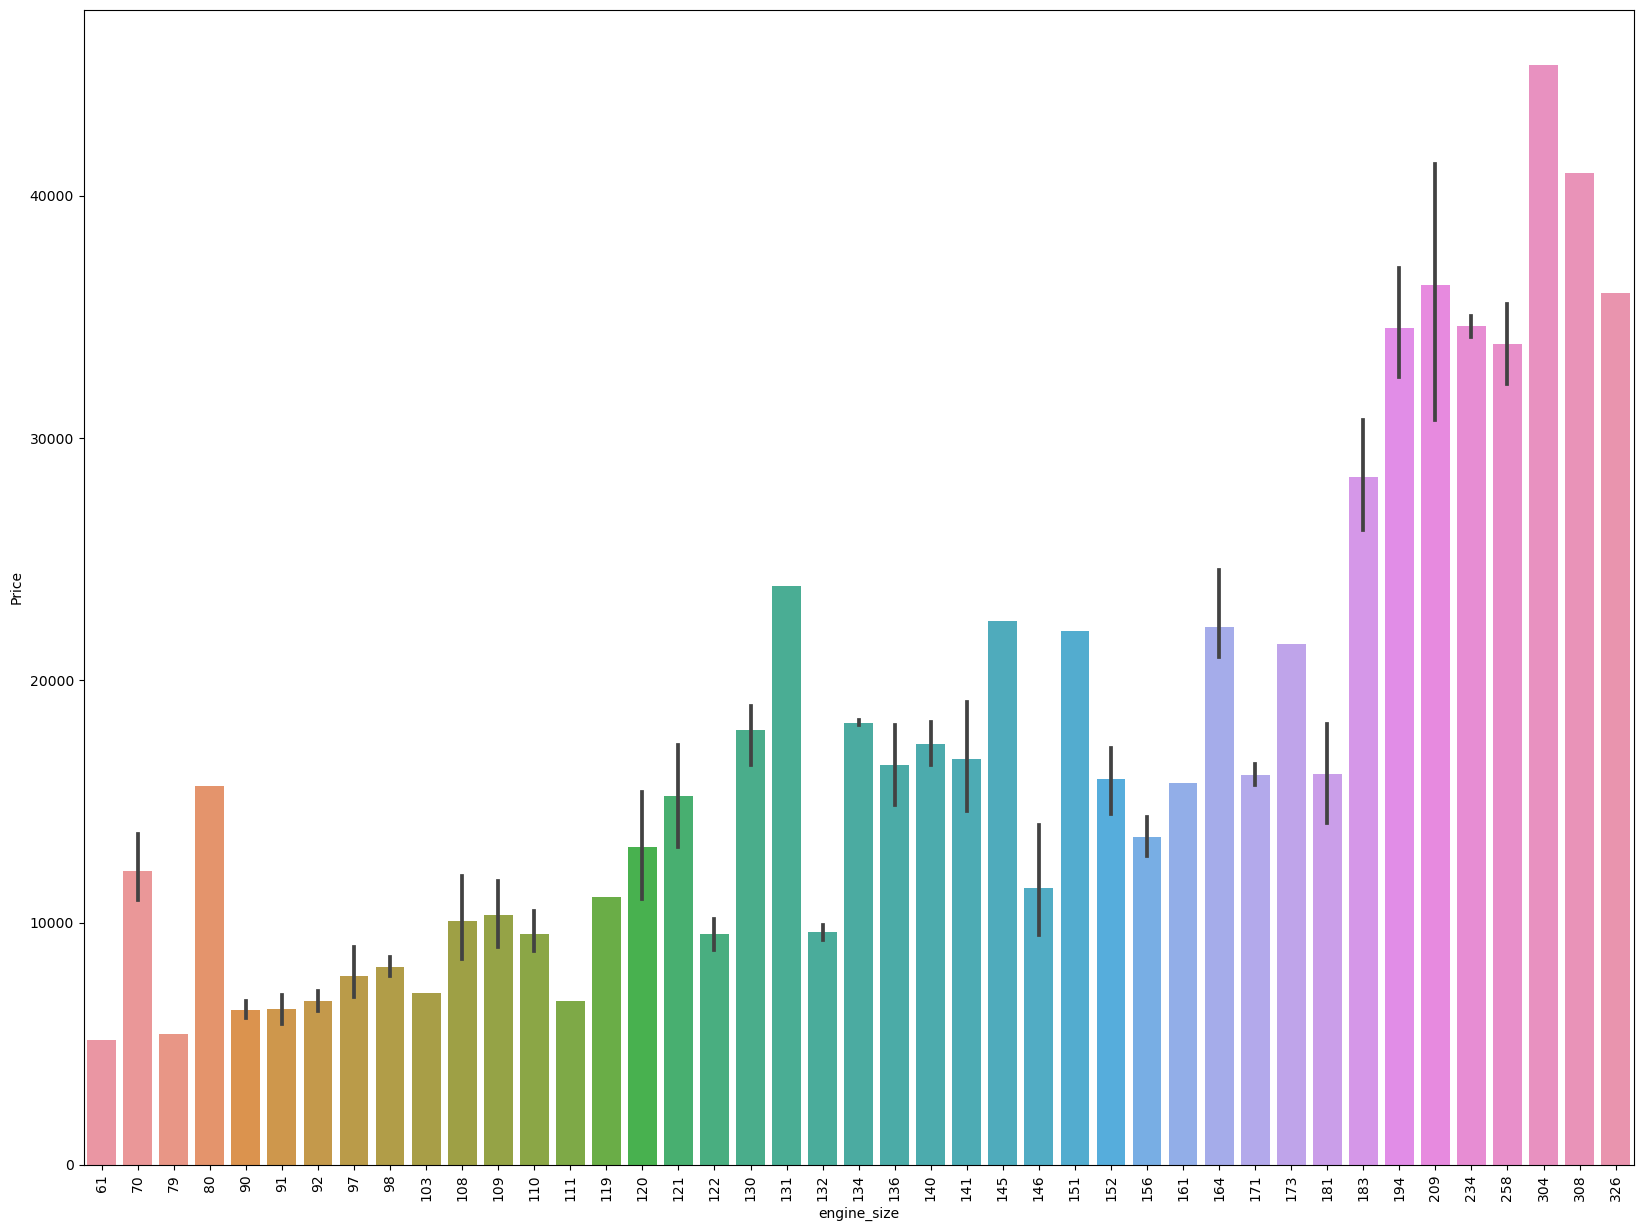

In [65]:
plt.figure(figsize=(20,15))# Here we define figure size
sns.barplot(x=data.engine_size,y=data.Price)# we create barplot between engine_size and price columns
plt.xticks(rotation=90)# assign the x-label column and rotate their name to 90 degree
plt.show()# To show the figure

* The engine size quiet well define the price points of cars in dataset.

<Axes: xlabel='fuel_system', ylabel='Price'>

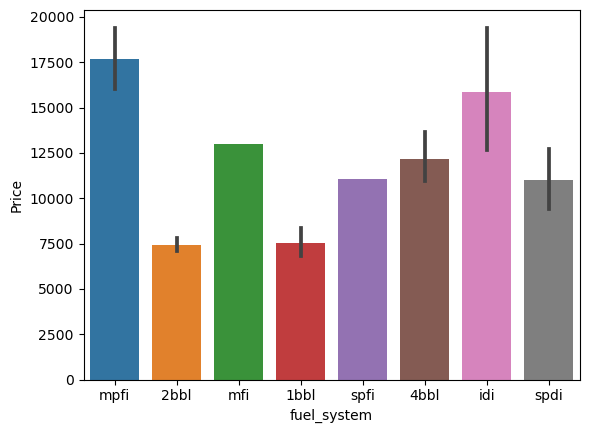

In [66]:
sns.barplot(x=data.fuel_system,y=data.Price)# we draw barplot between fuel_system and price

* The car having a fuel system of MPFI and IDI are more higher in price compare to other types of system. 

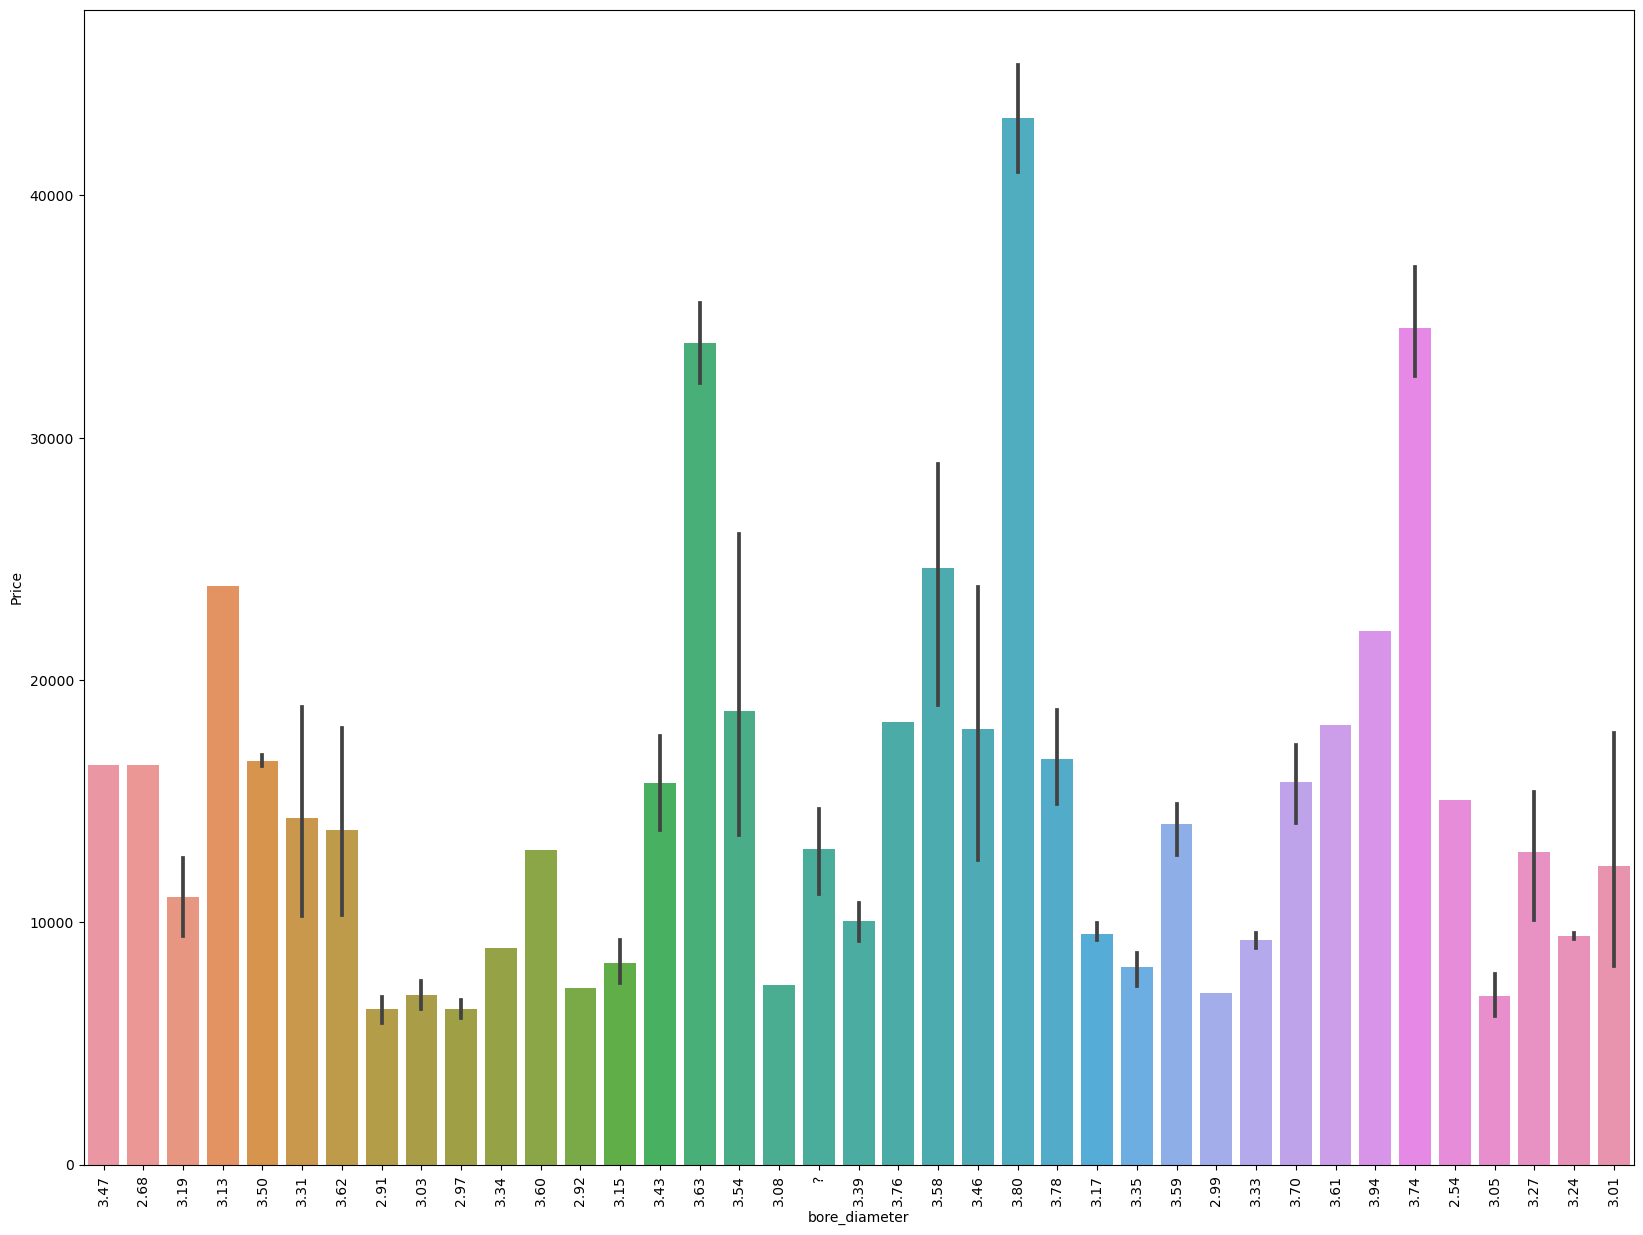

In [67]:
plt.figure(figsize=(20,15))# Here we define figure size
sns.barplot(x=data.bore_diameter,y=data.Price)# we create barplot between bore_diameter and price columns
plt.xticks(rotation=90)# assign the x-label column and rotate their name to 90 degree
plt.show()# To show the figure

* The mid range of Bore diameter in cars are having higher price value.

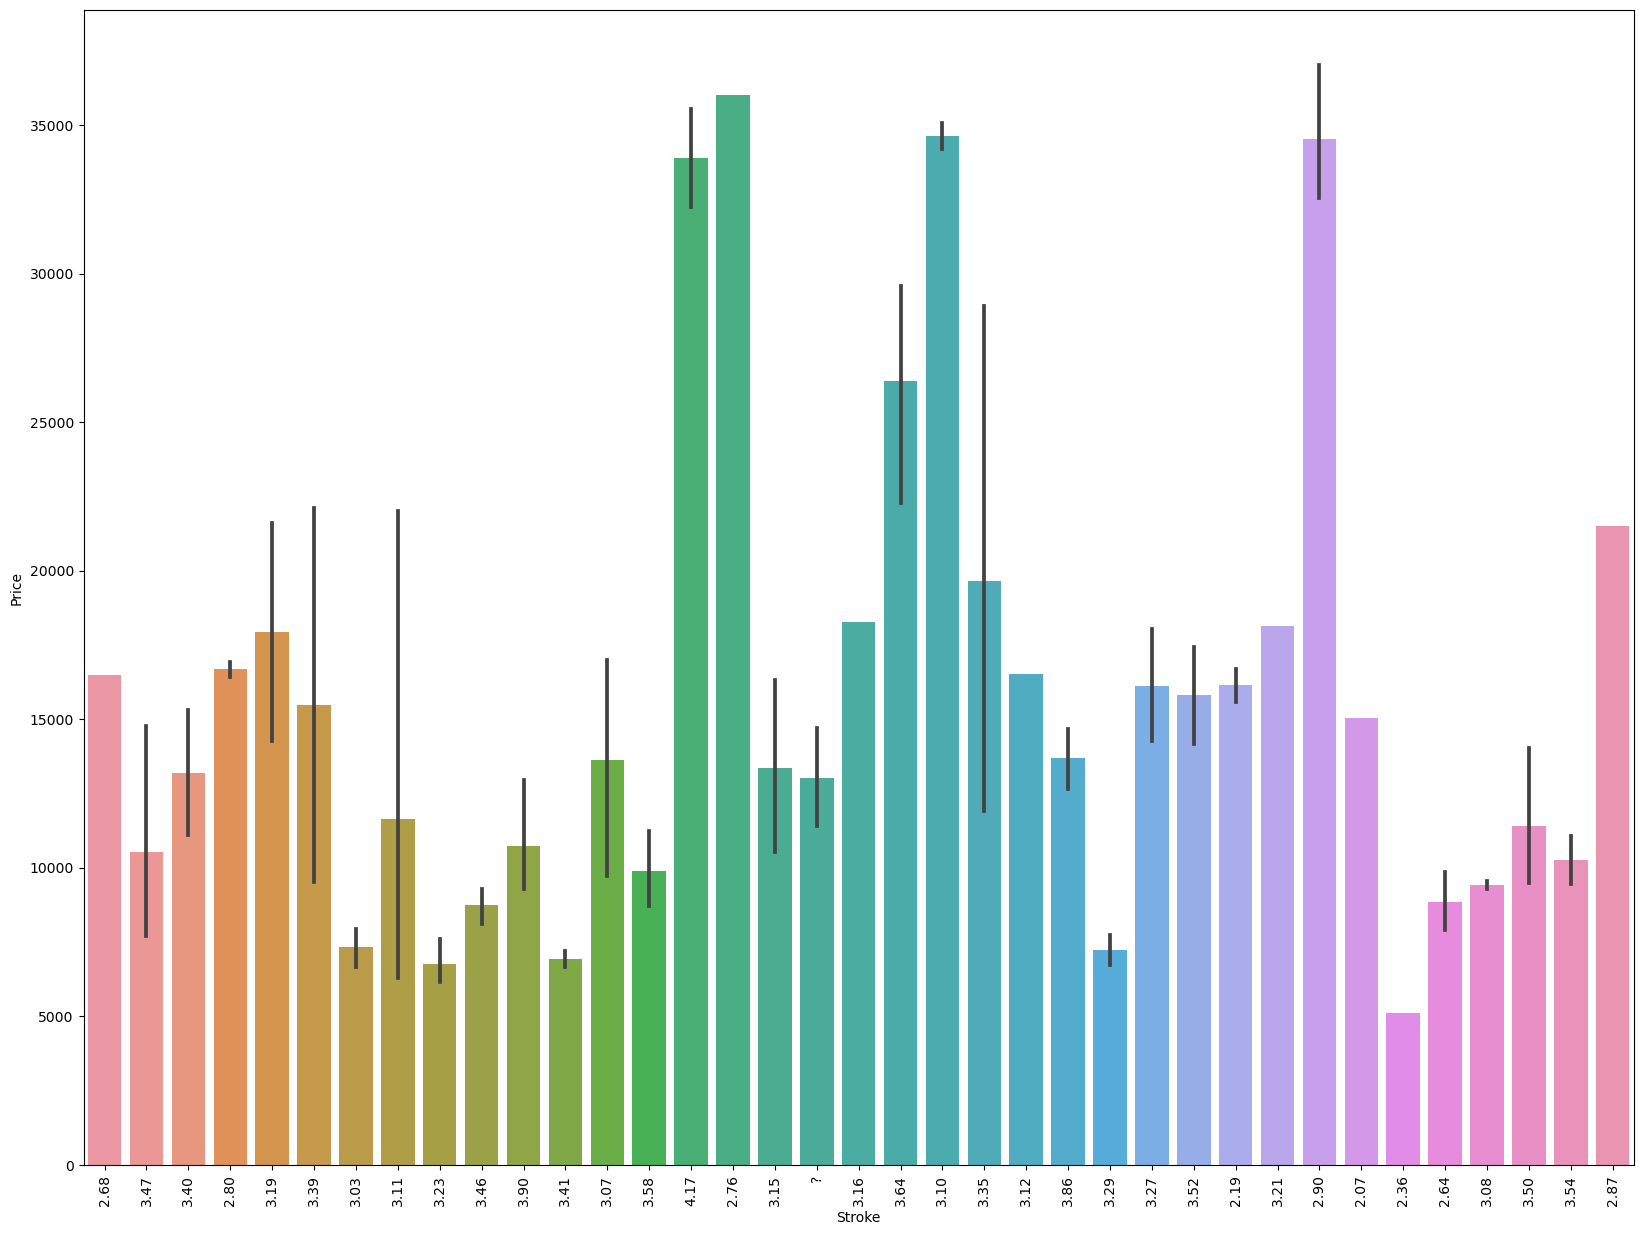

In [68]:
plt.figure(figsize=(20,15))# Here we define figure size
sns.barplot(x=data.Stroke,y=data.Price)# we create barplot between Stroke and price columns
plt.xticks(rotation=90)# assign the x-label column and rotate their name to 90 degree
plt.show()# To show the figure

* The mid range of stroke in cars are quiet high on price.

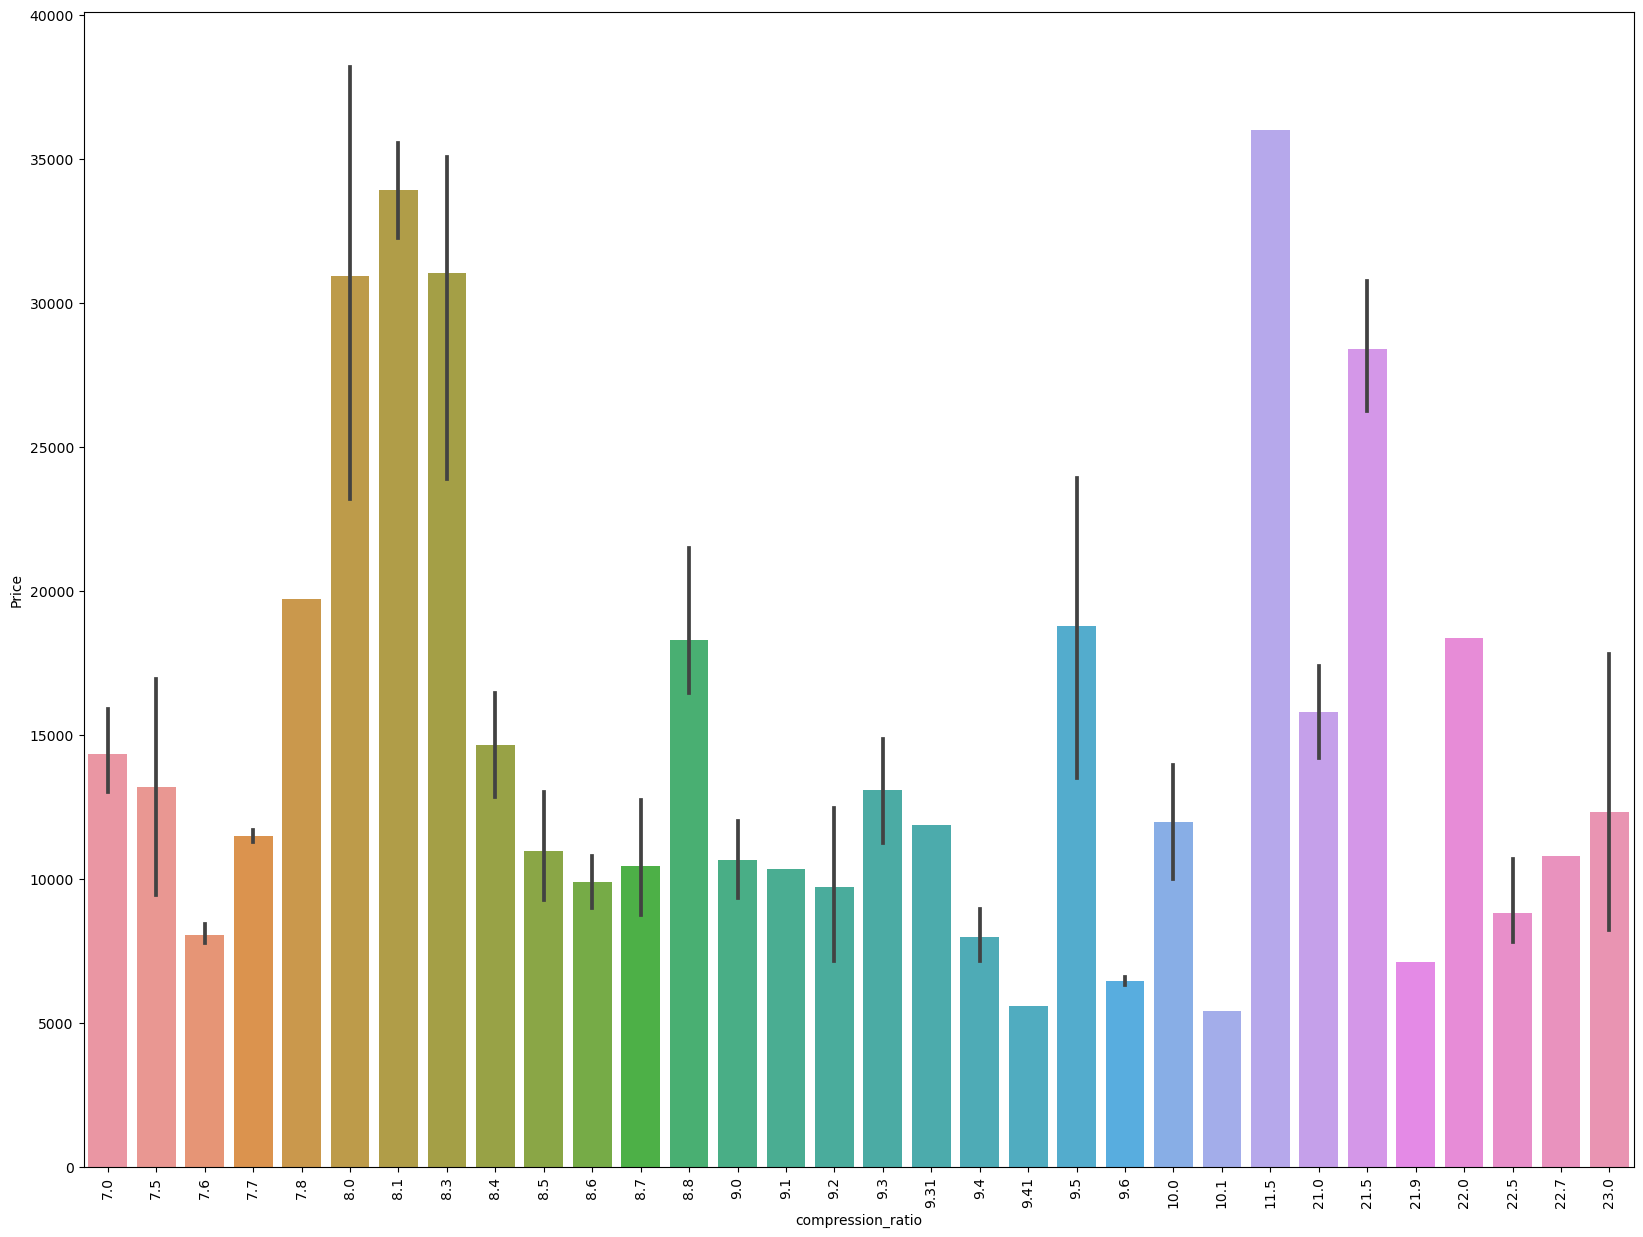

In [69]:
plt.figure(figsize=(20,15))# Here we define figure size
sns.barplot(x=data.compression_ratio,y=data.Price)# we create barplot between compression_ratio and price columns
plt.xticks(rotation=90)# assign the x-label column and rotate their name to 90 degree
plt.show()# To show the figure

* The compression ratio not that much defines the price of cars in dataset.

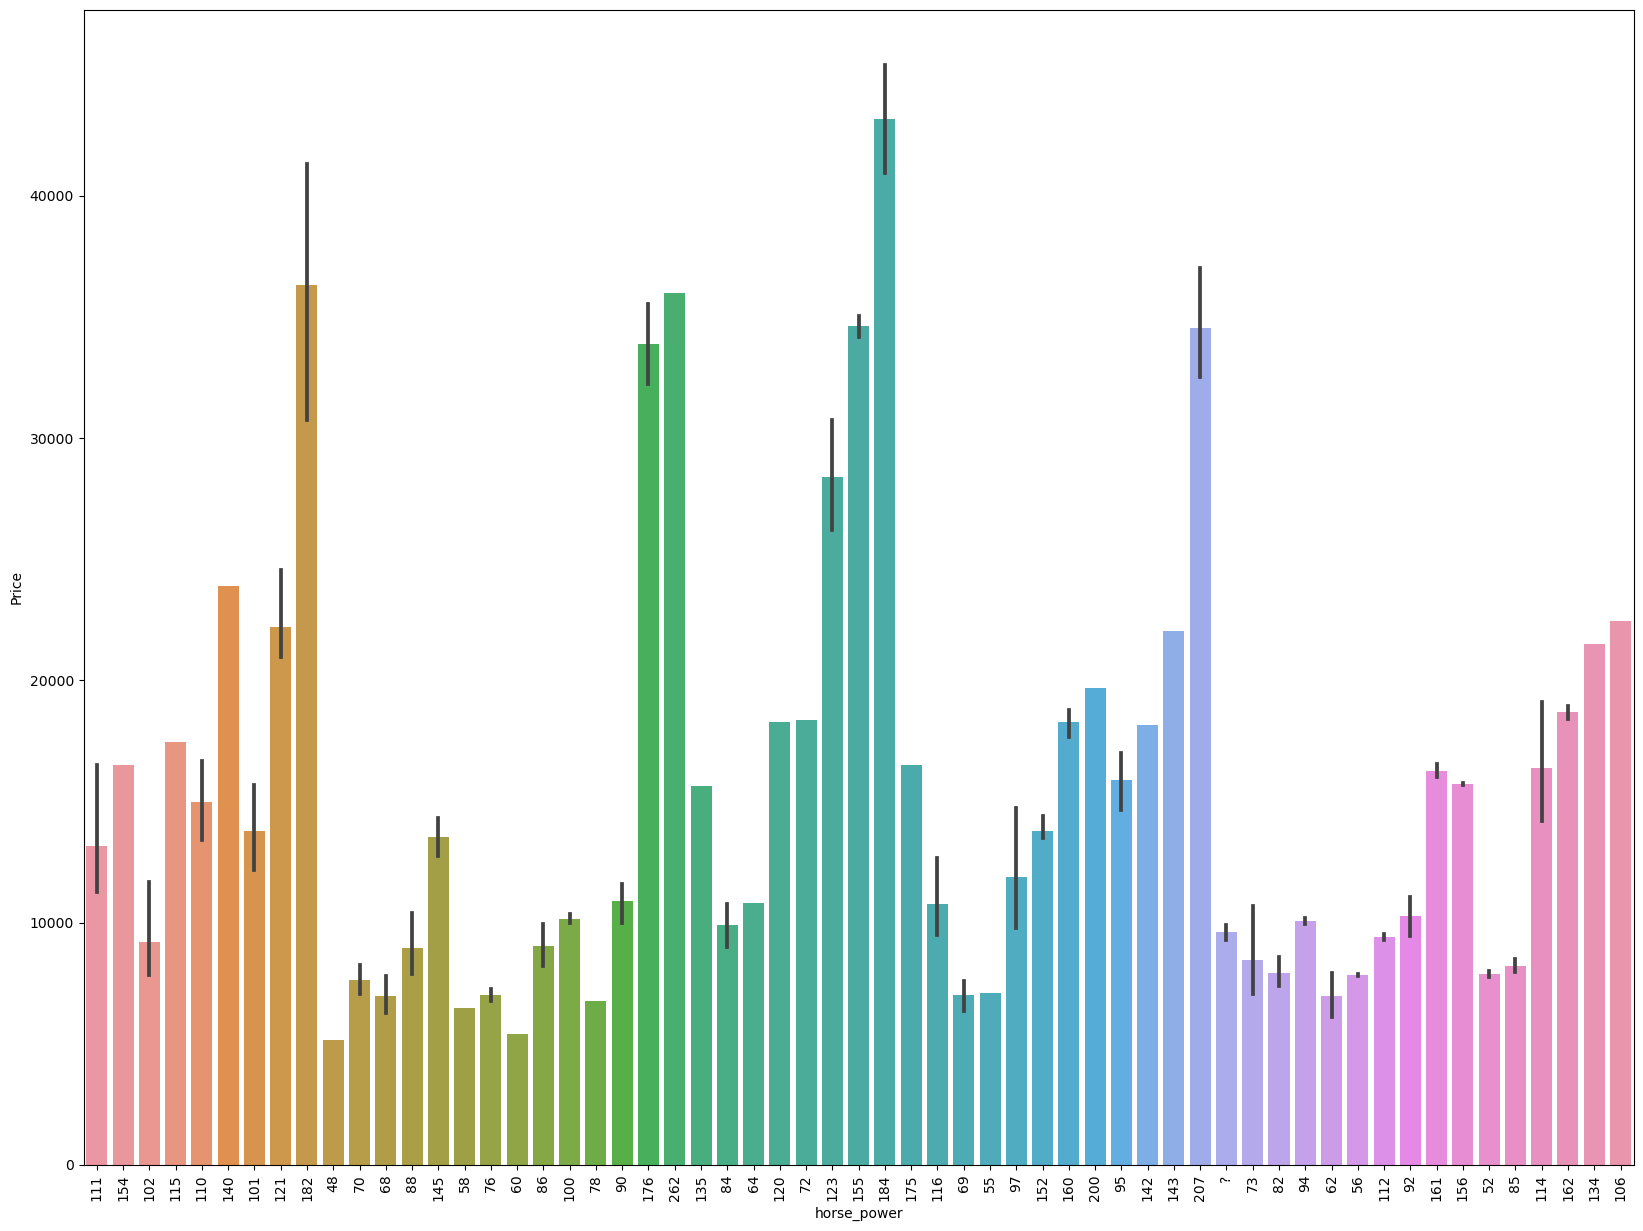

In [70]:
plt.figure(figsize=(20,15))# Here we define figure size
sns.barplot(x=data.horse_power,y=data.Price)# we create barplot between horse_power and price columns
plt.xticks(rotation=90)# assign the x-label column and rotate their name to 90 degree
plt.show()# To show the figure

* The mid range of the horse power of cars are more in price and other both end of distubution are lower in price compare to them.

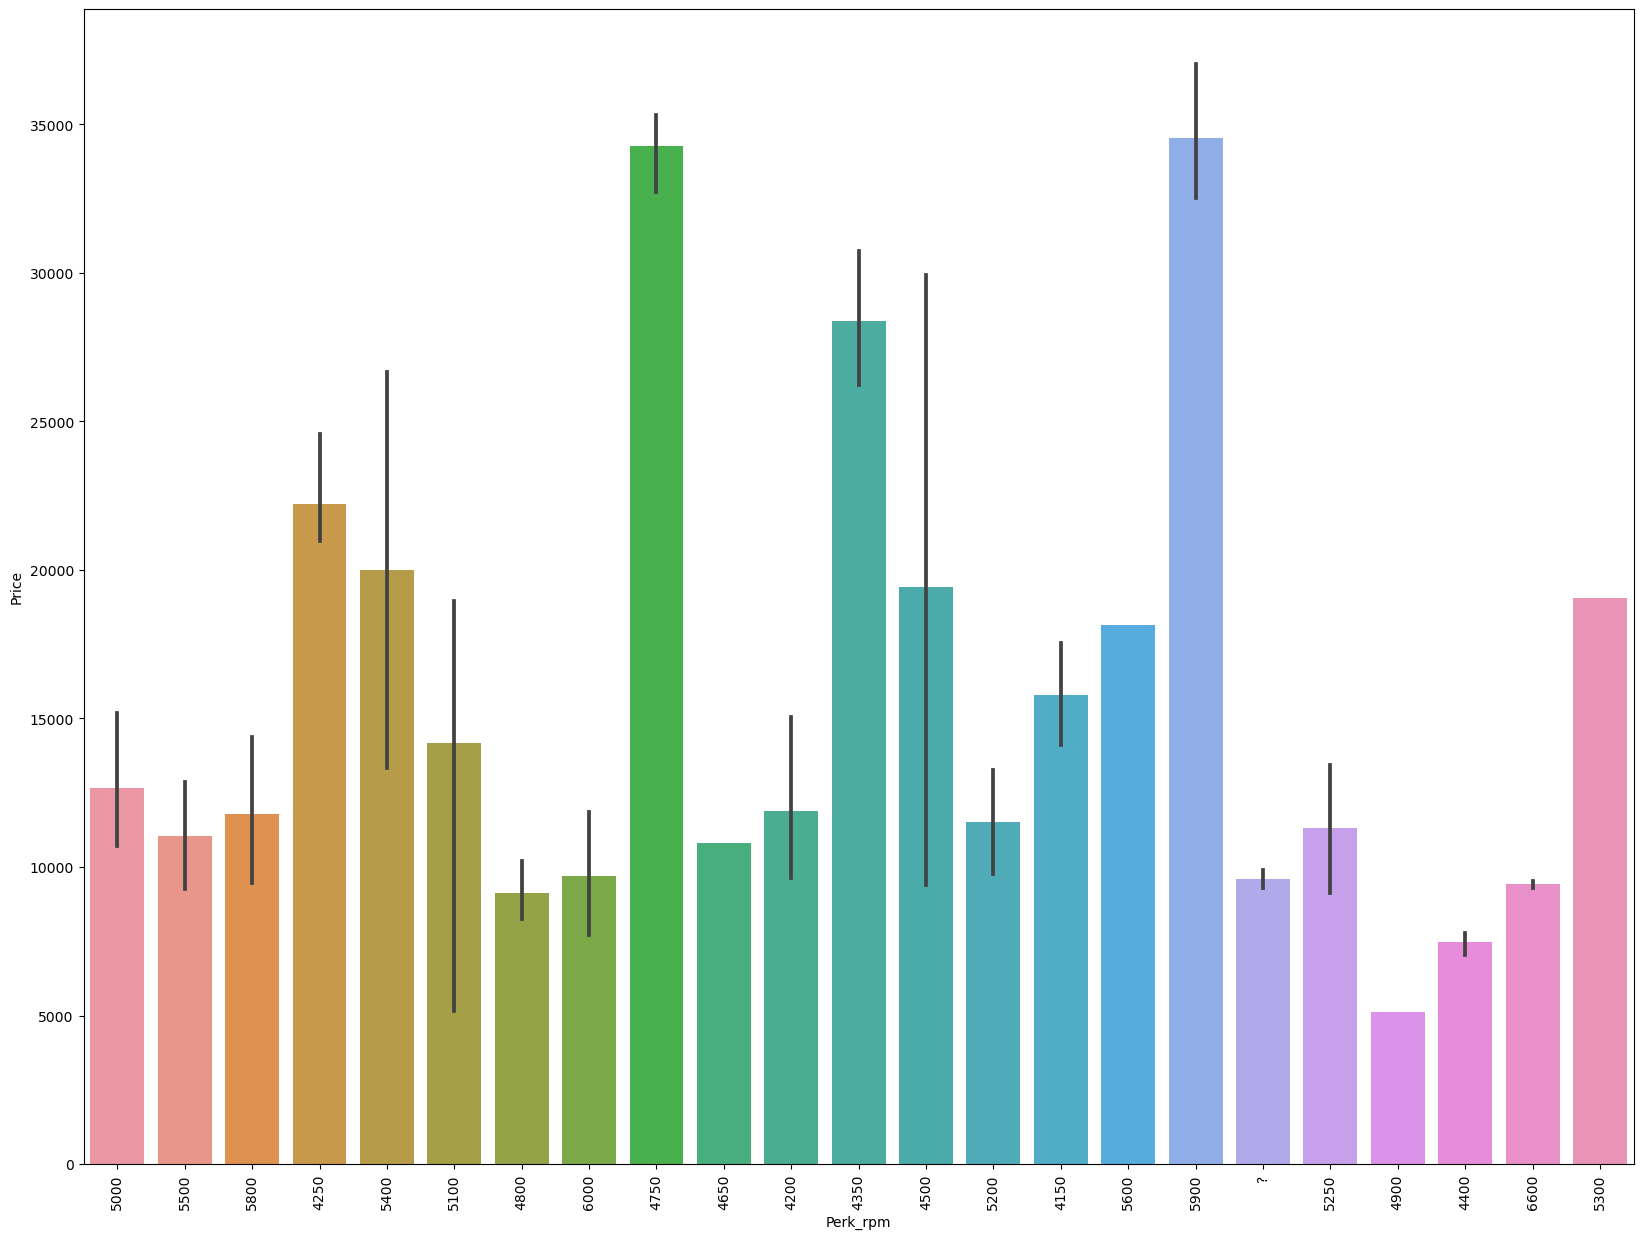

In [71]:
plt.figure(figsize=(20,15))# Here we define figure size
sns.barplot(x=data.Perk_rpm,y=data.Price)# we create barplot between Perk_rpm and price columns
plt.xticks(rotation=90)# assign the x-label column and rotate their name to 90 degree
plt.show()# To show the figure

* There is no corealation between Perk_rpm and Price.

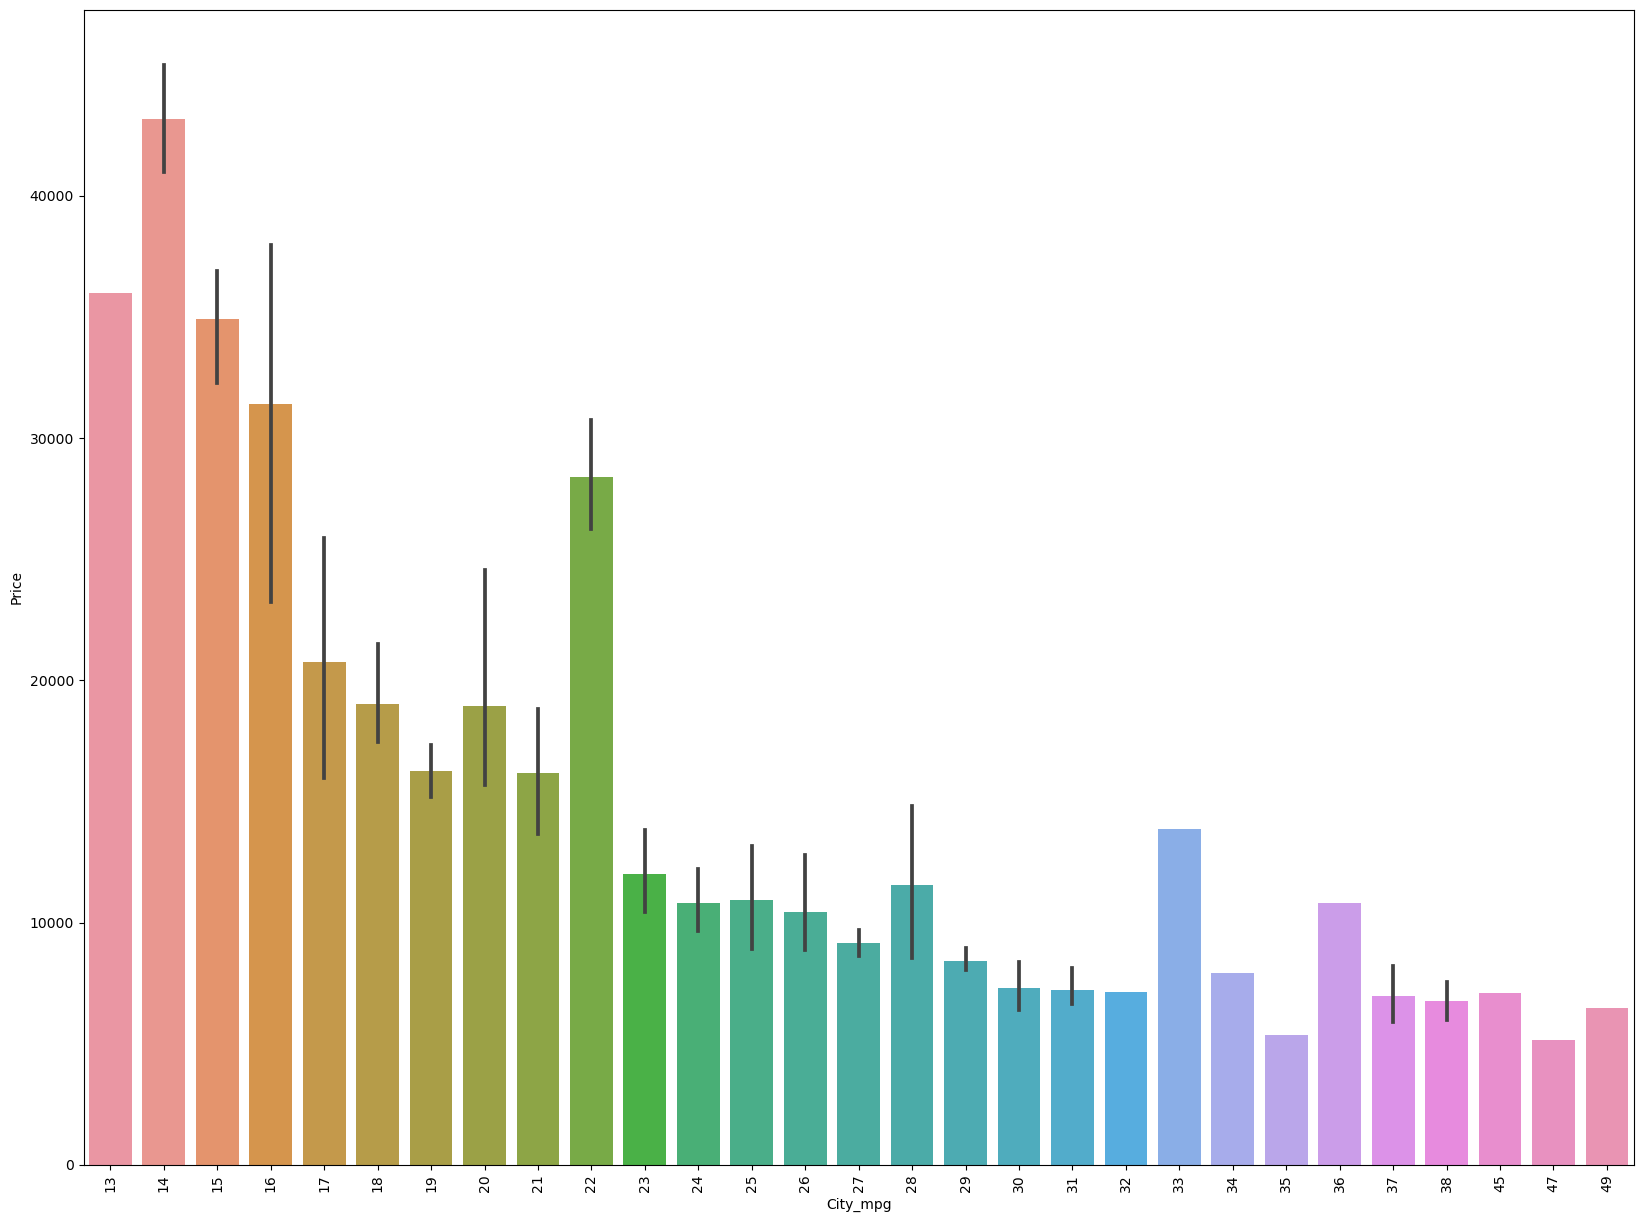

In [72]:
plt.figure(figsize=(20,15))# Here we define figure size
sns.barplot(x=data.City_mpg,y=data.Price)# we create barplot between City_mpg and price columns
plt.xticks(rotation=90)# assign the x-label column and rotate their name to 90 degree
plt.show() # To show the figure

* The city MPG and price having (-ve) relation between them both column.

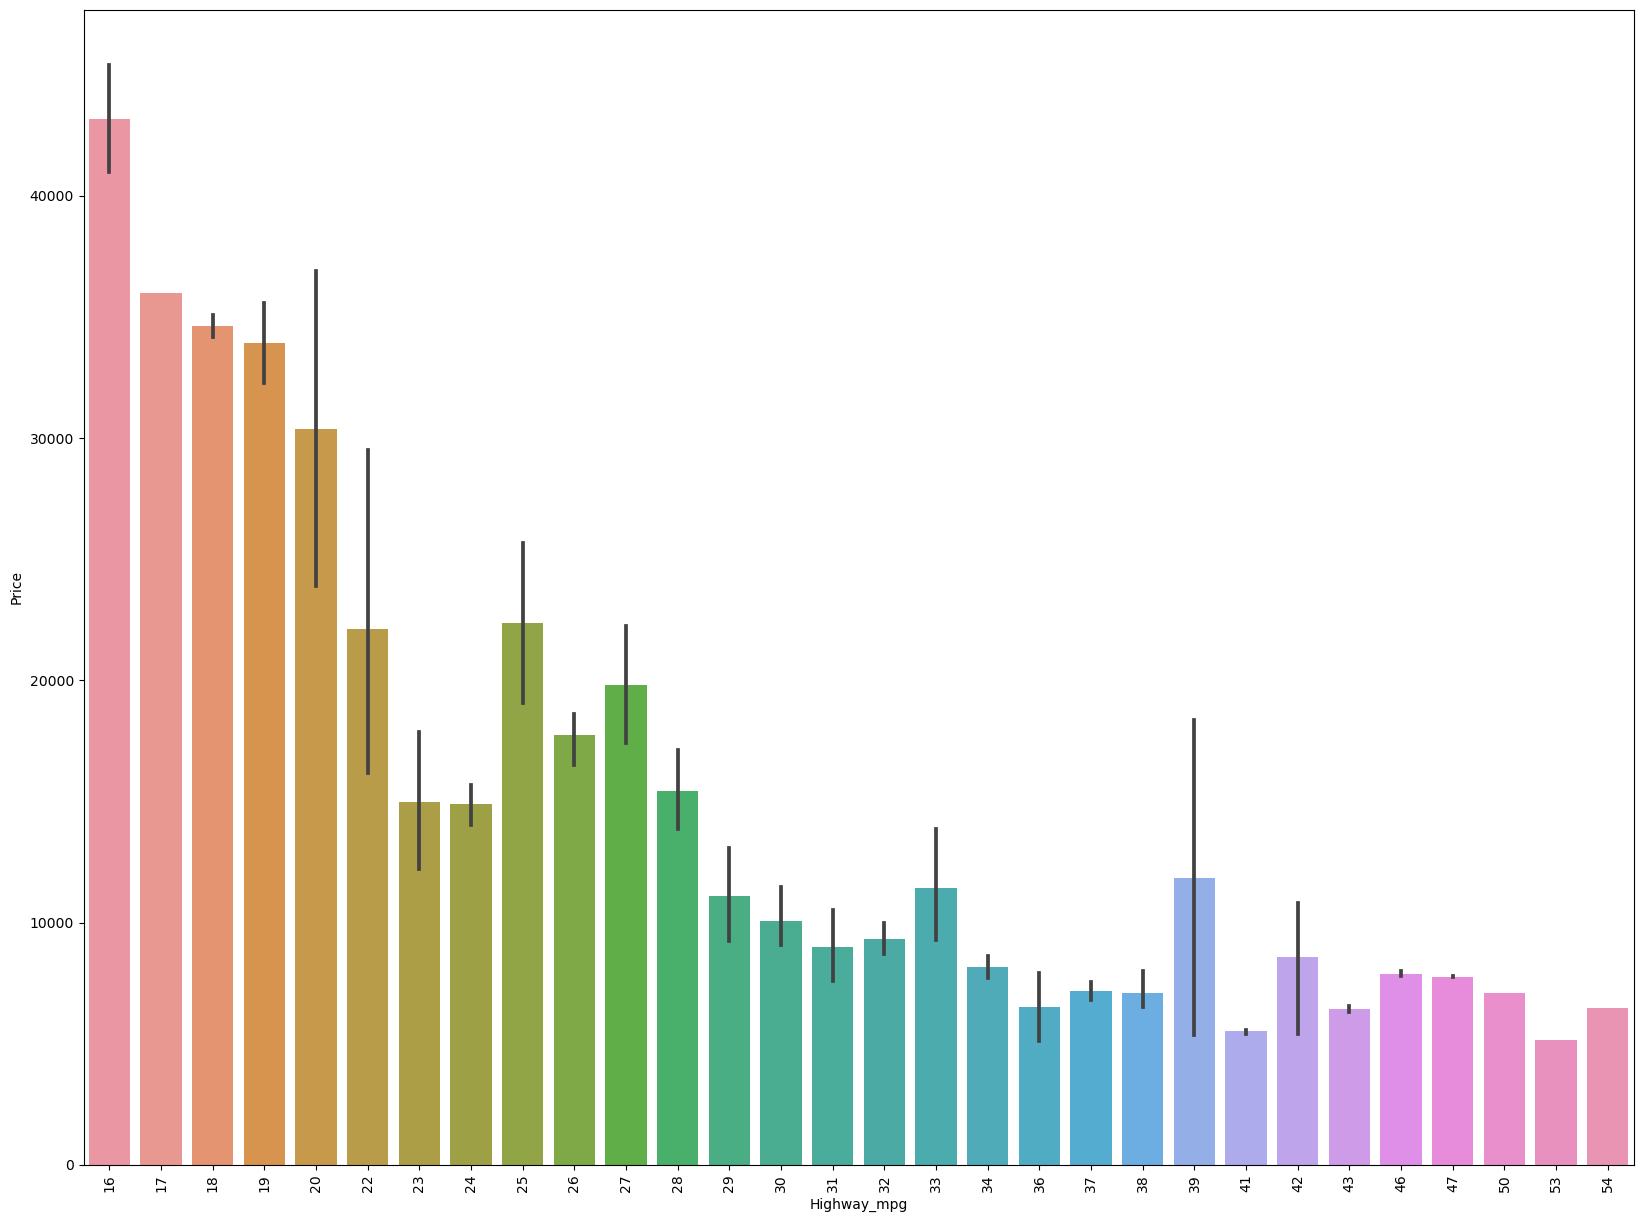

In [73]:
plt.figure(figsize=(20,15))# Here we define figure size
sns.barplot(x=data.Highway_mpg,y=data.Price)# we create barplot between highway_mpg and price columns
plt.xticks(rotation=90)# assign the x-label column and rotate their name to 90 degree
plt.show() # To show the figure

* The Higher the highway MPG the lower the price get accoding to dataset.

## Multivariante Analysis

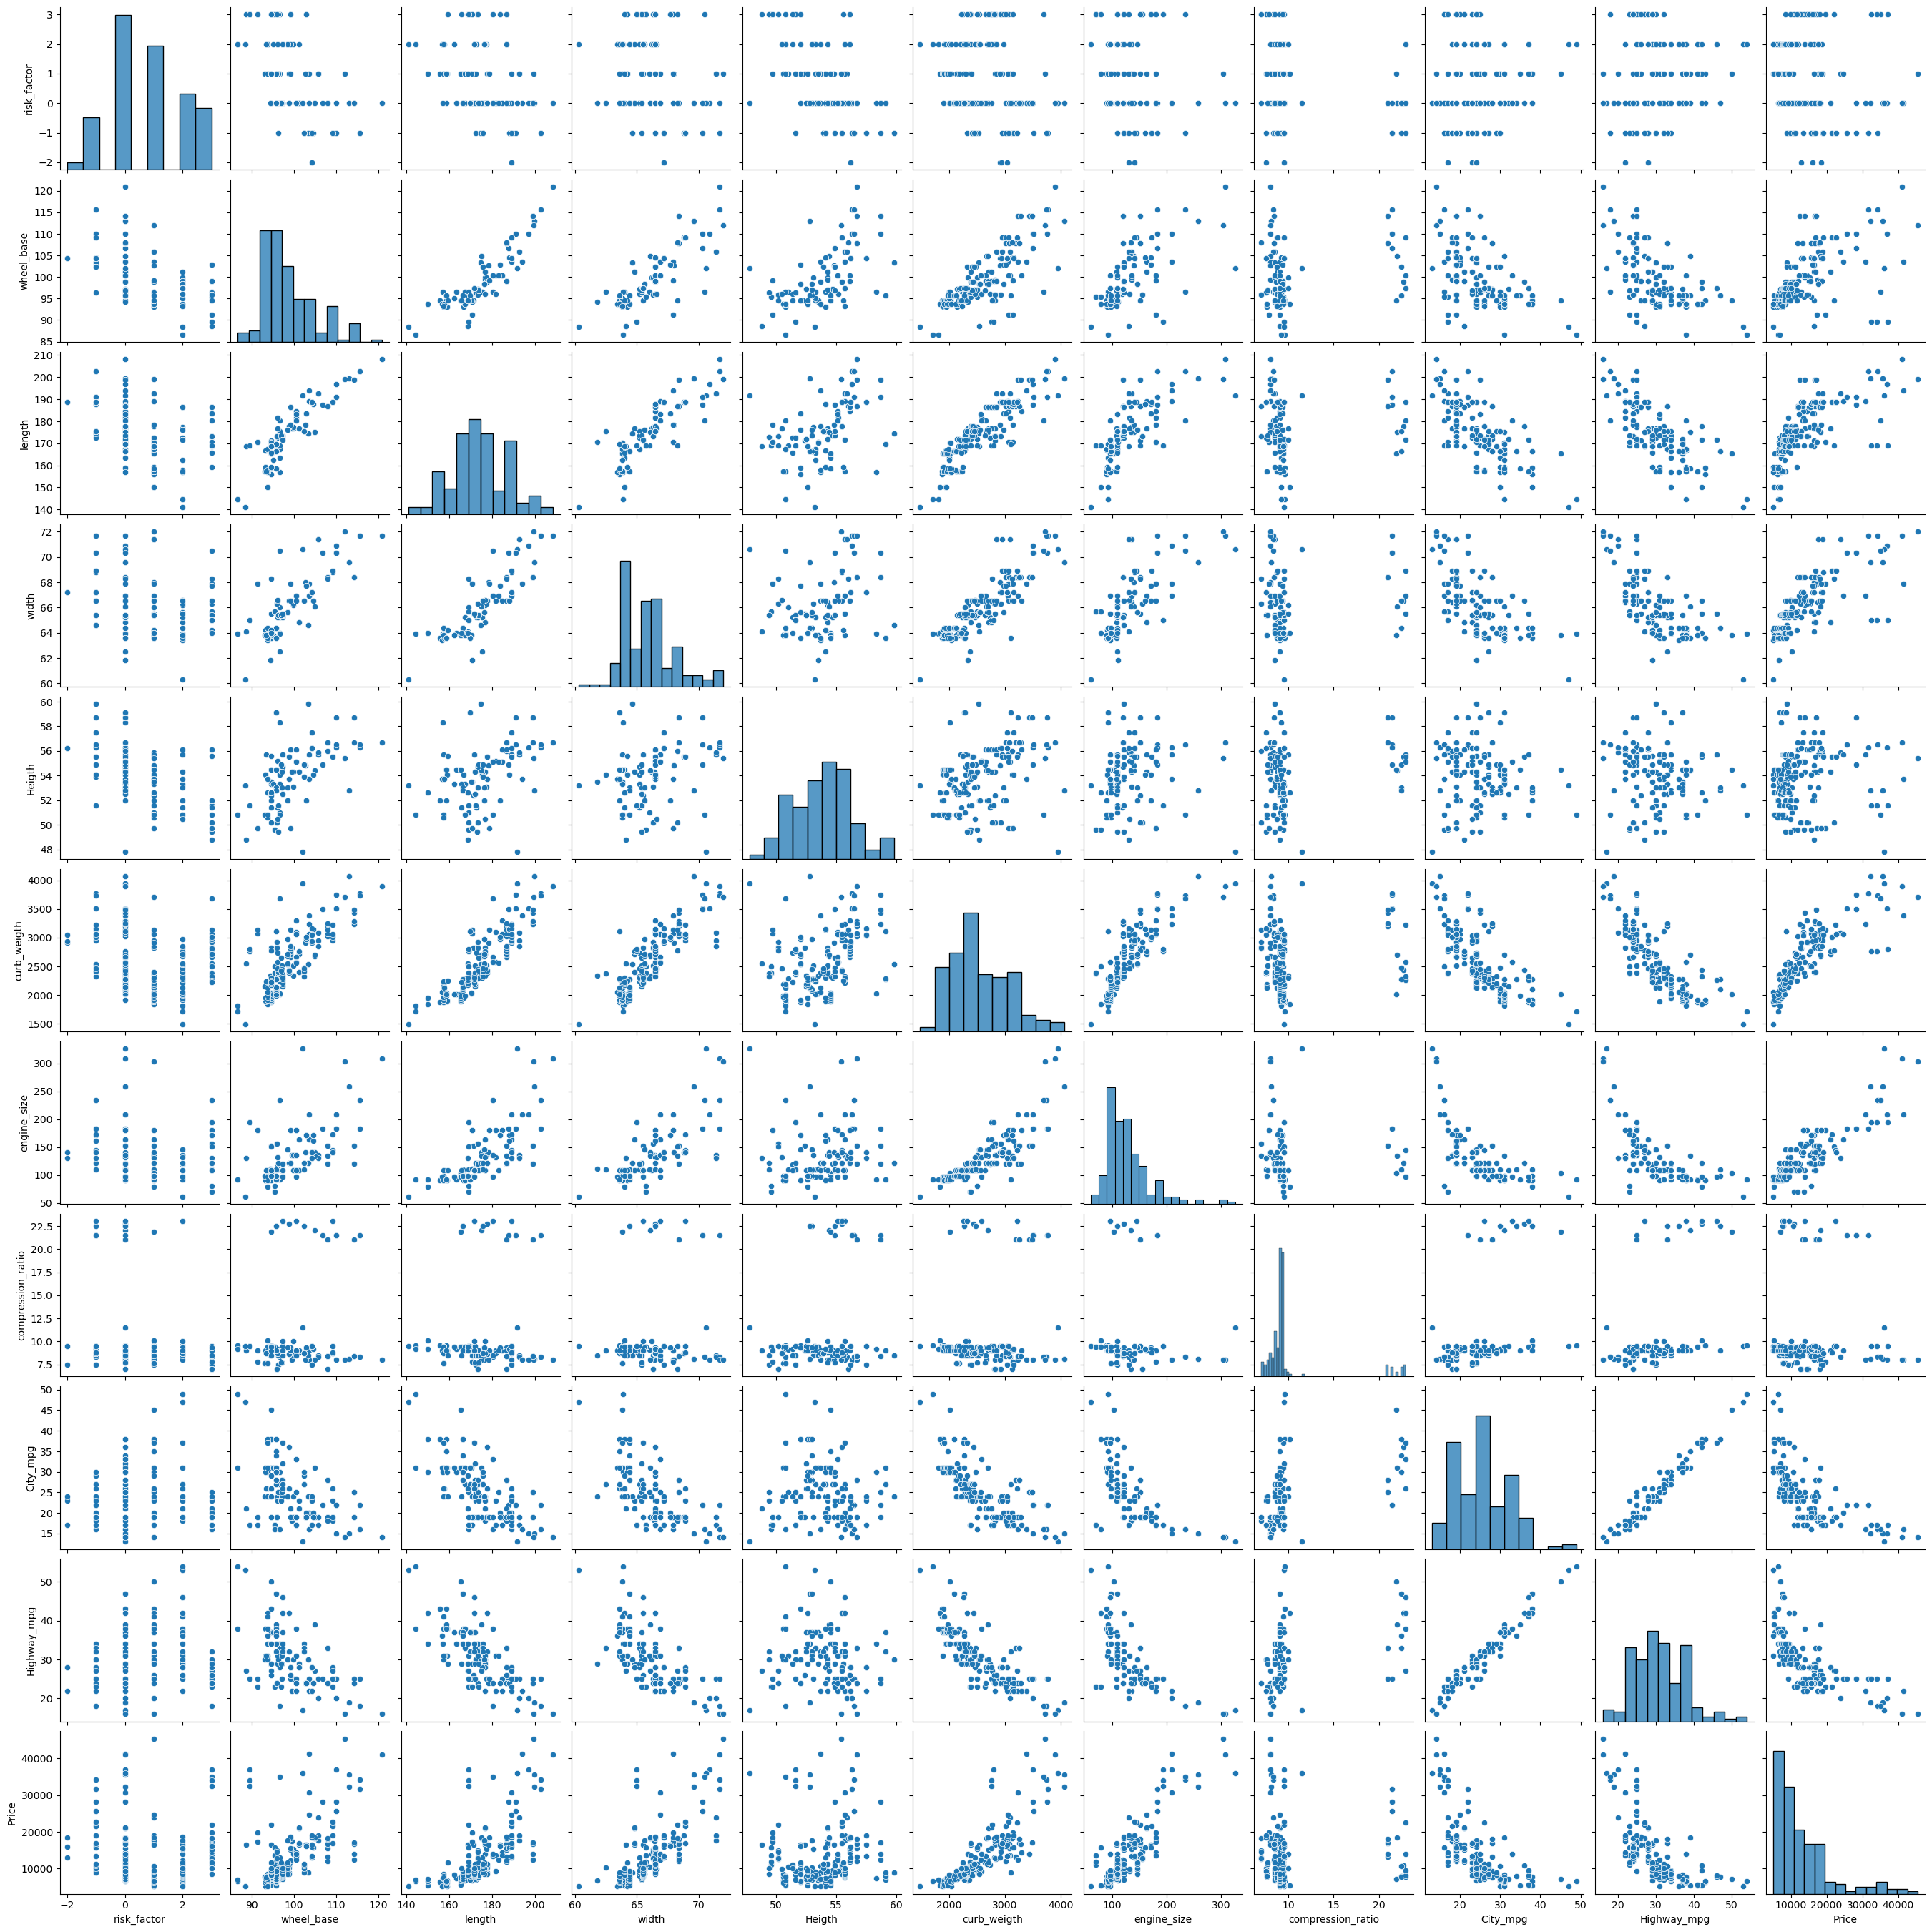

In [74]:
sns.pairplot(data) # Multivarient Analysis

* The column Width and length and Wheel base and Length are postively coorelated with each other.
* The column horse power and price having no corealtion with each other.
* Price and engine size column having a rigth skewness among them show that fews cars having high price and fewer cars having high in engine size.
* The pairplot also show us outliers in it where its having that higher the horse power of cars lower the price of car in dataset.

### Final Report of EDA

* Here we use histogram plot for continuoes column.
* We do not see any single distrubution is normal in whole dataset.
* So we have to use median for handing the outliers of every column.
* The analyis indicate not much corealation in car price at every single column.

## Feature Enginerring

* It is the process of using domain knowledge to select, modify, or create new features from raw data that can improve the performance of machine learning models. It involves transforming raw data into a format that is more suitable for modeling and can significantly impact model accuracy and effectiveness.

#### 1 Data Preprocessing :-

##### Data Preprocessing:- 
* It is the comprehensive set of techniques and processes used to clean, transform, and organize raw data into a suitable format for analysis or machine learning. It is a critical step in the data analysis pipeline that ensures the quality and relevance of the data used for modeling.

In [75]:
data.isnull().sum() # check the null value

risk_factor           0
?                     0
car_name              0
fuel_type             0
induction_type        0
car_door              0
car_body_type         0
wheel_drive           0
engine_location       0
wheel_base            0
length                0
width                 0
Heigth                0
curb_weigth           0
engine_type           0
number_of_cylinder    0
engine_size           0
fuel_system           0
bore_diameter         0
Stroke                0
compression_ratio     0
horse_power           0
Perk_rpm              0
City_mpg              0
Highway_mpg           0
Price                 0
dtype: int64

* In whole data there is no null value so its makes our works easy to do further.

In [76]:
for column in data.columns:
    b = data[column].unique()
    print(f"unique value in column'{column}':")
    print(b) # To check the unique values in every single column 

unique value in column'risk_factor':
[ 3  1  2  0 -1 -2]
unique value in column'?':
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
unique value in column'car_name':
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
unique value in column'fuel_type':
['gas' 'diesel']
unique value in column'induction_type':
['std' 'turbo']
unique value in column'car_door':
['two' 'four' '?']
unique value in column'car_body_type':
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
unique value in column'wheel_drive':
['rwd' 'fwd' '4wd']
unique value in column'engine_location':
['front' '

In [77]:
data=data[data["car_door"]!="?"] # To handle the corrupt values in rows of dataset
data=data[data["bore_diameter"]!="?"] # To handle the corrupt values in rows of dataset
data=data[data["Stroke"]!="?"] # To handle the corrupt values in rows of dataset
data=data[data["horse_power"]!="?"] # To handle the corrupt values in rows of dataset
data=data[data["Perk_rpm"]!="?"] # To handle the corrupt values in rows of dataset

In [78]:
data.info() # for information of the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 199
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   risk_factor         192 non-null    int64  
 1   ?                   192 non-null    object 
 2   car_name            192 non-null    object 
 3   fuel_type           192 non-null    object 
 4   induction_type      192 non-null    object 
 5   car_door            192 non-null    object 
 6   car_body_type       192 non-null    object 
 7   wheel_drive         192 non-null    object 
 8   engine_location     192 non-null    object 
 9   wheel_base          192 non-null    float64
 10  length              192 non-null    float64
 11  width               192 non-null    float64
 12  Heigth              192 non-null    float64
 13  curb_weigth         192 non-null    int64  
 14  engine_type         192 non-null    object 
 15  number_of_cylinder  192 non-null    object 
 16  engine_size  

In [79]:
data[["Perk_rpm","horse_power","Stroke","bore_diameter"]]=data[["Perk_rpm","horse_power","Stroke","bore_diameter"]].astype("float64") # To change the data type of the column 

### Here we gone drop column which are not useful for us

In [80]:
data.drop(["?"],axis=1,inplace=True) # Here we drop the useless column for our prediction

In [81]:
data.head() # To show the top five columns of the dataset and the conformation of droping column in the dataset

,risk_factor,car_name,fuel_type,induction_type,car_door,car_body_type,wheel_drive,engine_location,wheel_base,length,width,Heigth,curb_weigth,engine_type,number_of_cylinder,engine_size,fuel_system,bore_diameter,Stroke,compression_ratio,horse_power,Perk_rpm,City_mpg,Highway_mpg,Price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
1,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
2,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
3,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450
4,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250


In [82]:
data.columns # name of all columns

Index(['risk_factor', 'car_name', 'fuel_type', 'induction_type', 'car_door',
       'car_body_type', 'wheel_drive', 'engine_location', 'wheel_base',
       'length', 'width', 'Heigth', 'curb_weigth', 'engine_type',
       'number_of_cylinder', 'engine_size', 'fuel_system', 'bore_diameter',
       'Stroke', 'compression_ratio', 'horse_power', 'Perk_rpm', 'City_mpg',
       'Highway_mpg', 'Price'],
      dtype='object')

In [83]:
continoues_column = (['wheel_base','length', 'width', 'Heigth', 'curb_weigth', 'engine_size', 'bore_diameter','Stroke', 'compression_ratio', 'horse_power', 'Perk_rpm', 'City_mpg','Highway_mpg']) # Here we stroe the columns in the variable 

In [84]:
len(continoues_column) # Check the length of columns store in variable

13

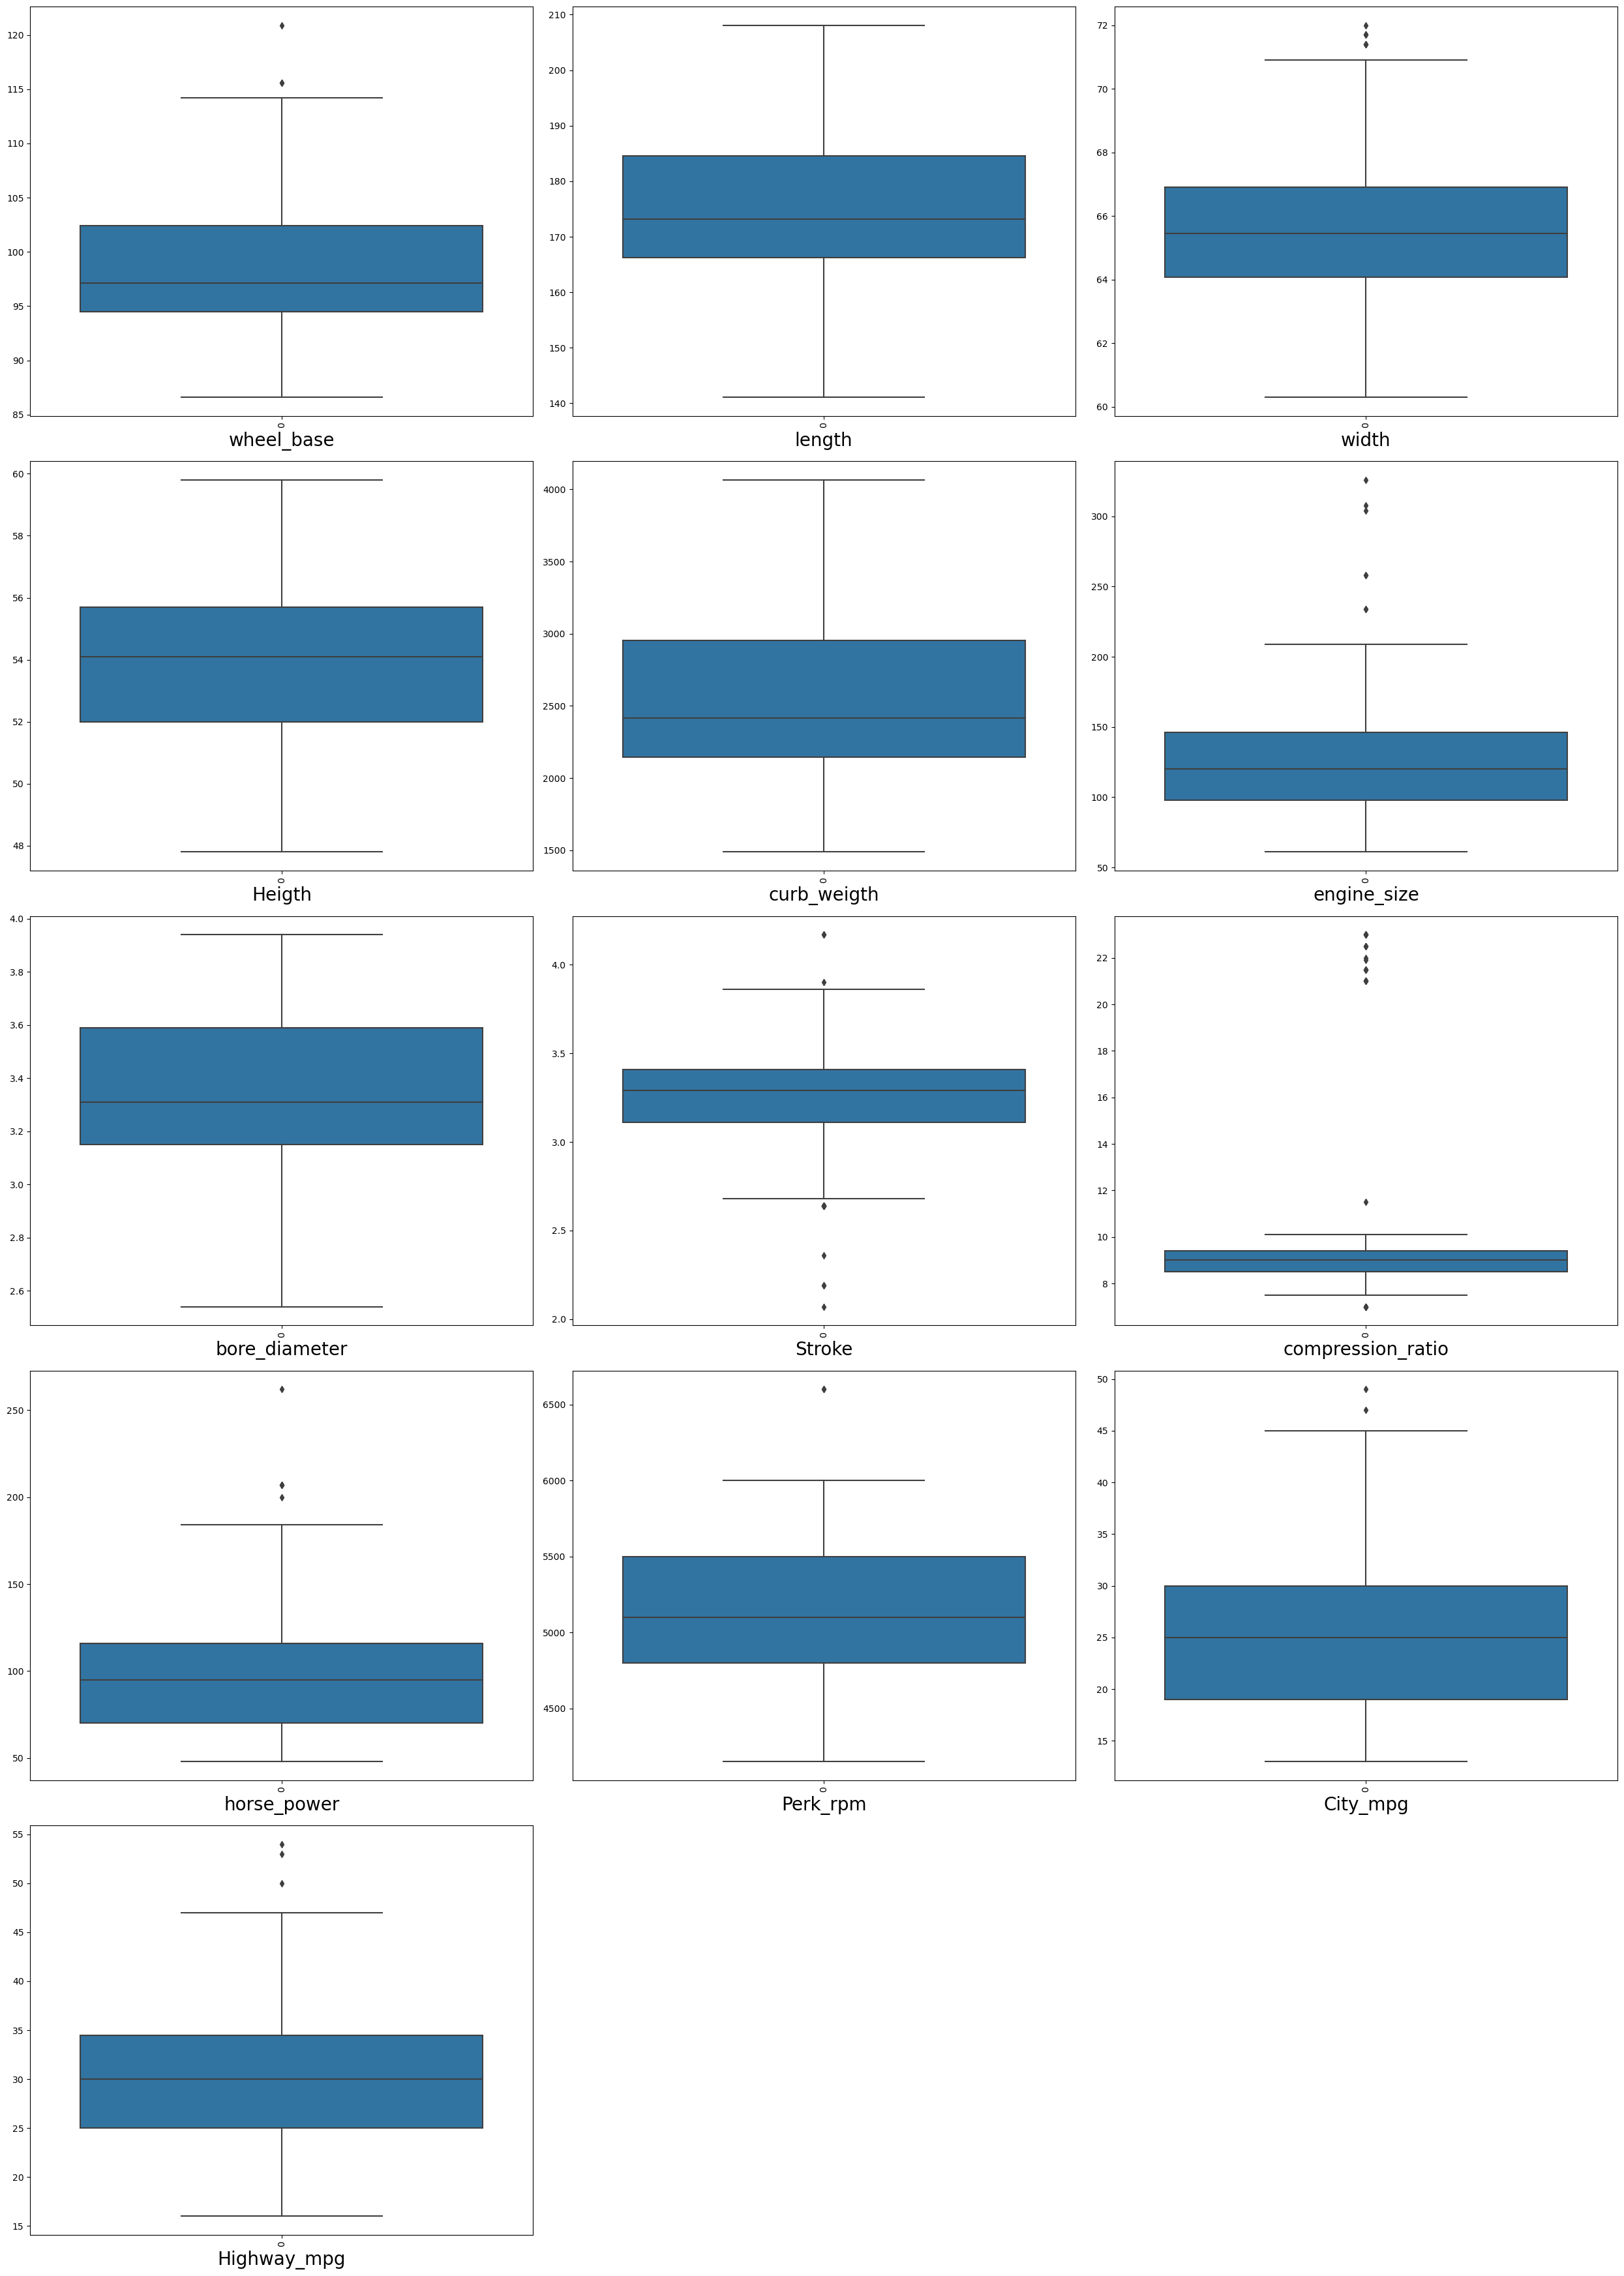

In [85]:
plt.figure(figsize=(25,35)) # we define the figure size
plt_num = 1
for column in continoues_column:
    if plt_num <= 13: # Number of plots we require of columns
        plt.subplot(5,3,plt_num) # define number of subplot in dataset of columns 
        sns.boxplot(data[column]) # here we draw the boxplot of all the columns 
        plt.xlabel(column,fontsize = 20) # To give label to x-axis and fontsize of it label
        plt.xticks(rotation = 90) # assign the x-label column and rotate their name to 90 degree
    plt_num += 1
plt.tight_layout() # use for data show function

* Here we outliers in column name "wheel base","Width","engine_size","stroke","compression ratio","horse power","Perk_rpm","City_mpg","Highway_mpg".So we have to handle it according
 their distribution in histplot of graphical representation.

<Axes: xlabel='wheel_base'>

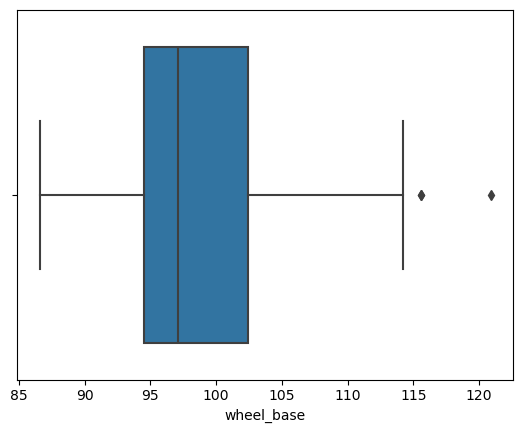

In [86]:
sns.boxplot(x=data.wheel_base) # draw boxplot for wheel base column

In [87]:
data.loc[data["wheel_base"]>115,"wheel_base"]=np.median(data.wheel_base) # Here we handle the outliers of wheel base column with the help of median

<Axes: xlabel='wheel_base'>

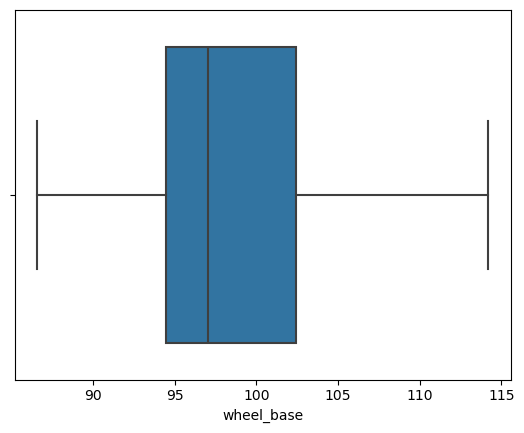

In [88]:
sns.boxplot(x=data.wheel_base) # draw boxplot for wheel base column

<Axes: xlabel='width'>

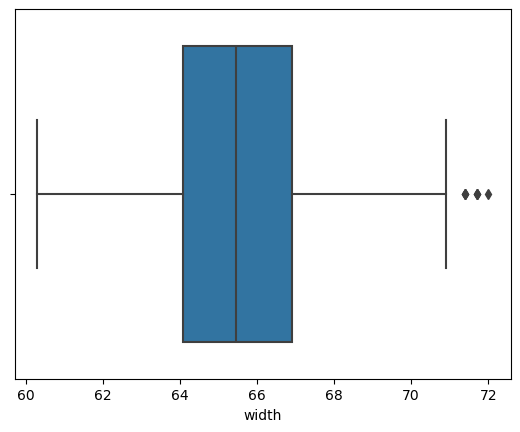

In [89]:
sns.boxplot(x=data.width) # draw boxplot for width column

In [90]:
data.loc[data["width"]>71,"width"]=np.median(data.width) # Here we handle the outliers of width column with the help of median

<Axes: xlabel='width'>

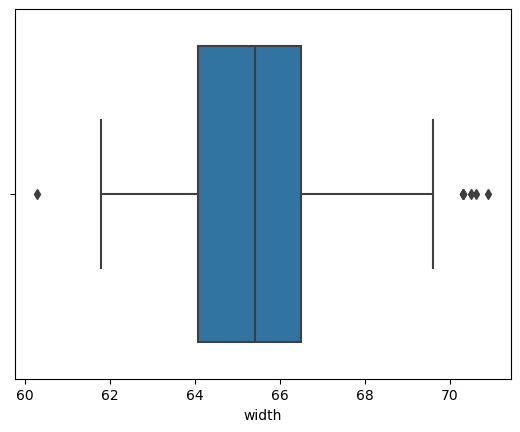

In [91]:
sns.boxplot(x=data.width) # draw boxplot for width column

In [92]:
data.loc[data["width"]>70,"width"]=np.median(data.width)# Here we handle the outliers of width column with the help of median of upper bound

In [93]:
data.loc[data["width"]<61,"width"]=np.median(data.width)# Here we handle the outliers of width column with the help of median of lower bound

<Axes: xlabel='width'>

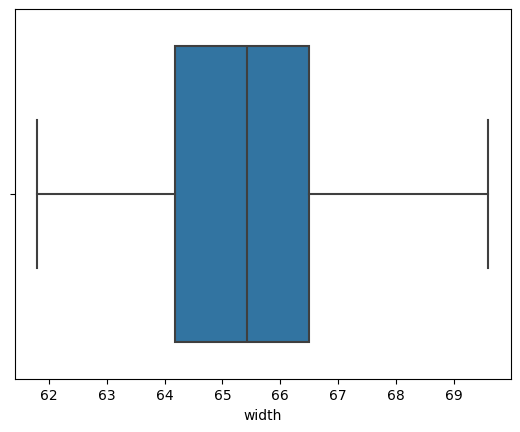

In [94]:
sns.boxplot(x=data.width) # draw boxplot for width column

<Axes: xlabel='engine_size'>

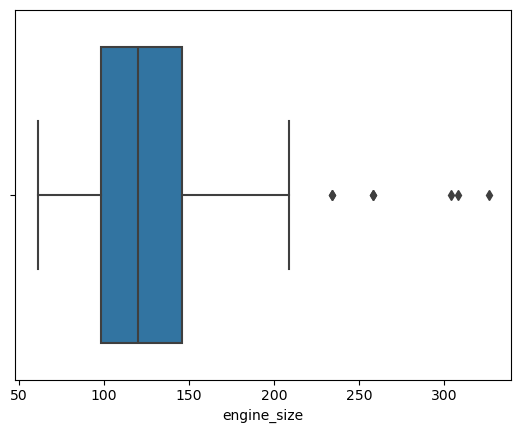

In [95]:
sns.boxplot(x=data.engine_size) # draw boxplot for engine_size column

In [96]:
data.loc[data["engine_size"]>200,"engine_size"]=np.median(data.engine_size)# Here we handle the outliers of engine_size column with the help of median

<Axes: xlabel='engine_size'>

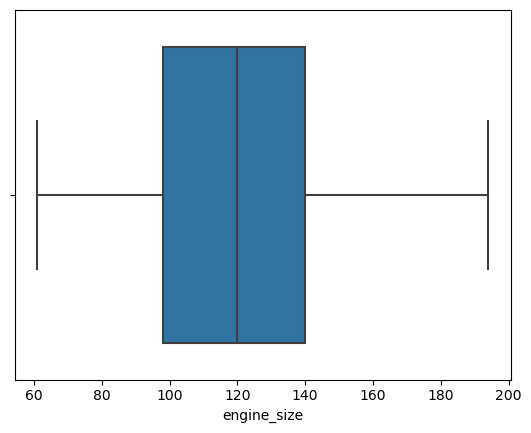

In [97]:
sns.boxplot(x=data.engine_size) # draw boxplot for engine_size column

<Axes: xlabel='Stroke'>

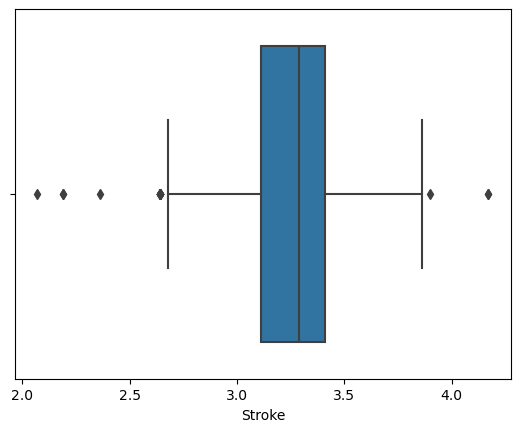

In [98]:
sns.boxplot(x=data.Stroke) # draw boxplot for Stroke column

In [99]:
data.loc[data["Stroke"]>3.8,"Stroke"]=np.median(data.Stroke)# Here we handle the outliers of Stroke column with the help of median of upper bound

In [100]:
data.loc[data["Stroke"]<2.8,"Stroke"]=np.median(data.Stroke)# Here we handle the outliers of Stroke column with the help of median of lower bound

<Axes: xlabel='Stroke'>

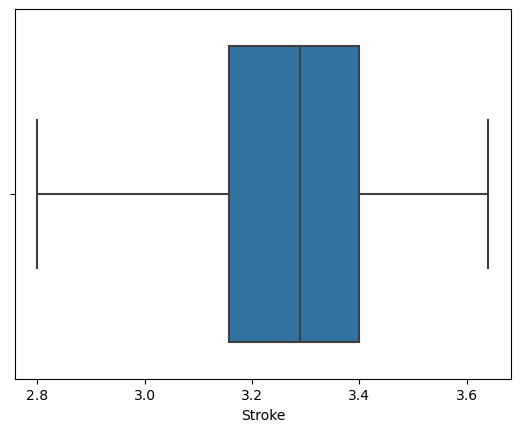

In [101]:
sns.boxplot(x=data.Stroke) # draw boxplot for Stroke column

<Axes: xlabel='compression_ratio'>

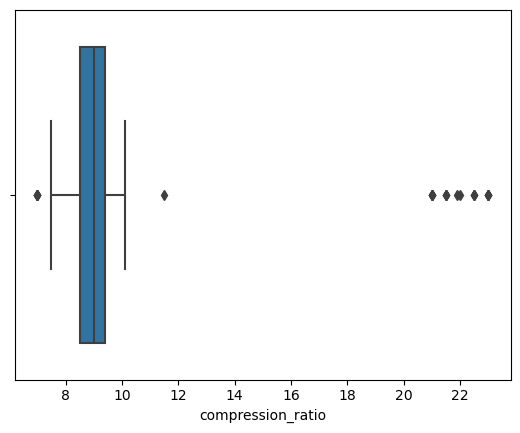

In [102]:
sns.boxplot(x=data.compression_ratio) # draw boxplot for compression_ratio column

In [103]:
data.loc[data["compression_ratio"]>9.8,"compression_ratio"]=np.median(data.compression_ratio)# Here we handle the outliers of compression_ratio column with the help of median of upper bound

In [104]:
data.loc[data["compression_ratio"]<8.6,"compression_ratio"]=np.median(data.compression_ratio)# Here we handle the outliers of compression_ratio column with the help of median of lower bound

<Axes: xlabel='compression_ratio'>

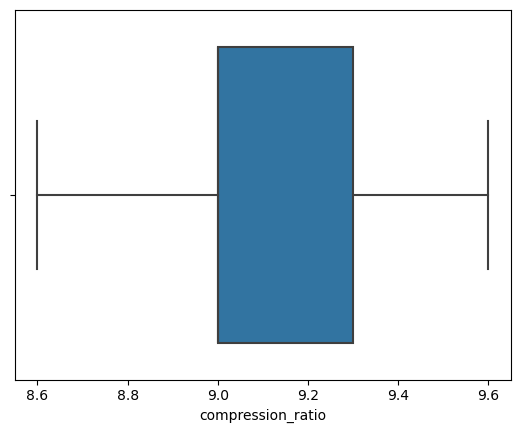

In [105]:
sns.boxplot(x=data.compression_ratio)  # draw boxplot for compression_ratio column

<Axes: xlabel='horse_power'>

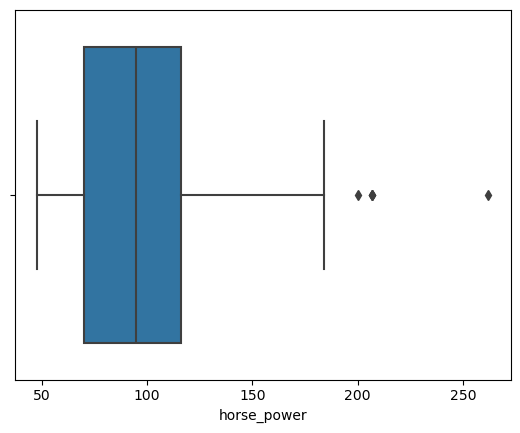

In [106]:
sns.boxplot(x=data.horse_power) # draw boxplot for horse_power column

In [107]:
data.loc[data["horse_power"]>190,"horse_power"]=np.median(data.horse_power)# Here we handle the outliers of horse_power column with the help of median

<Axes: xlabel='horse_power'>

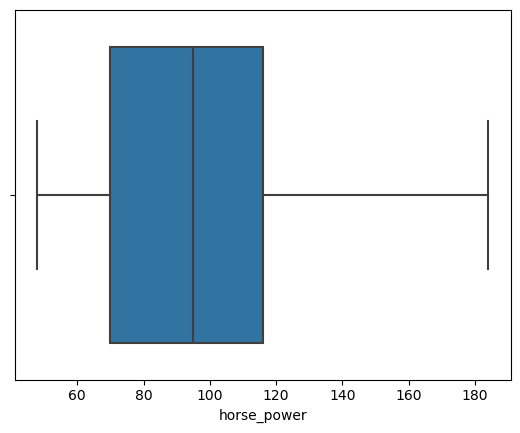

In [108]:
sns.boxplot(x=data.horse_power) # draw boxplot for horse_power column

<Axes: xlabel='Perk_rpm'>

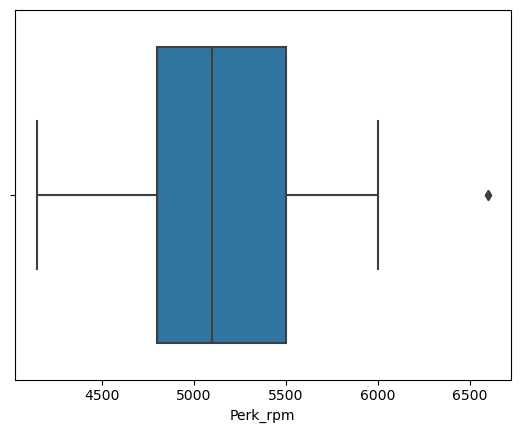

In [109]:
sns.boxplot(x=data.Perk_rpm) # draw boxplot for Perk_rpm column

In [110]:
data.loc[data["Perk_rpm"]>6500,"Perk_rpm"]=np.median(data.Perk_rpm)# Here we handle the outliers of Perk_rpm column with the help of median

<Axes: xlabel='Perk_rpm'>

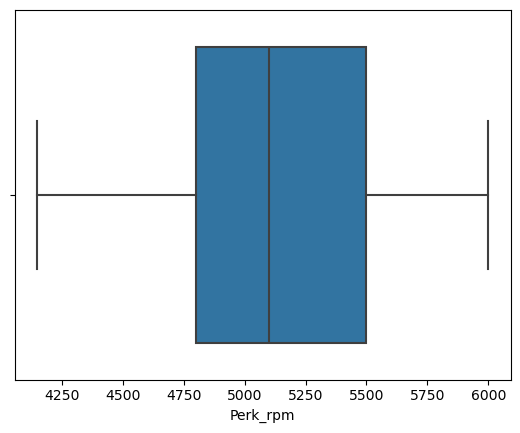

In [111]:
sns.boxplot(x=data.Perk_rpm) # draw boxplot for Perk_rpm column

<Axes: xlabel='City_mpg'>

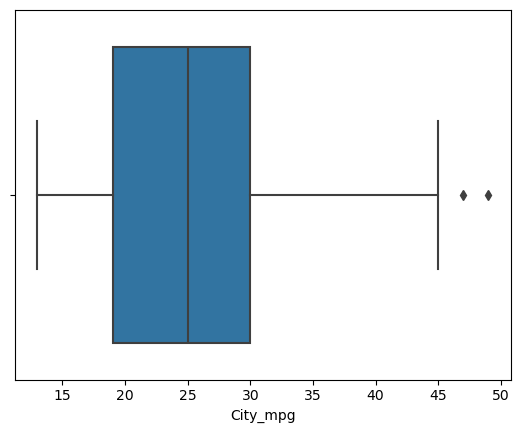

In [112]:
sns.boxplot(x=data.City_mpg) # draw boxplot for City_mpg column

In [113]:
data.loc[data["City_mpg"]>45,"City_mpg"]=np.median(data.City_mpg)# Here we handle the outliers of City_mpg column with the help of median

<Axes: xlabel='City_mpg'>

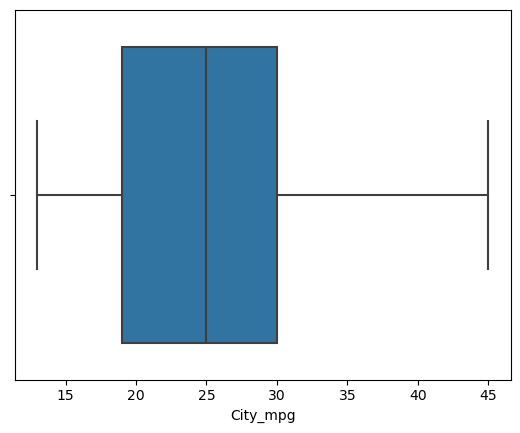

In [114]:
sns.boxplot(x=data.City_mpg) # draw boxplot for City_mpg column

<Axes: xlabel='Highway_mpg'>

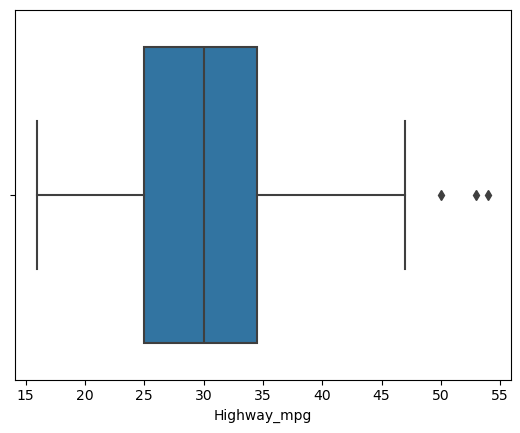

In [115]:
sns.boxplot(x=data.Highway_mpg) # draw boxplot for Highway_mpg column

In [116]:
data.loc[data["Highway_mpg"]>47,"Highway_mpg"]=np.median(data.Highway_mpg)# Here we handle the outliers of Highway_mpg column with the help of median

<Axes: xlabel='Highway_mpg'>

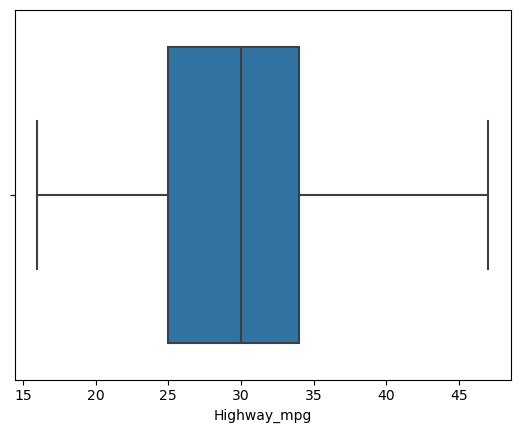

In [117]:
sns.boxplot(x=data.Highway_mpg) # draw boxplot for Highway_mpg column

* Here we get Sucessfully Remove all outliers in every single column.

### Encoding :-

* So basically we have some columns which has data into categorical. So, we have to change that into numerical. Because our machine don't understand categorical data.
  
* To convert categorical data into numerical we have some technique which are,

**There are three types:-** 
1. Label Encoder
2. Ordinal Encoder
3. One Hot Encoder

* Here we apply labelencoder to convert categiorcal data into numerical which follows alphbatical order to convert the data.

In [118]:
from sklearn.preprocessing import LabelEncoder # import LabelEncoder
LE = LabelEncoder() # Store the label Encoder in variable

In [119]:
data["car_name"]=LE.fit_transform(data["car_name"]) # Here we apply LabelEncoder on requried columns
data["car_body_type"]=LE.fit_transform(data["car_body_type"]) # Here we apply LabelEncoder on requried columns
data["engine_type"]=LE.fit_transform(data["engine_type"]) # Here we apply LabelEncoder on requried columns
data["number_of_cylinder"]=LE.fit_transform(data["number_of_cylinder"]) # Here we apply LabelEncoder on requried columns
data["fuel_system"]=LE.fit_transform(data["fuel_system"]) # Here we apply LabelEncoder on requried columns

* Here we gone apply "get dummies" to get convert data in numerical because following data set follows order.

In [120]:
df = pd.get_dummies(data[["fuel_type","induction_type","car_door","wheel_drive","engine_location"]],dtype=int) # use get dummies to have a dummies columns of categiorcal data into numerical 

In [121]:
data1 = pd.concat([data,df],axis=1) # we join the column of data set and created by get dummies 
data1 # here we store the converted data in data1 variable

,risk_factor,car_name,fuel_type,induction_type,car_door,car_body_type,wheel_drive,engine_location,wheel_base,length,width,Heigth,curb_weigth,engine_type,number_of_cylinder,engine_size,fuel_system,bore_diameter,Stroke,compression_ratio,horse_power,Perk_rpm,City_mpg,Highway_mpg,Price,fuel_type_diesel,fuel_type_gas,induction_type_std,induction_type_turbo,car_door_four,car_door_two,wheel_drive_4wd,wheel_drive_fwd,wheel_drive_rwd,engine_location_front,engine_location_rear
0,3,0,gas,std,two,0,rwd,front,88.6,168.8,64.1,48.8,2548,0,2,130,4,3.47,3.29,9.0,111.0,5000.0,21,27,16500,0,1,1,0,0,1,0,0,1,1,0
1,1,0,gas,std,two,2,rwd,front,94.5,171.2,65.5,52.4,2823,4,3,152,4,2.68,3.47,9.0,154.0,5000.0,19,26,16500,0,1,1,0,0,1,0,0,1,1,0
2,2,1,gas,std,four,3,fwd,front,99.8,176.6,66.2,54.3,2337,2,2,109,4,3.19,3.40,9.0,102.0,5500.0,24,30,13950,0,1,1,0,1,0,0,1,0,1,0
3,2,1,gas,std,four,3,4wd,front,99.4,176.6,66.4,54.3,2824,2,1,136,4,3.19,3.40,9.0,115.0,5500.0,18,22,17450,0,1,1,0,1,0,1,0,0,1,0
4,2,1,gas,std,two,3,fwd,front,99.8,177.3,66.3,53.1,2507,2,1,136,4,3.19,3.40,9.0,110.0,5500.0,19,25,15250,0,1,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,20,gas,std,four,3,rwd,front,109.1,188.8,68.9,55.5,2952,2,2,141,4,3.78,3.15,9.5,114.0,5400.0,23,28,16845,0,1,1,0,1,0,0,0,1,1,0
196,-1,20,gas,turbo,four,3,rwd,front,109.1,188.8,68.8,55.5,3049,2,2,141,4,3.78,3.15,8.7,160.0,5300.0,19,25,19045,0,1,0,1,1,0,0,0,1,1,0
197,-1,20,gas,std,four,3,rwd,front,109.1,188.8,68.9,55.5,3012,4,3,173,4,3.58,2.87,8.8,134.0,5500.0,18,23,21485,0,1,1,0,1,0,0,0,1,1,0
198,-1,20,diesel,turbo,four,3,rwd,front,109.1,188.8,68.9,55.5,3217,2,3,145,2,3.01,3.40,9.0,106.0,4800.0,26,27,22470,1,0,0,1,1,0,0,0,1,1,0


In [122]:
data2 = data1.drop(["fuel_type","induction_type","car_door","wheel_drive","engine_location"],axis=1) # we drop the column the after use of get dummies
data2 # here we have our final data set after all cleaning and preprocessing of data

,risk_factor,car_name,car_body_type,wheel_base,length,width,Heigth,curb_weigth,engine_type,number_of_cylinder,engine_size,fuel_system,bore_diameter,Stroke,compression_ratio,horse_power,Perk_rpm,City_mpg,Highway_mpg,Price,fuel_type_diesel,fuel_type_gas,induction_type_std,induction_type_turbo,car_door_four,car_door_two,wheel_drive_4wd,wheel_drive_fwd,wheel_drive_rwd,engine_location_front,engine_location_rear
0,3,0,0,88.6,168.8,64.1,48.8,2548,0,2,130,4,3.47,3.29,9.0,111.0,5000.0,21,27,16500,0,1,1,0,0,1,0,0,1,1,0
1,1,0,2,94.5,171.2,65.5,52.4,2823,4,3,152,4,2.68,3.47,9.0,154.0,5000.0,19,26,16500,0,1,1,0,0,1,0,0,1,1,0
2,2,1,3,99.8,176.6,66.2,54.3,2337,2,2,109,4,3.19,3.40,9.0,102.0,5500.0,24,30,13950,0,1,1,0,1,0,0,1,0,1,0
3,2,1,3,99.4,176.6,66.4,54.3,2824,2,1,136,4,3.19,3.40,9.0,115.0,5500.0,18,22,17450,0,1,1,0,1,0,1,0,0,1,0
4,2,1,3,99.8,177.3,66.3,53.1,2507,2,1,136,4,3.19,3.40,9.0,110.0,5500.0,19,25,15250,0,1,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,20,3,109.1,188.8,68.9,55.5,2952,2,2,141,4,3.78,3.15,9.5,114.0,5400.0,23,28,16845,0,1,1,0,1,0,0,0,1,1,0
196,-1,20,3,109.1,188.8,68.8,55.5,3049,2,2,141,4,3.78,3.15,8.7,160.0,5300.0,19,25,19045,0,1,0,1,1,0,0,0,1,1,0
197,-1,20,3,109.1,188.8,68.9,55.5,3012,4,3,173,4,3.58,2.87,8.8,134.0,5500.0,18,23,21485,0,1,1,0,1,0,0,0,1,1,0
198,-1,20,3,109.1,188.8,68.9,55.5,3217,2,3,145,2,3.01,3.40,9.0,106.0,4800.0,26,27,22470,1,0,0,1,1,0,0,0,1,1,0


* Here we convert categorical column in numerical on the basis of their data variability.

## Feature Selection

* It is the process of identifying and selecting a subset of relevant features (variables, predictors) from a larger set of available features in a dataset. The goal of feature selection is to improve the performance of machine learning models by retaining only the most important and informative features, while eliminating redundant or irrelevant ones.

In [1]:
plt.figure(figsize=(25,30)) # define the figure size
sns.heatmap(data2.corr(),annot=True) # here we create a heatmap to find corealtion between columns

NameError: name 'plt' is not defined

* Here we check the corealation between columns and then columns.
* If we have corealation more then 90% we remove that particular column.
* Here we do not have any single column having corealation more then 90% so we dont have to drop any column.

## Model Selection

In [124]:
x = data2.drop("Price",axis=1) # we drop price column to store it in another variable  
y = data2.Price # here we store price column in y variable 

In [125]:
x # this shows us input data point columns 

,risk_factor,car_name,car_body_type,wheel_base,length,width,Heigth,curb_weigth,engine_type,number_of_cylinder,engine_size,fuel_system,bore_diameter,Stroke,compression_ratio,horse_power,Perk_rpm,City_mpg,Highway_mpg,fuel_type_diesel,fuel_type_gas,induction_type_std,induction_type_turbo,car_door_four,car_door_two,wheel_drive_4wd,wheel_drive_fwd,wheel_drive_rwd,engine_location_front,engine_location_rear
0,3,0,0,88.6,168.8,64.1,48.8,2548,0,2,130,4,3.47,3.29,9.0,111.0,5000.0,21,27,0,1,1,0,0,1,0,0,1,1,0
1,1,0,2,94.5,171.2,65.5,52.4,2823,4,3,152,4,2.68,3.47,9.0,154.0,5000.0,19,26,0,1,1,0,0,1,0,0,1,1,0
2,2,1,3,99.8,176.6,66.2,54.3,2337,2,2,109,4,3.19,3.40,9.0,102.0,5500.0,24,30,0,1,1,0,1,0,0,1,0,1,0
3,2,1,3,99.4,176.6,66.4,54.3,2824,2,1,136,4,3.19,3.40,9.0,115.0,5500.0,18,22,0,1,1,0,1,0,1,0,0,1,0
4,2,1,3,99.8,177.3,66.3,53.1,2507,2,1,136,4,3.19,3.40,9.0,110.0,5500.0,19,25,0,1,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,20,3,109.1,188.8,68.9,55.5,2952,2,2,141,4,3.78,3.15,9.5,114.0,5400.0,23,28,0,1,1,0,1,0,0,0,1,1,0
196,-1,20,3,109.1,188.8,68.8,55.5,3049,2,2,141,4,3.78,3.15,8.7,160.0,5300.0,19,25,0,1,0,1,1,0,0,0,1,1,0
197,-1,20,3,109.1,188.8,68.9,55.5,3012,4,3,173,4,3.58,2.87,8.8,134.0,5500.0,18,23,0,1,1,0,1,0,0,0,1,1,0
198,-1,20,3,109.1,188.8,68.9,55.5,3217,2,3,145,2,3.01,3.40,9.0,106.0,4800.0,26,27,1,0,0,1,1,0,0,0,1,1,0


In [126]:
y # this is our output column 

0      16500
1      16500
2      13950
3      17450
4      15250
       ...  
195    16845
196    19045
197    21485
198    22470
199    22625
Name: Price, Length: 192, dtype: int64

In [127]:
col = x.columns

In [128]:
col

Index(['risk_factor', 'car_name', 'car_body_type', 'wheel_base', 'length',
       'width', 'Heigth', 'curb_weigth', 'engine_type', 'number_of_cylinder',
       'engine_size', 'fuel_system', 'bore_diameter', 'Stroke',
       'compression_ratio', 'horse_power', 'Perk_rpm', 'City_mpg',
       'Highway_mpg', 'fuel_type_diesel', 'fuel_type_gas',
       'induction_type_std', 'induction_type_turbo', 'car_door_four',
       'car_door_two', 'wheel_drive_4wd', 'wheel_drive_fwd', 'wheel_drive_rwd',
       'engine_location_front', 'engine_location_rear'],
      dtype='object')

In [129]:
# We apply min-max sacling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [130]:
x = scaler.fit_transform(x) # used for transform the data

In [131]:
x = pd.DataFrame(x,columns=col) # used for convert dataframe

In [132]:
x.head() # showning the first 5 data

,risk_factor,car_name,car_body_type,wheel_base,length,width,Heigth,curb_weigth,engine_type,number_of_cylinder,engine_size,fuel_system,bore_diameter,Stroke,compression_ratio,horse_power,Perk_rpm,City_mpg,Highway_mpg,fuel_type_diesel,fuel_type_gas,induction_type_std,induction_type_turbo,car_door_four,car_door_two,wheel_drive_4wd,wheel_drive_fwd,wheel_drive_rwd,engine_location_front,engine_location_rear
0,1.0,0.00,0.00,0.072464,0.413433,0.294872,0.083333,0.411171,0.0,0.4,0.518797,0.666667,0.664286,0.583333,0.4,0.463235,0.459459,0.25000,0.354839,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.6,0.00,0.50,0.286232,0.449254,0.474359,0.383333,0.517843,1.0,0.6,0.684211,0.666667,0.100000,0.797619,0.4,0.779412,0.459459,0.18750,0.322581,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.8,0.05,0.75,0.478261,0.529851,0.564103,0.541667,0.329325,0.5,0.4,0.360902,0.666667,0.464286,0.714286,0.4,0.397059,0.729730,0.34375,0.451613,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.8,0.05,0.75,0.463768,0.529851,0.589744,0.541667,0.518231,0.5,0.2,0.563910,0.666667,0.464286,0.714286,0.4,0.492647,0.729730,0.15625,0.193548,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.8,0.05,0.75,0.478261,0.540299,0.576923,0.441667,0.395268,0.5,0.2,0.563910,0.666667,0.464286,0.714286,0.4,0.455882,0.729730,0.18750,0.290323,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [133]:
from sklearn.model_selection import train_test_split # we import train test split to split data in training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=40) # here we split data in 80 to 20 training testing and have random state is 40 

In [134]:
x_train # check the spliting trainig data

,risk_factor,car_name,car_body_type,wheel_base,length,width,Heigth,curb_weigth,engine_type,number_of_cylinder,engine_size,fuel_system,bore_diameter,Stroke,compression_ratio,horse_power,Perk_rpm,City_mpg,Highway_mpg,fuel_type_diesel,fuel_type_gas,induction_type_std,induction_type_turbo,car_door_four,car_door_two,wheel_drive_4wd,wheel_drive_fwd,wheel_drive_rwd,engine_location_front,engine_location_rear
145,0.4,0.90,0.75,0.329710,0.376119,0.333333,0.433333,0.305275,0.5,0.4,0.368421,0.333333,0.521429,0.654762,0.4,0.058824,0.189189,0.65625,0.645161,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
86,0.6,0.60,0.75,0.286232,0.361194,0.256410,0.558333,0.187355,0.5,0.4,0.270677,0.166667,0.435714,0.583333,0.8,0.154412,0.567568,0.56250,0.677419,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
176,1.0,0.95,0.00,0.286232,0.271642,0.307692,0.650000,0.297130,0.5,0.4,0.360902,0.666667,0.464286,0.714286,0.4,0.308824,0.729730,0.34375,0.419355,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
69,0.6,0.55,0.50,0.231884,0.241791,0.256410,0.250000,0.254849,0.5,0.4,0.278195,0.833333,0.350000,0.702381,0.4,0.397059,0.729730,0.34375,0.451613,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
123,1.0,0.80,0.50,0.452899,0.679104,0.602564,0.691667,0.512025,0.0,0.4,0.451128,0.666667,0.714286,0.321429,0.4,0.823529,0.729730,0.18750,0.322581,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,0.6,0.40,0.50,0.442029,0.547761,0.602564,0.491667,0.347944,0.5,0.4,0.458647,0.166667,0.607143,0.702381,0.0,0.264706,0.351351,0.40625,0.516129,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
184,0.2,1.00,1.00,0.641304,0.711940,0.692308,0.808333,0.602793,0.5,0.4,0.601504,0.666667,0.885714,0.416667,0.9,0.485294,0.675676,0.34375,0.387097,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
165,1.0,0.90,0.50,0.590580,0.632836,0.756410,0.350000,0.577192,0.0,0.6,0.827068,0.666667,0.521429,0.654762,0.7,0.830882,0.567568,0.21875,0.258065,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
7,0.6,0.05,0.75,0.695652,0.770149,0.467949,0.675000,0.619860,0.5,0.2,0.526316,0.666667,0.421429,0.714286,0.4,0.676471,0.729730,0.12500,0.129032,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [135]:
x_test # check the spliting testing data

,risk_factor,car_name,car_body_type,wheel_base,length,width,Heigth,curb_weigth,engine_type,number_of_cylinder,engine_size,fuel_system,bore_diameter,Stroke,compression_ratio,horse_power,Perk_rpm,City_mpg,Highway_mpg,fuel_type_diesel,fuel_type_gas,induction_type_std,induction_type_turbo,car_door_four,car_door_two,wheel_drive_4wd,wheel_drive_fwd,wheel_drive_rwd,engine_location_front,engine_location_rear
96,0.6,0.60,0.50,0.456522,0.558209,0.782051,0.158333,0.640419,1.00,0.6,0.902256,0.666667,0.635714,0.559524,0.4,0.823529,0.567568,0.18750,0.290323,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
5,0.6,0.05,0.75,0.695652,0.770149,0.467949,0.658333,0.525989,0.50,0.2,0.563910,0.666667,0.464286,0.714286,0.4,0.455882,0.729730,0.18750,0.290323,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
116,1.0,0.75,0.25,0.105072,0.414925,0.410256,0.316667,0.491854,0.75,0.6,1.000000,0.666667,0.857143,0.119048,0.9,0.345588,0.945946,0.12500,0.290323,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
35,0.4,0.25,0.50,0.358696,0.394030,0.435897,0.458333,0.310706,0.50,0.4,0.368421,0.000000,0.435714,0.928571,0.4,0.279412,0.891892,0.43750,0.548387,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
175,0.8,0.95,0.75,0.387681,0.456716,0.474359,0.658333,0.314973,0.50,0.4,0.360902,0.666667,0.464286,0.714286,0.4,0.382353,0.729730,0.40625,0.516129,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
157,0.8,0.90,0.25,0.427536,0.523881,0.487179,0.350000,0.461986,0.50,0.4,0.639098,0.666667,0.771429,0.833333,0.7,0.500000,0.351351,0.34375,0.451613,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
54,0.4,0.40,0.50,0.442029,0.547761,0.602564,0.641667,0.363460,0.50,0.4,0.458647,0.166667,0.607143,0.702381,0.0,0.264706,0.351351,0.40625,0.516129,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
132,0.4,0.85,0.75,0.376812,0.461194,0.461538,0.541667,0.396431,0.75,0.4,0.353383,0.666667,0.771429,0.583333,0.4,0.463235,0.351351,0.34375,0.419355,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
90,0.4,0.60,0.75,0.384058,0.482090,0.435897,0.575000,0.315749,0.50,0.4,0.443609,0.166667,0.564286,0.797619,0.4,0.360294,0.567568,0.43750,0.580645,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
188,0.2,1.00,0.75,0.815217,0.711940,0.897436,0.641667,0.605508,0.50,0.4,0.601504,0.666667,0.885714,0.416667,0.1,0.823529,0.621622,0.18750,0.290323,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [136]:
y_train # check the spliting trainig data of output column

153     7898
92      7499
184    11595
75      7689
131    18150
       ...  
55      8845
192    16515
173    16558
7      23875
76      9959
Name: Price, Length: 153, dtype: int64

In [137]:
y_test # check the spliting testing data of output column 

102    18399
5      17710
122    32528
36      9095
183     9995
165    11199
60     11245
140    11259
96      9549
196    19045
145     5348
148     6918
180     8195
27     12964
95      8949
146     6338
161     9538
23      6692
138     9960
38     10295
157     9258
29      6855
91      7799
99     13499
137     7775
81      6989
18      6575
111    16630
128    12170
134     7053
34      7295
47      6095
172    11248
169    10698
11     21105
170     9988
87      6649
117     6692
73      6189
Name: Price, dtype: int64

# Model Creation 

## Linear Regression

In [138]:
# use for linear regression model of continous data problem
from sklearn.linear_model import LinearRegression # import linear regression model
LR = LinearRegression() # here we store model in LR variable
LR.fit(x_train,y_train) # train the model

LinearRegression()

In [139]:
y_lr = LR.predict(x_test) # predict the test data 

In [140]:
y_lr # here we have predicting test data

array([22221.56851027, 18937.24342227, 34746.79456632, 10755.39942375,
        7107.98626   , 13711.05640075, 10447.55977632, 11202.19322427,
        8840.1115631 , 18413.06483614,  3829.62335905,  5423.0313252 ,
        4983.06522941, 16664.18507333, 10236.93376931,  5330.80999318,
       11296.80659994,  7524.65171075, 10485.79322149, 11949.64981185,
        6810.50658124,  4522.05703391,  7608.40999209, 19612.18500507,
        9834.21582755,  9182.22572787,  6718.61753551, 16653.55362575,
       15463.04293547,  6548.14660647,  4986.46091077,  6431.36146918,
        8342.32998196, 12707.34882591, 15956.62923877,  8011.15265967,
        5285.5672922 ,  6764.41552326,  6430.49852296])

In [141]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score # import linear regression metrics

In [284]:
r1=r2_score(y_test,y_lr) # check the model performance
r1

0.8159828495469527

In [143]:
mse_1=mean_squared_error(y_test,y_lr) 
mse_1 # checking mean squared error of model

5058384.5601865

In [144]:
mae_1=mean_absolute_error(y_test,y_lr) # check the absolute error
mae_1 # checking mean absolute error of model

1773.8420934570388

In [145]:
y_trlr = LR.predict(x_train) # predict the training data

In [146]:
r2_score(y_train,y_trlr) # checking model performance

0.9083602159116889

In [147]:
error1 = y_test - y_lr # check the error value
error1

102   -3822.568510
5     -1227.243422
122   -2218.794566
36    -1660.399424
183    2887.013740
165   -2512.056401
60      797.440224
140      56.806776
96      708.888437
196     631.935164
145    1518.376641
148    1494.968675
180    3211.934771
27    -3700.185073
95    -1287.933769
146    1007.190007
161   -1758.806600
23     -832.651711
138    -525.793221
38    -1654.649812
157    2447.493419
29     2332.942966
91      190.590008
99    -6113.185005
137   -2059.215828
81    -2193.225728
18     -143.617536
111     -23.553626
128   -3293.042935
134     504.853394
34     2308.539089
47     -336.361469
172    2905.670018
169   -2009.348826
11     5148.370761
170    1976.847340
87     1363.432708
117     -72.415523
73     -241.498523
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

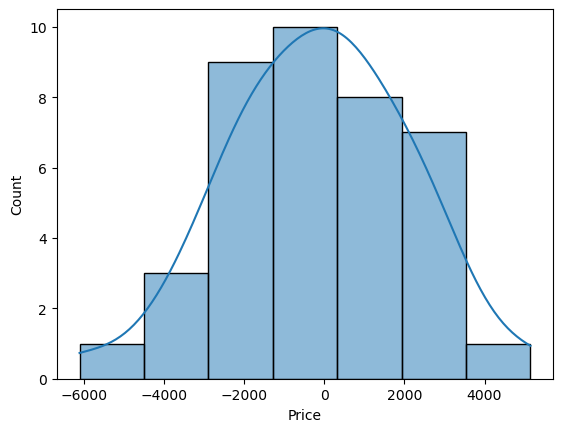

In [148]:
sns.histplot(x=error1,kde=True) # check the erroe value in graphical representation

#### Insights:-

* Here we can see the linear Regression model show the overfitting model.
* Error show us sightly Normal Distribution.
* Linear Regression Model r2_score is 0.815.

## SVM :- Support Vectore Machine

In [149]:
from sklearn.svm import SVR  #  import the svr model
SVM = SVR() # call the svr model
SVM.fit(x_train,y_train) # here we train the model

SVR()

In [150]:
y_svm = SVM.predict(x_test) # predict the test data

In [285]:
r2=r2_score(y_test,y_svm) # check the model performance
r2

-0.0014475653902117358

In [152]:
mse_2 = mean_squared_error(y_test,y_svm)
mse_2 # checking mean squared error of model

27528449.87619098

In [153]:
mae_2=mean_absolute_error(y_test,y_svm) 
mae_2 # checking mean absolute error of model

3725.332887767799

In [154]:
y_trsvm = SVM.predict(x_train) # predict the traning data 

In [155]:
r2_score(y_train,y_trsvm) # model performance

-0.11405454198493015

In [156]:
error2 = y_test - y_svm
error2 # check error of the model

102     7345.825878
5       6672.232738
122    21479.522369
36     -1928.196419
183    -1034.287594
165      150.871317
60       216.763717
140      212.657244
96     -1476.012691
196     7985.573540
145    -5672.144049
148    -4106.127376
180    -2832.858147
27      1921.666842
95     -2076.106062
146    -4682.370036
161    -1505.998436
23     -4329.272827
138    -1069.103194
38      -729.950362
157    -1764.427899
29     -4165.799255
91     -3220.170978
99      2458.382999
137    -3250.924923
81     -4035.893184
18     -4447.290412
111     5572.416650
128     1134.833447
134    -3971.571139
34     -3729.650770
47     -4924.030309
172      215.969962
169     -344.690997
11     10051.303215
170    -1043.956765
87     -4370.259799
117    -4328.526104
73     -4830.342978
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

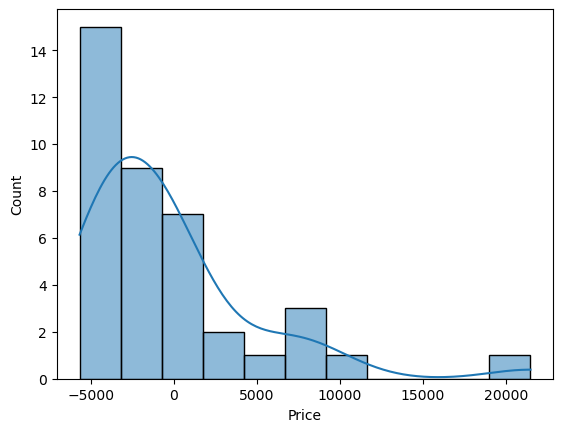

In [157]:
sns.histplot(x=error2,kde=True) # plot of error of model

#### Conclusion:-

* Here we can see the Support Vectore Machine is overfitting model based on test r2_score is 0.8135 and training r2_score is 0.90 .
* Error also not show the Normal Distribution.

## Decision Tree

In [158]:
from sklearn.tree import DecisionTreeRegressor # import the Decision tree regression
DT = DecisionTreeRegressor() # call the DT model
DT.fit(x_train,y_train) # here we train the model

DecisionTreeRegressor()

In [159]:
y_dt = DT.predict(x_test) # predict the test data

In [280]:
r2_score(y_test,y_dt) # check performance of model

0.9174492237262148

In [161]:
mse_3 = mean_squared_error(y_test,y_dt)
mse_3 # checking mean squared error of model

2269210.076923077

In [162]:
mae_3=mean_absolute_error(y_test,y_dt) # check absoulte error of the model
mae_3

1113.3589743589744

In [163]:
y_trdt = DT.predict(x_train) # predict the training data

In [164]:
r2_score(y_train,y_trdt) # check performance of the model

0.9991878769995953

In [165]:
error3 = y_test - y_dt
error3 # checking the error of the model

102    1200.0
5     -1210.0
122   -1500.0
36     1200.0
183    -203.0
165    -350.0
60     1875.0
140    1980.0
96     -649.0
196   -3580.0
145   -1140.0
148    -980.0
180     220.0
27    -3536.0
95    -1249.0
146    -150.0
161     240.0
23     -917.0
138    -238.0
38     1374.0
157    1200.0
29      478.0
91      500.0
99     -900.0
137    -283.0
81    -1200.0
18      280.0
111    4730.0
128   -2870.0
134   -1305.0
34     -314.0
47     -700.0
172     350.0
169    1328.0
11      135.0
170    -910.0
87     1150.0
117    -657.0
73     -340.0
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

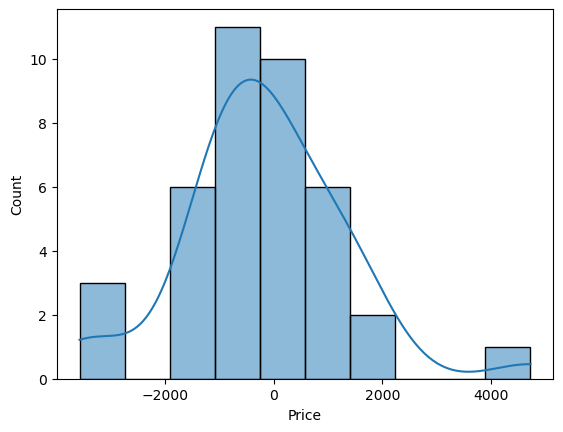

In [166]:
sns.histplot(x=error3,kde=True) # # plot of error of model

#### Insights:-

* Here we can see the Descision Tree Algorithm is overfitting Model based on test r2_score is 0.91 and training r2_score is 0.99
* Error also do not show the Normal Distribution.
* Descision Tree Model r2_score is 0819 after that we required the Hyperparamter Model use.

## Hyperparameter of decision tree

In [170]:
from sklearn.model_selection import RandomizedSearchCV # import Grid Search CV for hyper-parameter tuning

In [171]:
# Define hyperparameter grid
param_gridDTR = {
    'criterion': ['squared_error', 'absolute_error'],  # Function to measure the quality of a split
    'splitter': ['best', 'random'],  # Strategy used to split at each node
    'max_depth': [10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [1,2, 5],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4,5],  # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'max_leaf_nodes': [10, 20, 30, 50],  # Maximum number of leaf nodes in the tree
}

In [172]:
#  Random search on DTR with 5-fold cross-validation and 100 iterations, using R2 score
DT_grid = RandomizedSearchCV(estimator=DT,param_distributions=param_gridDTR, cv=5, scoring='r2', verbose=2, n_jobs=-1,n_iter=100,random_state=21)

In [173]:
DT_grid.fit(x_train,y_train) # train model

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': [10, 20, 30, 50],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [1, 2, 5],
                                        'splitter': ['best', 'random']},
                   random_state=21, scoring='r2', verbose=2)

In [174]:
y_hypDT = DT_grid.predict(x_test) #predict testing data

In [175]:
r3=r2_score(y_test,y_hypDT)# check model performance for testing data
r3

0.8590506357499157

In [176]:
y_trainhypDT = DT_grid.predict(x_train)# predict the training data

In [177]:
r2_score(y_train,y_trainhypDT) # check model performance for training data

0.9664530900789761

In [178]:
ErrorDT= y_test - y_hypDT# check the error 

In [179]:
ErrorDT

102    1899.0
5      -910.0
122   -3000.0
36      881.5
183   -3955.0
165    1400.0
60      825.0
140   -3140.0
96    -4401.0
196   -3502.5
145   -1447.0
148   -1295.5
180     -18.5
27    -1435.0
95    -5001.0
146    -457.0
161     240.0
23     -603.0
138    1746.5
38     2081.5
157    1044.5
29     1283.0
91      504.0
99     -900.0
137     480.0
81    -1224.5
18     1003.0
111     130.0
128   -2229.0
134   -1160.5
34        0.0
47     -700.0
172     828.0
169     278.0
11     4605.0
170    -432.0
87     1077.0
117    -603.0
73    -1106.0
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

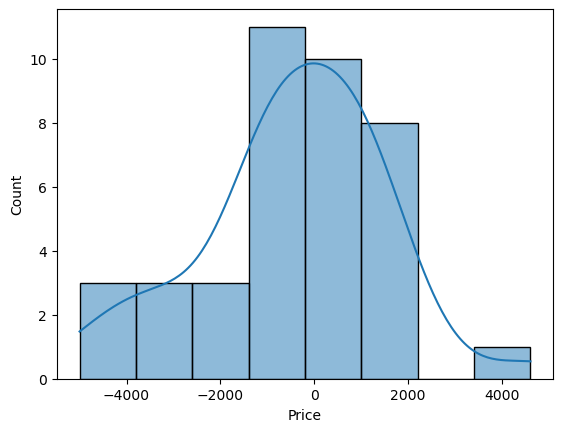

In [181]:
sns.histplot(ErrorDT,kde=True) # show error on graph

#### Insights:-

* Here we can see the Descision Tree Algorithm is overfitting Model based on test r2_score is 0.89 and training r2_score is 0.99.
* Error also do not show the Normal Distribution.
* Descision Tree Model r2_score is 0.89 after that we required the Hyperparamter Model use.

## K-Nearest Neighbors (KNN)

In [182]:
from sklearn.neighbors import KNeighborsRegressor # Import KNN call
KNN = KNeighborsRegressor() # call the KNN Algorithm
KNN.fit(x_train,y_train) # train the model

KNeighborsRegressor()

In [183]:
y_preKNN = KNN.predict(x_test) # predict the testing data

In [184]:
r2_score(y_test,y_preKNN) # check the model Performance for testing data

0.8476163431415504

In [185]:
y_trainKNN = KNN.predict(x_train) # predict the training data

In [186]:
r2_score(y_train,y_trainKNN)  # check model performance for training data

0.8233675234189898

#### Now apply Hyper-parameter Tuning

In [187]:
# Define param grid
param_gridKNN = {
    'n_neighbors': [1,3, 5, 7],            # Number of neighbors to use for prediction
    'weights': ['uniform', 'distance'],          # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [10, 20, 30],          # Leaf size passed to the underlying tree-based algorithms
    'p': [1, 2]                                  # Power parameter for the Minkowski distance (1 for Manhattan, 2 for Euclidean)
}


In [188]:
#  Random search on KNN with 5-fold cross-validation and 100 iterations, using R2 score

KNN_grid = RandomizedSearchCV(estimator=KNN,param_distributions=param_gridKNN,cv=5, scoring='r2', verbose=2, n_jobs=-1,n_iter=100,random_state=21)

In [189]:
KNN_grid.fit(x_train,y_train) #train the model

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [10, 20, 30],
                                        'n_neighbors': [1, 3, 5, 7],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=21, scoring='r2', verbose=2)

In [190]:
y_hypKNN = KNN_grid.predict(x_test) # predict the testing data

In [191]:
r4=r2_score(y_test,y_hypKNN) # check model performance for testing data
r4

0.9453532401309352

In [192]:
y_trainhypKNN = KNN_grid.predict(x_train) # predict the training data

In [193]:
r2_score(y_train,y_trainhypKNN) # check model performance for training data

0.9991878769995953

In [194]:
ErrorKNN =   y_test - y_hypKNN # check the error 

In [195]:
ErrorKNN

102    1555.538375
5        72.298485
122   -1500.000000
36     1173.600200
183     -28.041761
165    1927.219451
60     1948.561019
140     444.036237
96      613.338948
196   -1143.562329
145    -466.643836
148      47.592193
180    -427.769019
27    -1014.028756
95      -13.143155
146     516.194631
161     447.413471
23     -917.000000
138     634.423660
38      977.053386
157    1776.120233
29      101.888753
91      875.083744
99     -218.293093
137     134.195624
81    -1221.352441
18     -565.606723
111    4135.496281
128   -3246.921393
134    1293.335199
34     -363.202722
47     -687.637448
172    1132.044713
169    -825.627102
11     -843.269041
170    -134.561391
87      295.453789
117    -623.502856
73     -380.014282
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

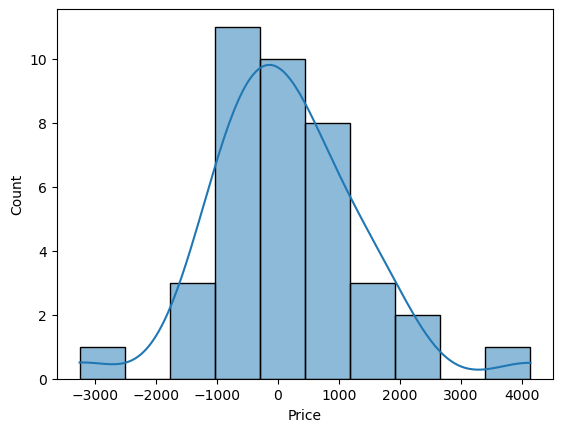

In [196]:
sns.histplot(ErrorKNN,kde=True) # show error on graph

#### Insights:-

* After using hyperparameter tunning in KNN Algorithem we got r2_sccore in teasting period is 0.94 and ]r2_score in tranning period is 0.99 
* Error also do not show the Normal Distribution.
* After using hyperperameter tunning we got generalized model


## Bagging Algorithm

In [197]:
from sklearn.ensemble import BaggingRegressor # import Bagging Algorithm
BG = BaggingRegressor(random_state=20) # call the BG algorithm
BG.fit(x_train,y_train) # train the model

BaggingRegressor(random_state=20)

In [198]:
y_preBG = BG.predict(x_test) # predict the testing data

In [199]:
r2_score(y_test,y_preBG) # check the model performance

0.9432637193950547

In [200]:
y_trainBG = BG.predict(x_train) # predict the training data

In [201]:
r2_score(y_train,y_trainBG) # check model performance for training data

0.9752835419878435

#### Now apply Hyper-parameter Tuning

In [202]:
# Define the parameter grid for BaggingRegressor
param_gridBG = {
    'n_estimators': [100, 200],  # Number of base estimators in the ensemble
    'max_samples': [0.5, 0.75, 1.0],     # Proportion of the dataset to draw to train each base estimator
    'max_features': [0.5, 0.75, 1.0],    # Proportion of features to draw to train each base estimator
    'bootstrap': [True, False],          # Whether to use bootstrap samples when building trees                
}

In [203]:
#  Random search on Bagging with 5-fold cross-validation and 100 iterations, using R2 score

BG_grid = RandomizedSearchCV(estimator=BG,param_distributions=param_gridBG,cv=5,scoring='r2',verbose=2, n_jobs=-1,n_iter=100,random_state=42)

In [204]:
BG_grid.fit(x_train,y_train) #train model

Fitting 5 folds for each of 36 candidates, totalling 180 fits


RandomizedSearchCV(cv=5, estimator=BaggingRegressor(random_state=20),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': [0.5, 0.75, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='r2', verbose=2)

In [205]:
y_hypBG= BG_grid.predict(x_test) # predict the testing data

In [206]:
r5=r2_score(y_test,y_hypBG) # check model performance for testing data
r5

0.9460266402325863

In [207]:
y_trainhypBG = BG_grid.predict(x_train) # predict the training data

In [208]:
r2_score(y_train,y_trainhypBG) # check model performance for training data

0.9937126748076004

In [209]:
ErrorBG = y_test - y_hypBG # check the error 
ErrorBG

102    2026.720000
5     -2393.980000
122    -532.420000
36      954.760000
183     175.000000
165    -411.325000
60     1735.323333
140     681.000000
96     -613.610000
196   -1419.780000
145   -1141.990000
148    -773.530000
180    -219.030000
27    -2810.574167
95    -1240.640000
146    -175.810000
161    -532.880000
23     -574.715833
138     491.226667
38     1201.390000
157    1302.140000
29      490.800000
91      621.316667
99    -1215.480000
137     102.500000
81    -1460.820000
18       10.966667
111    3121.565000
128   -3058.270000
134    -284.186667
34       87.105000
47     -261.640000
172     722.510000
169    -209.170000
11      681.403333
170    -496.550000
87      415.728333
117    -597.580000
73     -194.200000
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

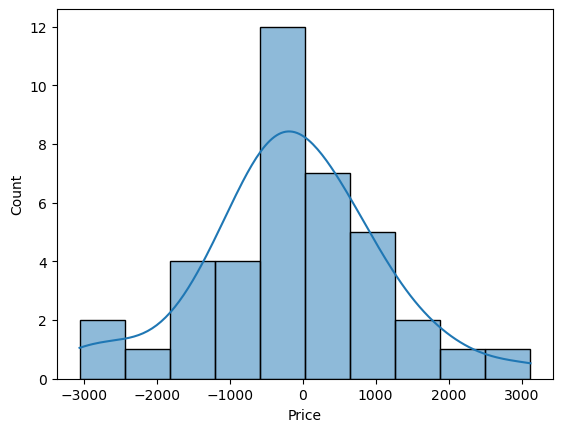

In [210]:
sns.histplot(ErrorBG,kde=True) # show error on graph

#### Insights:-

* After using hyperparameter tunning in Bagging Algorithem we got r2_sccore in teasting period is 0.94 and r2_score in tranning period is 0.99 
* Error also do not show the Normal Distribution.
* After using hyperperameter tunning we got generalized model


## RandomForest Algorithm

In [211]:
from sklearn.ensemble import RandomForestRegressor # import randomforest algorithm
RM = RandomForestRegressor() # store the RM algorithm
RM.fit(x_train,y_train) # train the model

RandomForestRegressor()

In [212]:
y_preRF = RM.predict(x_test) # predict the testning data

In [282]:
r6=r2_score(y_test,y_preRF) # check the model performane
r6

0.9449018253653771

In [216]:
y_trainRF=RM.predict(x_train) # predict the training data

In [217]:
r2_score(y_train,y_trainRF) # check model performance for training data

0.983982797880165

In [227]:
ErrorRF = y_test - y_preRF #check error
ErrorRF

102    1121.200000
5     -1691.570000
122     314.500000
36      678.490000
183     111.225000
165   -1453.360000
60     1740.628333
140     996.410000
96     -113.590000
196   -1223.610000
145   -1284.900000
148    -868.730000
180     -43.030000
27    -3226.520000
95     -755.435000
146    -417.640000
161       2.000000
23     -563.840000
138     580.108333
38     1046.920000
157    1366.980000
29      675.650000
91      368.720000
99    -2441.510000
137     188.270000
81    -1658.008333
18      322.690000
111    3240.390000
128   -2515.880000
134    -141.520000
34       66.770000
47      -89.070000
172     406.766667
169     773.258333
11     1046.280000
170    -853.730000
87      427.070000
117    -655.700000
73     -218.300000
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

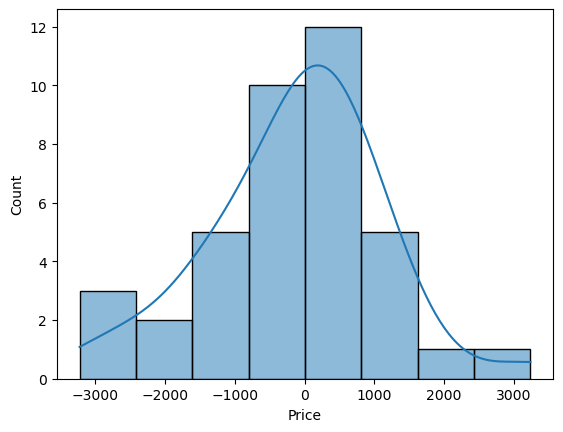

In [228]:
sns.histplot(ErrorRF,kde=True) # show error on graph

#### Insights:-

* Rendom Forest Algorithem we got r2_sccore in teasting period is 0.94 and r2_score in tranning period is 0.98 
* Error also do not show the Normal Distribution.


## Gradiant Boosting Algorithm

In [229]:
from sklearn.ensemble import GradientBoostingRegressor # import the Gradinat boosting Algorithm
GB = GradientBoostingRegressor() # call the Gradinat boosting algorithm
GB.fit(x_train,y_train) # train the data

GradientBoostingRegressor()

In [230]:
y_preGB = GB.predict(x_test) # predict the testing data

In [283]:
r7=r2_score(y_test,y_preGB) # check the model performance for testing data
r7

0.9449967274920585

In [232]:
y_trainGB = GB.predict(x_train) # predict the training data

In [233]:
r2_score(y_train,y_trainGB)  # check the model performance for training data

0.9949339942903858

In [234]:
ErrorGB = y_test - y_preGB #check error value
ErrorGB

102    1396.402126
5     -1171.025563
122   -1409.096901
36      827.100728
183     665.949396
165   -1895.877919
60     1910.897415
140    1687.849874
96      950.646414
196    -831.294350
145   -1142.193882
148    -688.650457
180     -25.531220
27    -3193.662083
95      350.646414
146    -152.193882
161     -11.280361
23     -535.970100
138     934.078101
38     1491.079656
157    1805.362239
29      606.546834
91      435.700971
99    -2329.187011
137      56.178886
81    -1237.902750
18     -285.611395
111    2011.723174
128   -2837.948866
134      72.838907
34      -51.469136
47     -144.741557
172     848.702198
169    -204.822338
11      933.182584
170    -411.297802
87      309.752898
117    -667.489819
73       39.586370
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

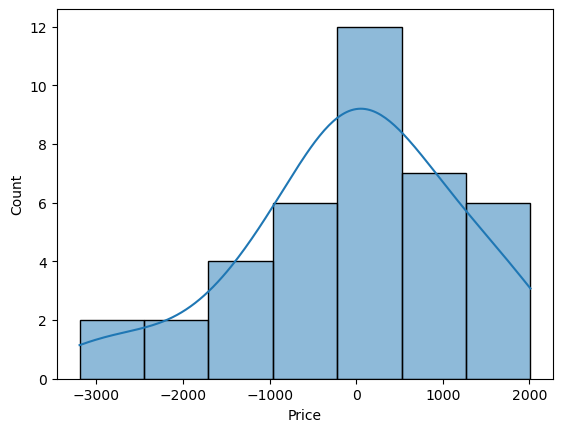

In [236]:
sns.histplot(ErrorGB,kde=True) # show error on graph


#### Insights:-

* Rendom Forest Algorithem we got r2_sccore in teasting period is 0.94 and r2_score in tranning period is 0.99 
* Error also do not show the Normal Distribution.


# Extrem Gradiant Boosting

In [238]:
from xgboost import XGBRegressor #import model
xgb=XGBRegressor() # call the model
xgb.fit(x_train,y_train) #train model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [239]:
y_preXGB = xgb.predict(x_test) # predict the testing data

In [240]:
r2_score(y_test,y_preXGB) # check the model performance for testing data

0.9162386655807495

In [241]:
y_trainXGB = xgb.predict(x_train) # predict the training data

In [242]:
r2_score(y_train,y_trainXGB) # check the model performance for training data

0.9991873502731323

#### Now apply hyper-parameter tuning

In [243]:
# Define the hyperparameter grid
param_gridXGB = {
    'n_estimators': [100, 200, 300],       # Number of boosting rounds (trees) to be built
    'learning_rate': [0.01, 0.001, 0.1],           # Step size shrinkage used in update to prevent overfitting*/
    'max_depth': [1,3, 5],                     # Maximum depth of a tree, increasing this value will make the model more complex
    'min_child_weight': [1, 3, 5, 7],                  # Minimum sum of instance weight (hessian) needed in a child
    'subsample': [0.6, 0.7, 0.8],                # Fraction of samples used for each boosting round; controls overfitting
    'colsample_bytree': [0.6, 0.7, 0.8],         # Fraction of features used for each tree; helps prevent overfitting
    'gamma': [0.1, 0.2, 0.5, 1],                    # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0.1, 1, 10],                      # L1 regularization term on weights; can help with feature selection
    'reg_lambda': [0.1, 1, 10] ,                     # L2 regularization term on weights; helps to reduce model complexity
}


In [244]:
#  Random search on Extrem Gradiant Boosting with 5-fold cross-validation and 100 iterations, using R2 score

XGB_grid = RandomizedSearchCV(estimator=xgb,param_distributions=param_gridXGB,cv=5,scoring= 'r2',verbose=2, n_jobs=-1,n_iter=100)

In [245]:
XGB_grid.fit(x_train,y_train) #train model

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8],
                                        'gamma': [0.1, 0.2, 0.5, 1],
                                        'learning_rate': [0.01, 0.001, 0.1],
                                        'max_depth': [1, 3, 5],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0.1, 1, 10],
                                        'reg_lambda': [0.1, 1, 10],
                                        'subsample': [0.6, 0.7, 0.8]},
                   scoring='r2', verbose=2)

In [246]:
y_hypXGB = XGB_grid.predict(x_test) # predict the testing data

In [247]:
r8=r2_score(y_test,y_hypXGB) # check the model performance for testing data
r8

0.9423919916152954

In [248]:
y_trainhypXGB = XGB_grid.predict(x_train) # predict the training data

In [249]:
r2_score(y_train,y_trainhypXGB) # check the model performance for training data

0.9922931790351868

In [250]:
ErrorXGB = y_test - y_hypXGB #check error value
ErrorXGB

102    1844.037109
5     -2046.486328
122   -1682.781250
36      792.622070
183     318.875977
165   -3113.146484
60     1761.813477
140    1582.293945
96     1170.577148
196   -1134.064453
145    -970.316406
148     144.482910
180    -433.151367
27    -1824.886719
95      599.788086
146     -72.554688
161     103.180664
23       56.707520
138    1043.175781
38      613.676758
157    1946.938477
29      635.171875
91      700.227051
99    -1773.610352
137      99.050293
81    -1526.345703
18      573.448242
111    2793.829102
128   -2376.043945
134     313.503906
34      546.943359
47       70.149902
172     401.442383
169    -114.951172
11     1116.677734
170    -677.912109
87       -7.135254
117    -220.089355
73     -219.157715
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

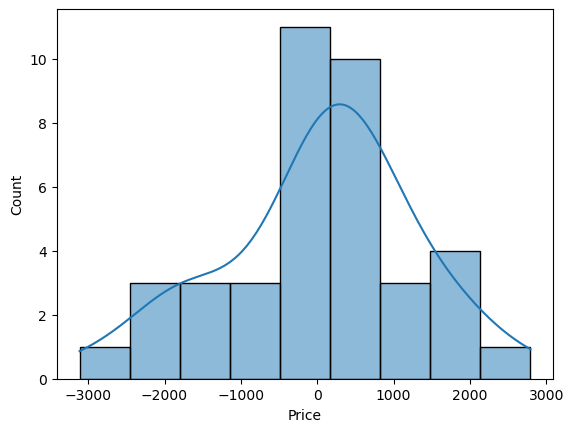

In [251]:
sns.histplot(ErrorXGB,kde=True) # show error on graph

#### Insights:-

* After using hyperparameter tunning in # Extrem Gradiant Boosting we got r2_sccore in teasting period is 0.94 and r2_score in tranning period is 0.99 
* Error also do not show the Normal Distribution.
* After using hyperperameter tunning we got generalized model


# Addaboosting

In [253]:
from sklearn.ensemble import AdaBoostRegressor  # Import Model
AD = AdaBoostRegressor() #call the model
AD.fit(x_train,y_train) # train the model

AdaBoostRegressor()

In [254]:
y_preAD = AD.predict(x_test)  # predict the testing data

In [255]:
r2_score(y_test,y_preAD)# check the model performance for testing data

0.8923059310388642

In [256]:
y_trainAD = AD.predict(x_train) # predict the training data

In [257]:
r2_score(y_train,y_trainAD) # check the model performance for training data

0.9508739562387087

#### Now apply Hyper parameter tuning

In [259]:
# Define the hyperparameter grid
param_gridAD = {
    'n_estimators': [100, 200, 500],                # Number of boosting rounds or weak learners
    'learning_rate': [0.01, 0.001, 0.1, 0.2],       # Shrinks the contribution of each weak learner to prevent overfitting
    'loss': ['linear', 'square', 'exponential']    # Loss function to use for the regressor's update step
}


In [260]:
#  Random search on Adda Boosting with 5-fold cross-validation and 100 iterations, using R2 score

AD_grid = RandomizedSearchCV(estimator=AD,param_distributions=param_gridAD,cv=5,scoring= 'r2',verbose=2, n_jobs=-1,n_iter=100,random_state=42)

In [261]:
AD_grid.fit(x_train,y_train) # train model

Fitting 5 folds for each of 36 candidates, totalling 180 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.001, 0.1,
                                                          0.2],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, scoring='r2', verbose=2)

In [262]:
y_hypAD  = AD_grid.predict(x_test) # predict the testing data

In [263]:
r9=r2_score(y_test,y_hypAD)# check the model performance for testing data
r9

0.8805323859015328

In [264]:
y_trainhypAD = AD_grid.predict(x_train) # predict the training data

In [265]:
r2_score(y_train,y_trainhypAD) # check the model performance for training data

0.9370797974629614

In [266]:
ErrorAD = y_test - y_hypAD #check error values
ErrorAD

102    1722.277778
5       983.454545
122   -1500.000000
36     1068.400000
183    1386.612903
165   -4567.355556
60     1759.424242
140    1742.884615
96      940.048780
196    2409.550000
145   -1951.292308
148    -942.230769
180     241.644737
27    -3603.928571
95      302.621622
146    -982.666667
161     811.621622
23     -607.292308
138    1214.760000
38     1224.619048
157    1643.295082
29     -365.250000
91      478.333333
99    -3181.755556
137      47.388235
81    -1684.302326
18     -649.057692
111     118.042553
128   -4184.625000
134    -559.015625
34      -14.444444
47    -1125.250000
172    1454.541667
169    1750.000000
11     4441.870370
170     205.933333
87     -582.272727
117    -619.421053
73    -1057.750000
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

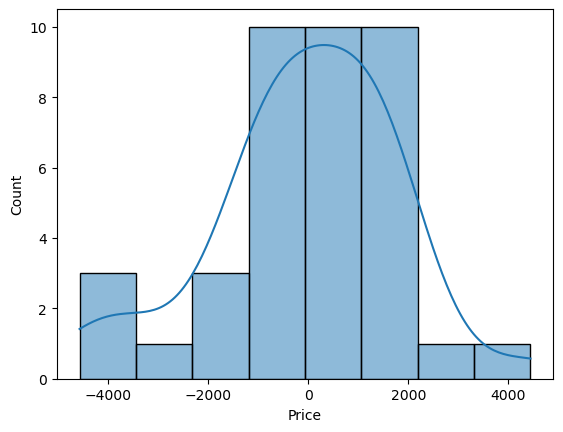

In [267]:
sns.histplot(ErrorAD,kde=True) # show error on graph

#### Insights:-

* After using hyperparameter tunning in # Extrem ADA Boosting we got r2_sccore in teasting period is 0.88 and r2_score in tranning period is 0.93 
* Error also do not show the Normal Distribution.
* After using hyperperameter tunning we got generalized model


# Artificial Neural Network (ANN)

In [268]:
from sklearn.neural_network import MLPRegressor #import model
ANN = MLPRegressor(random_state=20) #call the model
ANN.fit(x_train,y_train) # train model

MLPRegressor(random_state=20)

In [269]:
y_preANN = ANN.predict(x_test) # predict the testing data

In [270]:
r2_score(y_test,y_preANN)# check the model performance for testing data

-4.068174240892241

In [271]:
y_trainANN = ANN.predict(x_train) # predict the training data

In [272]:
r2_score(y_train,y_trainANN) # check the model performance for training data

-2.6363382753017635

#### Now apply hyper-parameter tuning

In [273]:
# Define the hyperparameter grid
param_gridANN = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (150, 100, 50)],  # Varying number of neurons and layers
    'activation': ['tanh', 'relu'],  # Activation functions
    'solver': ['lbfgs', 'sgd', 'adam'],  # Solvers
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization term (L2 penalty)
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule
    'learning_rate_init': [0.1,0.2,0.3],  # Initial learning rate
    'max_iter': [100, 200, 500, 1000],  # Maximum number of iterations
}

In [274]:
#  Random search on ANN with 5-fold cross-validation and 100 iterations, using R2 score

ANN_grid = RandomizedSearchCV(estimator=ANN,param_distributions=param_gridANN,cv=5,scoring= 'r2',verbose=2, n_jobs=-1,n_iter=100,random_state=42)

In [275]:
ANN_grid.fit(x_train,y_train) #predict testing data

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=MLPRegressor(random_state=20), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [0.0001, 0.001, 0.01, 0.1],
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (100, 50),
                                                               (150, 100, 50)],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'learning_rate_init': [0.1, 0.2, 0.3],
                                        'max_iter': [100, 200, 500, 1000],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   random_state=42, scoring='r2', verbose=2)

In [276]:
y_hypANN = ANN_grid.predict(x_test) # predict the testing data

In [277]:
r10=r2_score(y_test,y_hypANN)# check the model performance for testing data
r10

0.8823084599932548

In [278]:
y_trainhypANN = ANN_grid.predict(x_train) # predict the training data

In [279]:
r2_score(y_train,y_trainhypANN) # check the model performance for training data

0.9622891746992603

## Model Comparsion Report

In [286]:
Score = pd.DataFrame({"Model":["LinearRegression","SVm","DecisionTreeRegressor", "KNN","Bagging","RandomForestRegressor","Gredient Boosting", "XGB", "Adda boosting","ANN"],
                     "r2_score":[r1*100,r2*100,r3*100,r4*100,r5*100,r6*100,r7*100,r8*100,r9*100,r10*100 ]})
Score # check the performance of all algorithm together
# Here we get model name along with r2_score, mean_absoulate_error, mean_squared_error

,Model,r2_score
0,LinearRegression,81.598285
1,SVm,-0.144757
2,DecisionTreeRegressor,85.905064
3,KNN,94.535324
4,Bagging,94.602664
5,RandomForestRegressor,94.490183
6,Gredient Boosting,94.499673
7,XGB,94.239199
8,Adda boosting,88.053239
9,ANN,88.230846


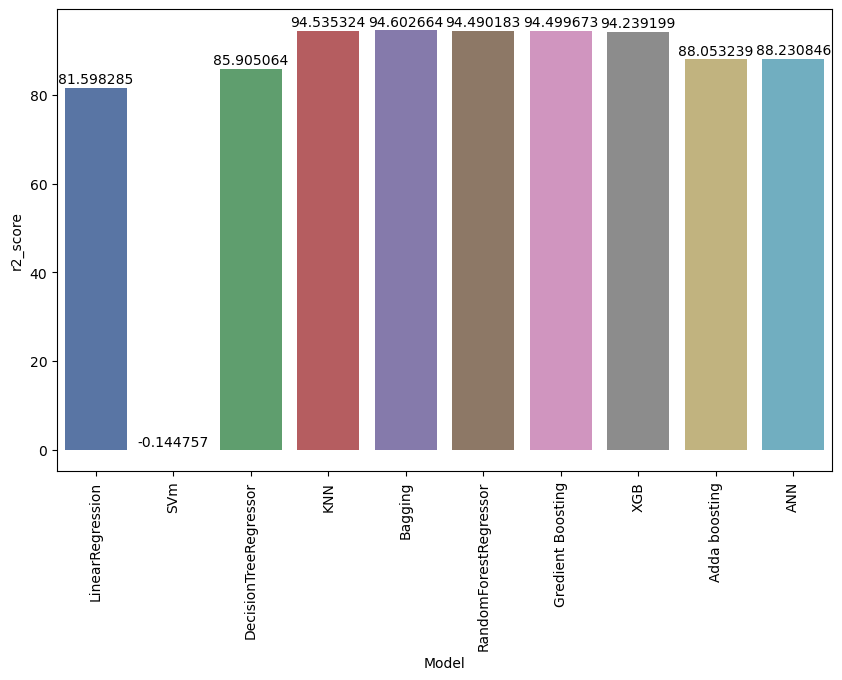

In [287]:
palette = sns.color_palette("deep") # define the color for barplot
plt.figure(figsize=(10,6)) # define figure size
plt.xticks(rotation = 90) # show x-axis value and rotate it 90 degree
a = sns.barplot(x=Score.Model, y=Score.r2_score, data=Score, palette=palette) # create barplot of the given inputs 
for index, value in enumerate(Score["r2_score"]):
    a.text(index, value+1, f'{value:2f}', ha='center') # show indivisual bar value

                                             ___Final_Conclusion_of_Model_Report___

* Bagging Regressor achieved the highest R² score of 94.60%, making it the best-performing model in terms of accuracy and ability to generalize.

* KNN, Random Forest Regressor, Gradient Boosting, and XGB models all performed exceptionally well, with R² scores above 94%, demonstrating their effectiveness in capturing the underlying patterns in the data.

* Decision Tree Regressor performed reasonably well with an R² score of 85.91%, but did not match the performance of the ensemble methods or KNN.

* Ada Boosting and ANN both showed moderate performance with R² scores of 88.05% and 88.23% respectively, indicating solid but not exceptional accuracy.

* Linear Regression had a lower R² score of 81.60%, which suggests it was less effective at explaining the variance in the house price data compared to more complex models.

* SVM struggled significantly, with an R² score of -0.14%, indicating that it was unable to fit the data well in this scenario.


***Bagging Regressor is the best overall model for this task, offering the highest accuracy.*** \
***Other models like KNN, Random Forest, Gradient Boosting, and XGB also delivered excellent results, with little difference in their R² scores.*** \
***Most models, except SVM, showed good generalization, with many achieving over 88% accuracy.***


                                                 ____Report_On_Challenges_Faced___

***Categorical Encoding:*** Columns like fuel_type, car_body_type, and wheel_drive are categorical and need encoding (e.g., OneHotEncoding or LabelEncoding) for use in models.\
***Outliers:*** Features like price, horse_power, or curb_weight may contain outliers that could affect the model’s performance.\
***Feature Scaling:*** Continuous variables such as wheel_base, length, width, and height have different units and scales, requiring normalization or standardization.\
***Model Generalization:*** Ensuring that the model generalizes well across different car categories (e.g., luxury vs economy cars) without overfitting to specific types.\
***Model Tuning:-*** Finding the best hyperparameters for different models was time-consuming, and sometimes even after tuning, model performance didn’t improve as expected.






## Model Save

In [531]:
import pickle # use for save the model
with open("car_price.pkl","wb") as f:  # save file
    pickle.dump(best_model,f) # call the best_model model

In [532]:
with open("car_price.pkl","rb") as f: # load the model file
    file = pickle.load(f) # call the file

In [533]:
x.head() # top five rows of input data

,risk_factor,car_name,car_body_type,wheel_base,length,width,Heigth,curb_weigth,engine_type,number_of_cylinder,engine_size,fuel_system,bore_diameter,Stroke,compression_ratio,horse_power,Perk_rpm,City_mpg,Highway_mpg,fuel_type_diesel,fuel_type_gas,induction_type_std,induction_type_turbo,car_door_four,car_door_two,wheel_drive_4wd,wheel_drive_fwd,wheel_drive_rwd,engine_location_front,engine_location_rear
0,1.0,0.00,0.00,0.072464,0.413433,0.294872,0.083333,0.411171,0.0,0.4,0.518797,0.666667,0.664286,0.583333,0.4,0.463235,0.459459,0.25000,0.354839,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.6,0.00,0.50,0.286232,0.449254,0.474359,0.383333,0.517843,1.0,0.6,0.684211,0.666667,0.100000,0.797619,0.4,0.779412,0.459459,0.18750,0.322581,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.8,0.05,0.75,0.478261,0.529851,0.564103,0.541667,0.329325,0.5,0.4,0.360902,0.666667,0.464286,0.714286,0.4,0.397059,0.729730,0.34375,0.451613,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.8,0.05,0.75,0.463768,0.529851,0.589744,0.541667,0.518231,0.5,0.2,0.563910,0.666667,0.464286,0.714286,0.4,0.492647,0.729730,0.15625,0.193548,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.8,0.05,0.75,0.478261,0.540299,0.576923,0.441667,0.395268,0.5,0.2,0.563910,0.666667,0.464286,0.714286,0.4,0.455882,0.729730,0.18750,0.290323,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [534]:
y.head() # top five rows of output data

0    0.282558
1    0.282558
2    0.219254
3    0.306142
4    0.251527
Name: Price, dtype: float64

In [535]:
# predict the data
file.predict([[	1.0,	0.00,	0.00,	0.072464,	0.413433,	0.294872,	0.083333,	0.411171,	0.0,	0.4,	0.518797,	0.666667,	0.664286,	0.583333,	0.4,	0.463235,	0.459459,	0.25000,	0.354839,	0.0,	1.0,	1.0,	0.0,	0.0,	1.0,	0.0,	0.0,	1.0,	1.0,	0.0]])

array([0.2933047])

                                                          ! Thank You !